#  Örnek Satış Verisi üzerinden Çalışmalar

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline
sns.set()

In [4]:
sales_data = pd.read_csv('data/sales_data.csv')

## Verinin incelenmesi

In [6]:
sales_data.head()

Product    Seller Authority Comp_size Competitors Purch_dept Partnership  \
0  Product A  Seller 6       Mid       Mid          No    Unknown          No   
1  Product B  Seller 8       Mid       Big          No        Yes          No   
2  Product F  Seller 1       Mid       Big          No         No         Yes   
3  Product B  Seller 8       Mid       Big          No        Yes          No   
4  Product C  Seller 1       Mid     Small     Unknown         No          No   

  Budgt_alloc Forml_tend  RFI  ...      Source   Client          Scope  \
0         Yes         No  Yes  ...    Referral  Current          Clear   
1     Unknown         No   No  ...    Referral  Current          Clear   
2          No         No   No  ...  Joint past  Current  Few questions   
3          No         No   No  ...  Joint past  Current          Clear   
4          No         No   No  ...     Unknown      New  Few questions   

          Strat_deal Cross_sale Up_sale    Deal_type       Needs_def  \
0     Very important         No     Yes      Project             Yes   
1        Unimportant         No     Yes  Maintenance             Yes   
2  Average important        Yes      No      Project  Info gathering   
3     Very important         No     Yes  Maintenance             Yes   
4  Average important         No      No      Project              No   

        Att_t_client Status  
0  Strategic account    Won  
1  Strategic account    Won  
2  Strategic account    Won  
3  Strategic account    Won  
4             Normal    Won  

[5 rows x 23 columns]

In [169]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       448 non-null    object
 1   Seller        448 non-null    object
 2   Authority     448 non-null    object
 3   Comp_size     448 non-null    object
 4   Competitors   448 non-null    object
 5   Purch_dept    448 non-null    object
 6   Partnership   448 non-null    object
 7   Budgt_alloc   448 non-null    object
 8   Forml_tend    448 non-null    object
 9   RFI           448 non-null    object
 10  RFP           448 non-null    object
 11  Growth        448 non-null    object
 12  Posit_statm   448 non-null    object
 13  Source        448 non-null    object
 14  Client        448 non-null    object
 15  Scope         448 non-null    object
 16  Strat_deal    448 non-null    object
 17  Cross_sale    448 non-null    object
 18  Up_sale       448 non-null    object
 19  Deal_typ

In [170]:
#looking for unique product
sales_data['Product'].unique()

array(['Product A', 'Product B', 'Product F', 'Product C', 'Product I',
       'Product D', 'Product E', 'Product N', 'Product P', 'Product K',
       'Product H', 'Product G', 'Product J', 'Product L'], dtype=object)

In [171]:
#looking for unique seller
sales_data['Seller'].unique()

array(['Seller 6', 'Seller 8', 'Seller 1', 'Seller 20', 'Seller 2',
       'Seller 12', 'Seller 4', 'Seller 10', 'Seller 9', 'Seller 16',
       'Seller 11', 'Seller 13', 'Seller 14', 'Seller 3', 'Seller 5',
       'Seller 7', 'Seller 15', 'Seller 17'], dtype=object)

###  Satışın kimin tarafından yapıldığı ve hangi ürünleri ne kadar sattığı.

In [172]:
pd.crosstab( sales_data.Seller,sales_data.Product).T.style.background_gradient(cmap='summer_r')

### Satışın başlangıç durumuna göre (Ortalama önemde- önemsiz- önemli) satışın kazanılması veya kaybedilmesi.  

In [173]:
pd.crosstab(sales_data.Strat_deal, sales_data.Status).T.style.background_gradient(cmap='summer_r')

### Satışın başlangıç durumuna göre (Ortalama önemli- önemsiz-önemli) satışın kazanılma- kaybetme grafiği.

Text(0.5, 1, 'Start deal result based on Won|Loss')

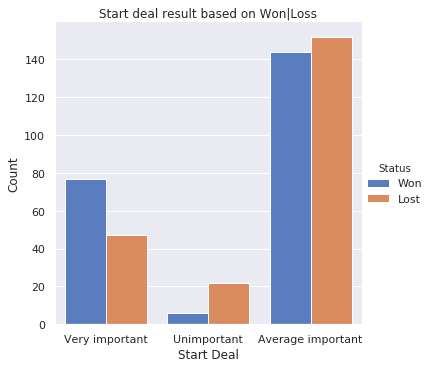

In [174]:
sns.catplot(x="Strat_deal", hue="Status", data=sales_data,kind="count", palette="muted")
plt.xlabel('Start Deal')
plt.ylabel('Count')
plt.title('Start deal result based on Won|Loss')

### Satışın müşteri durumlarına göre (geçmiş müşteri- yeni müşteri- şuanki müşteri) kazanma- kaybetme grafiği.

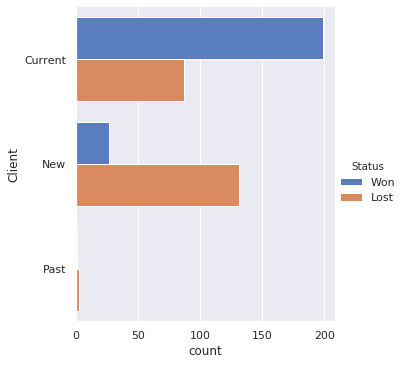

In [44]:
sns.catplot(y="Client", hue="Status", data=sales_data,
                kind="count", palette="muted")

###  Müşterinin hangi yolla kazanıldığı ve satışın kazanılıp kazanılmadığının grafiksel gösterimi.

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text xticklabel objects>)

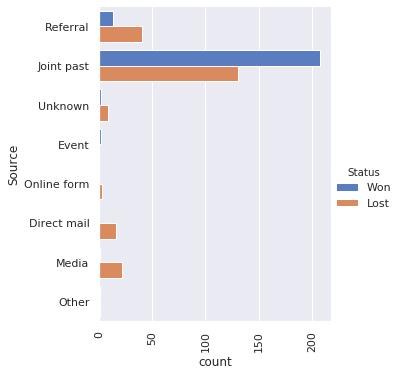

In [45]:

sns.catplot(y="Source", hue="Status", data=sales_data,
                kind="count", palette="muted")
plt.xticks(rotation='vertical')


(array([  0.,  50., 100., 150.]), <a list of 4 Text xticklabel objects>)

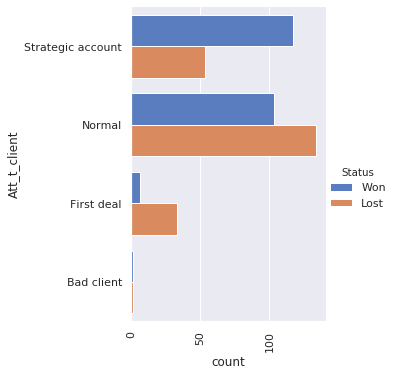

In [46]:
sns.catplot(y="Att_t_client", hue="Status", data=sales_data,
                kind="count", palette="muted")
plt.xticks(rotation='vertical')

In [179]:
def plot_of_count_and_pie(column_name):

    f= plt.figure(figsize=(45,20))
    gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

    ax0 = f.add_subplot(gs[0, 0])
    sns.countplot(x=column_name, data=sales_data,order = sales_data[column_name].value_counts().index)
    plt.xlabel(column_name,fontsize=42)
    plt.ylabel('Count', fontsize=42)
    plt.xticks(rotation = 'vertical',fontsize=32)
    plt.yticks(fontsize=32)
    explode = []
    total = 0
    size=len(sales_data[column_name].unique())
    for i in range(size):
        total = total + 0.060
        explode.append(total)


    ax0 = f.add_subplot(gs[0, 1])
    sales_data[column_name].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={'fontsize': 24},explode=explode)
    plt.xlabel(column_name,fontsize=42)
    plt.ylabel('Count', fontsize=42)
    plt.xticks(fontsize=32)


    plt.tight_layout()
    plt.show()

Fonksiyon bize bar char ve pie chart döndürecek ve böylece bütün sütünların sayısal ve yüzdesel olrak dağılımları görülebilir.

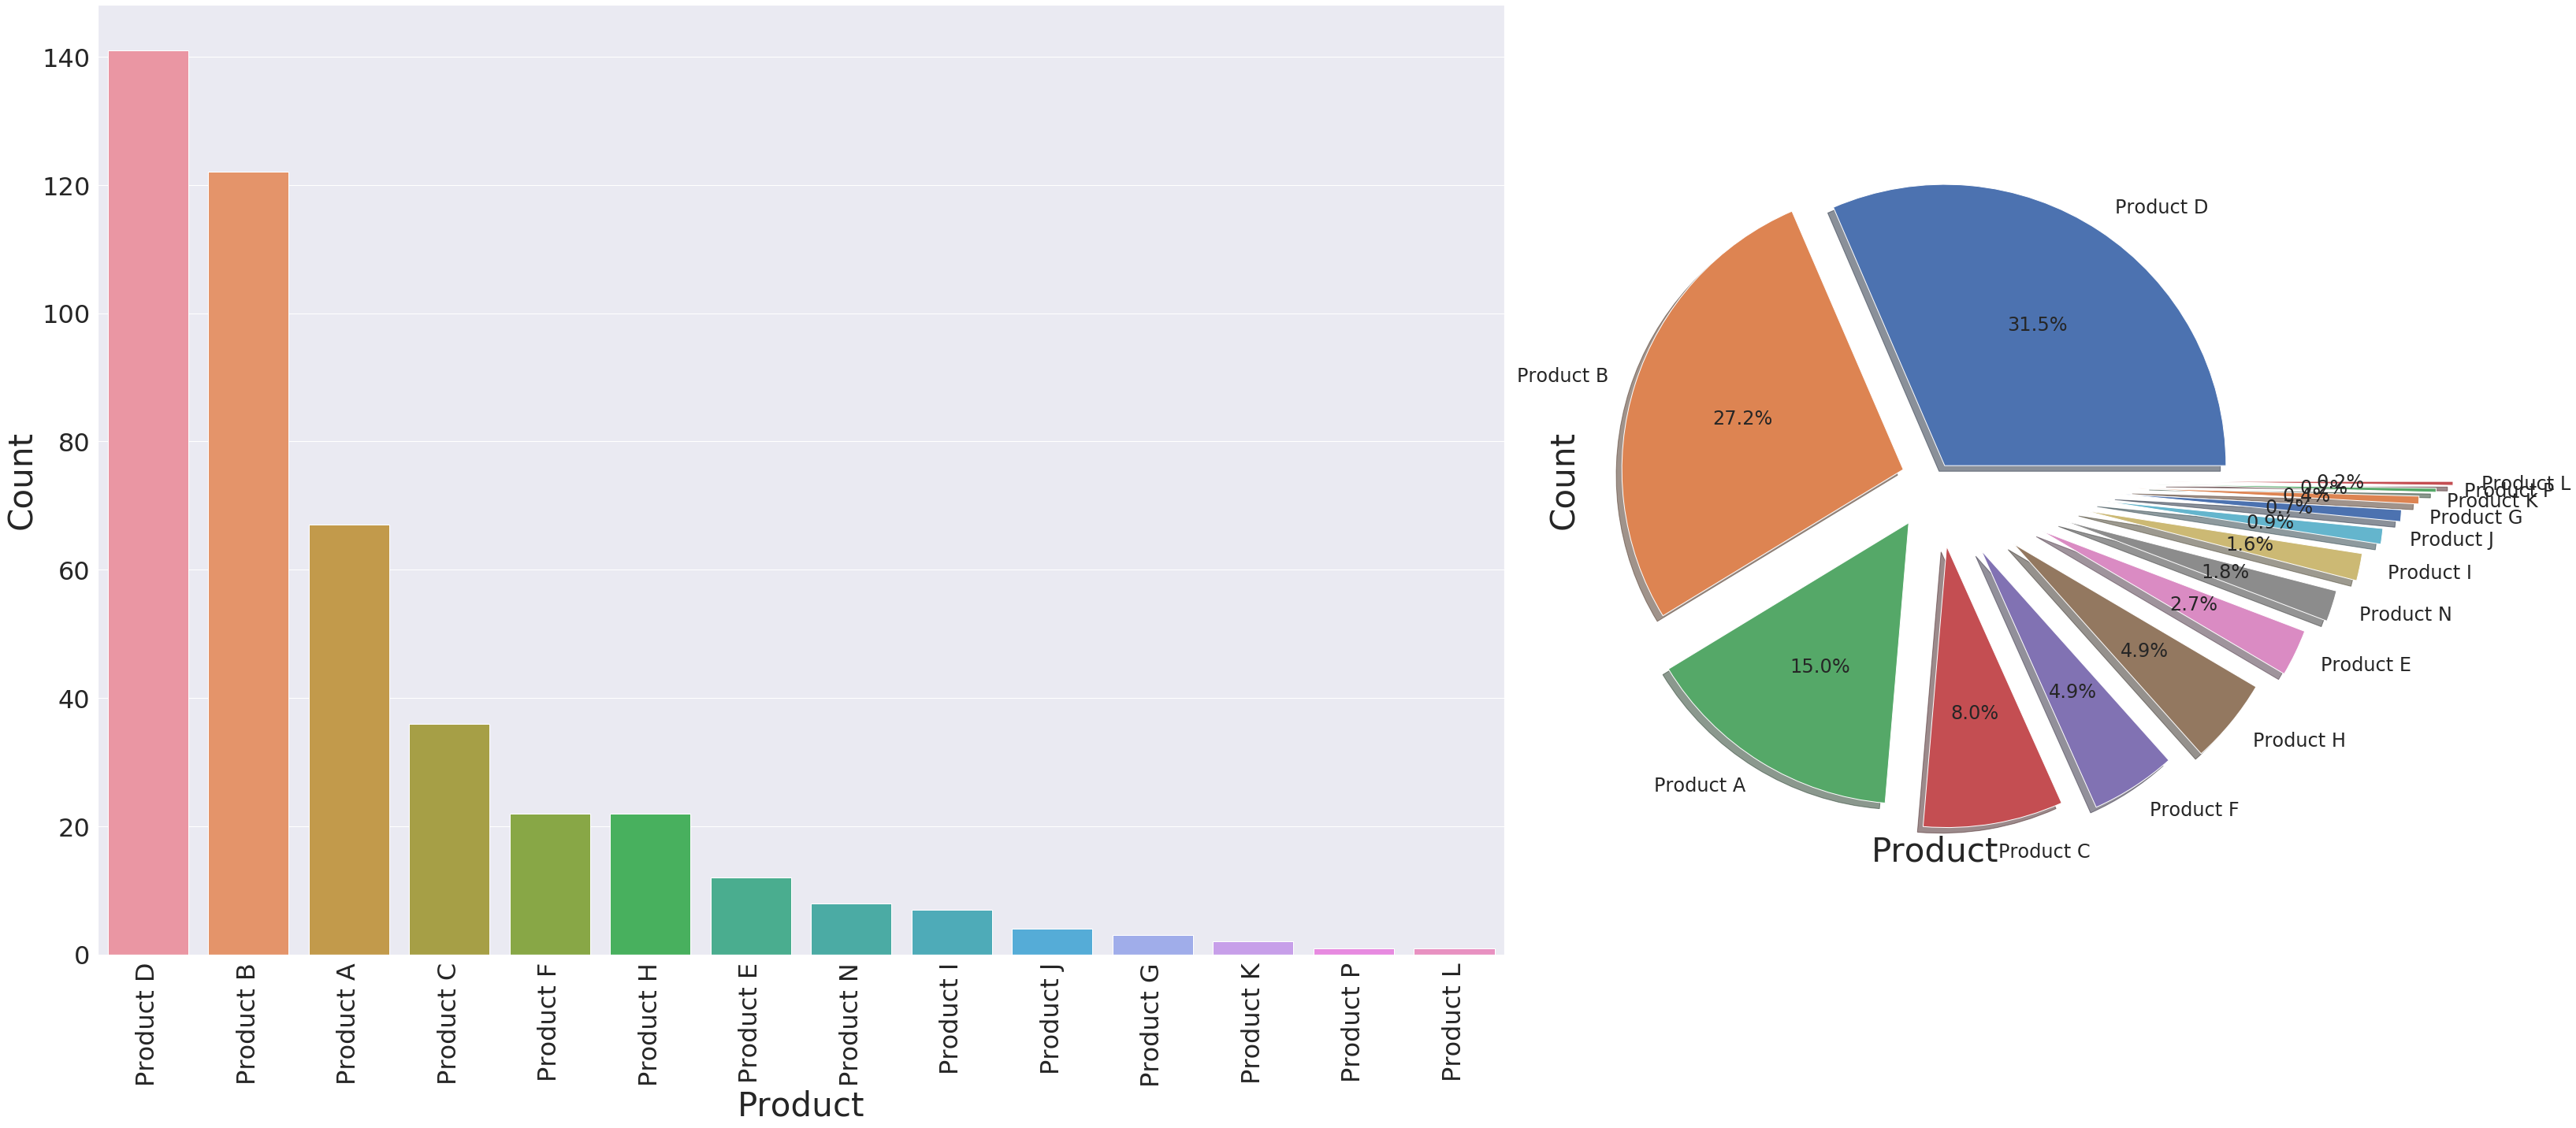

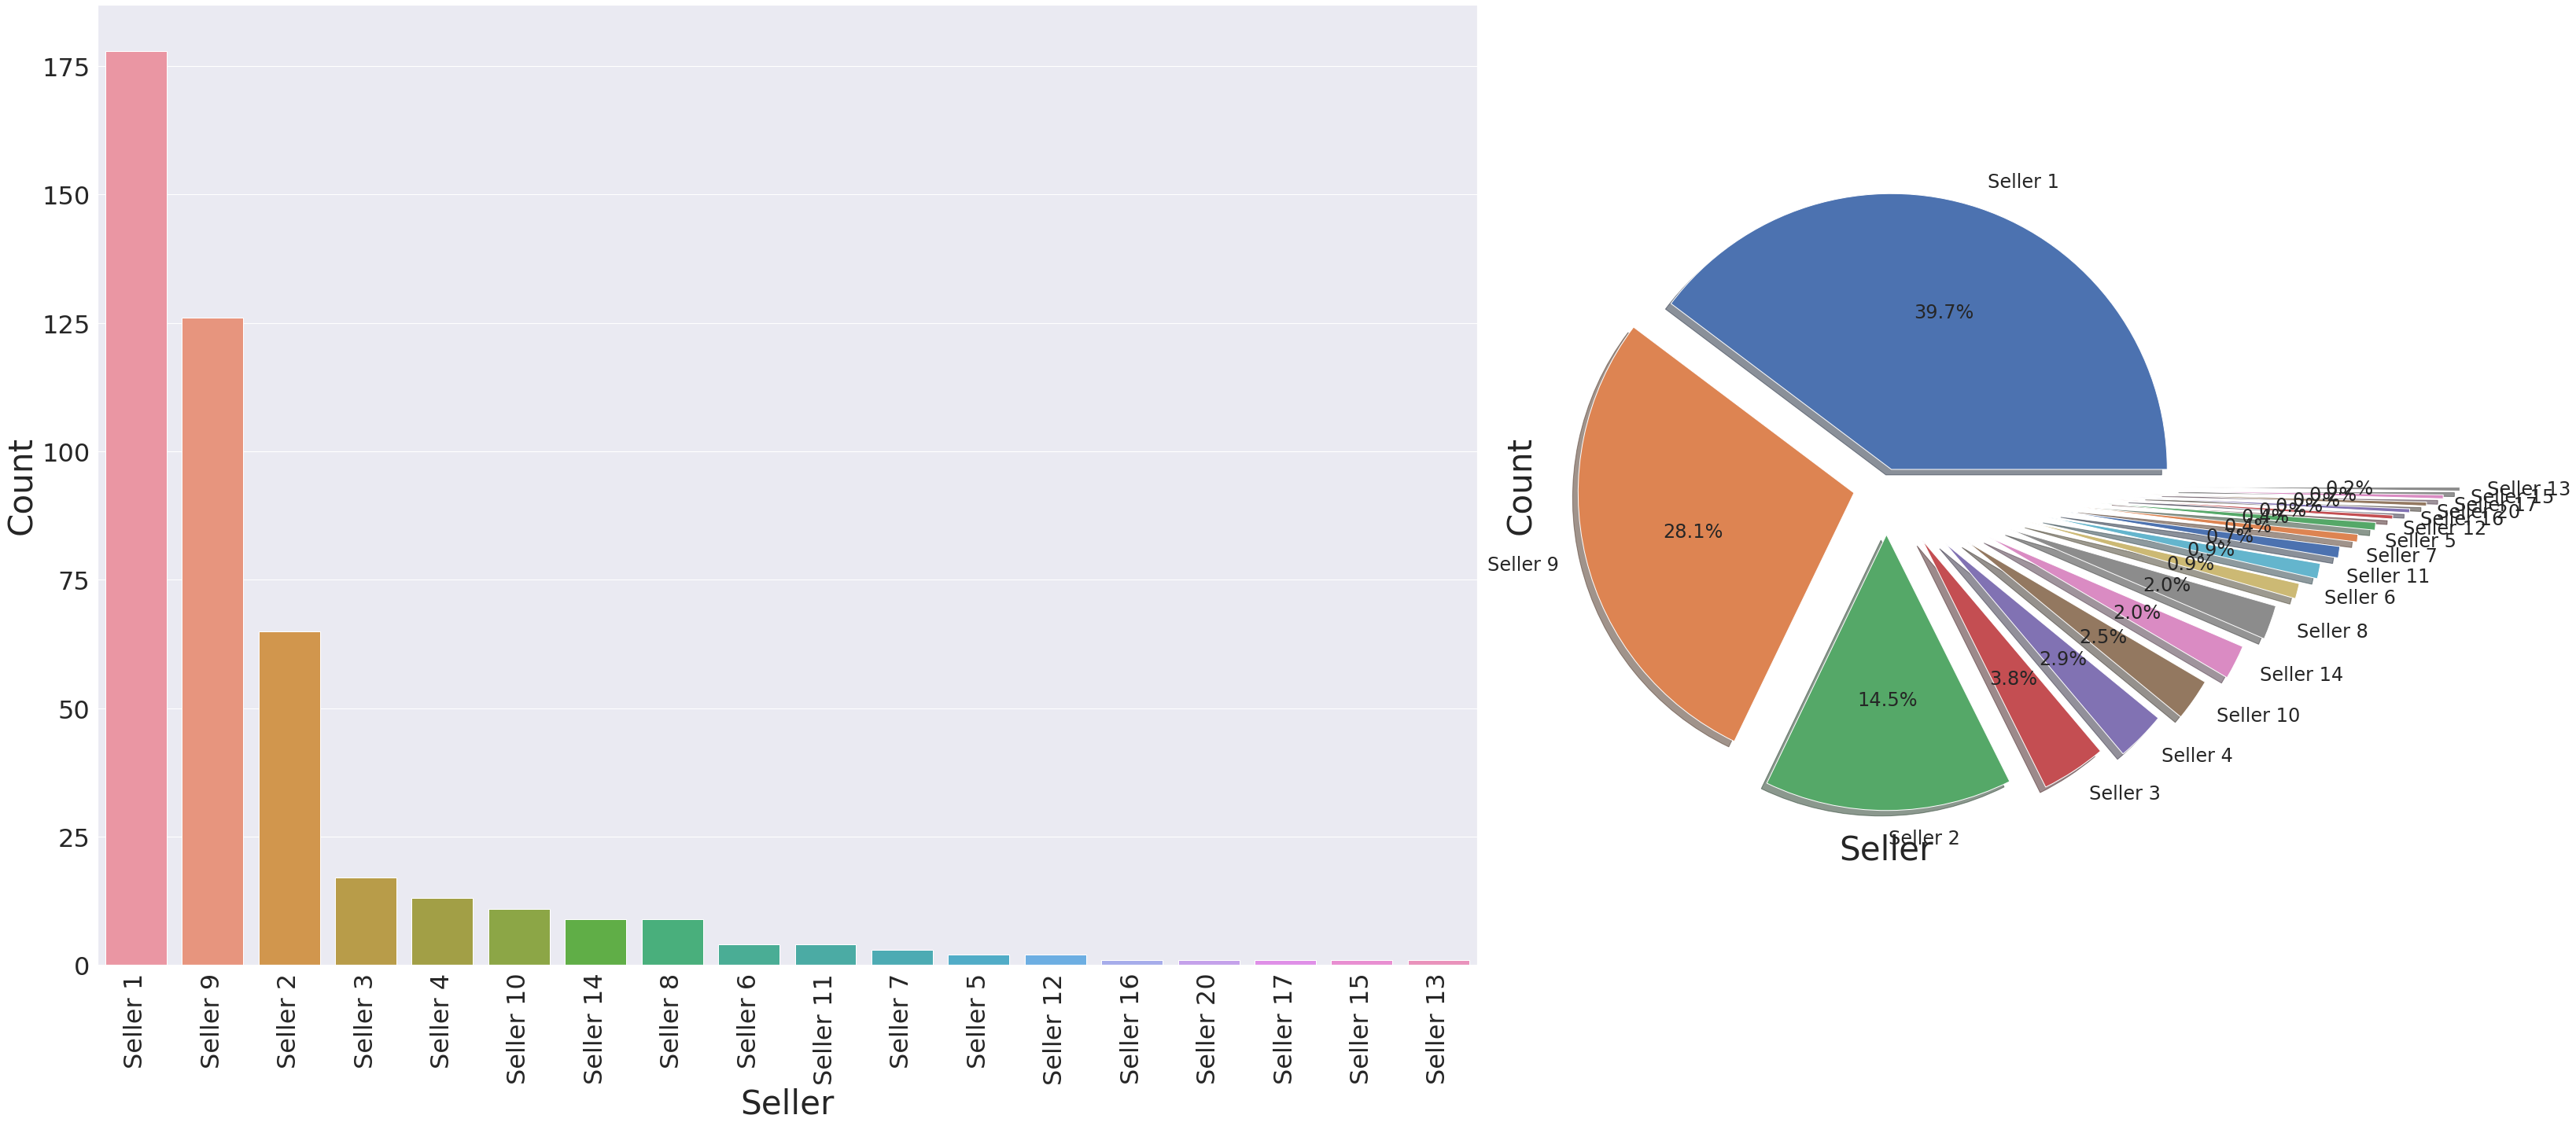

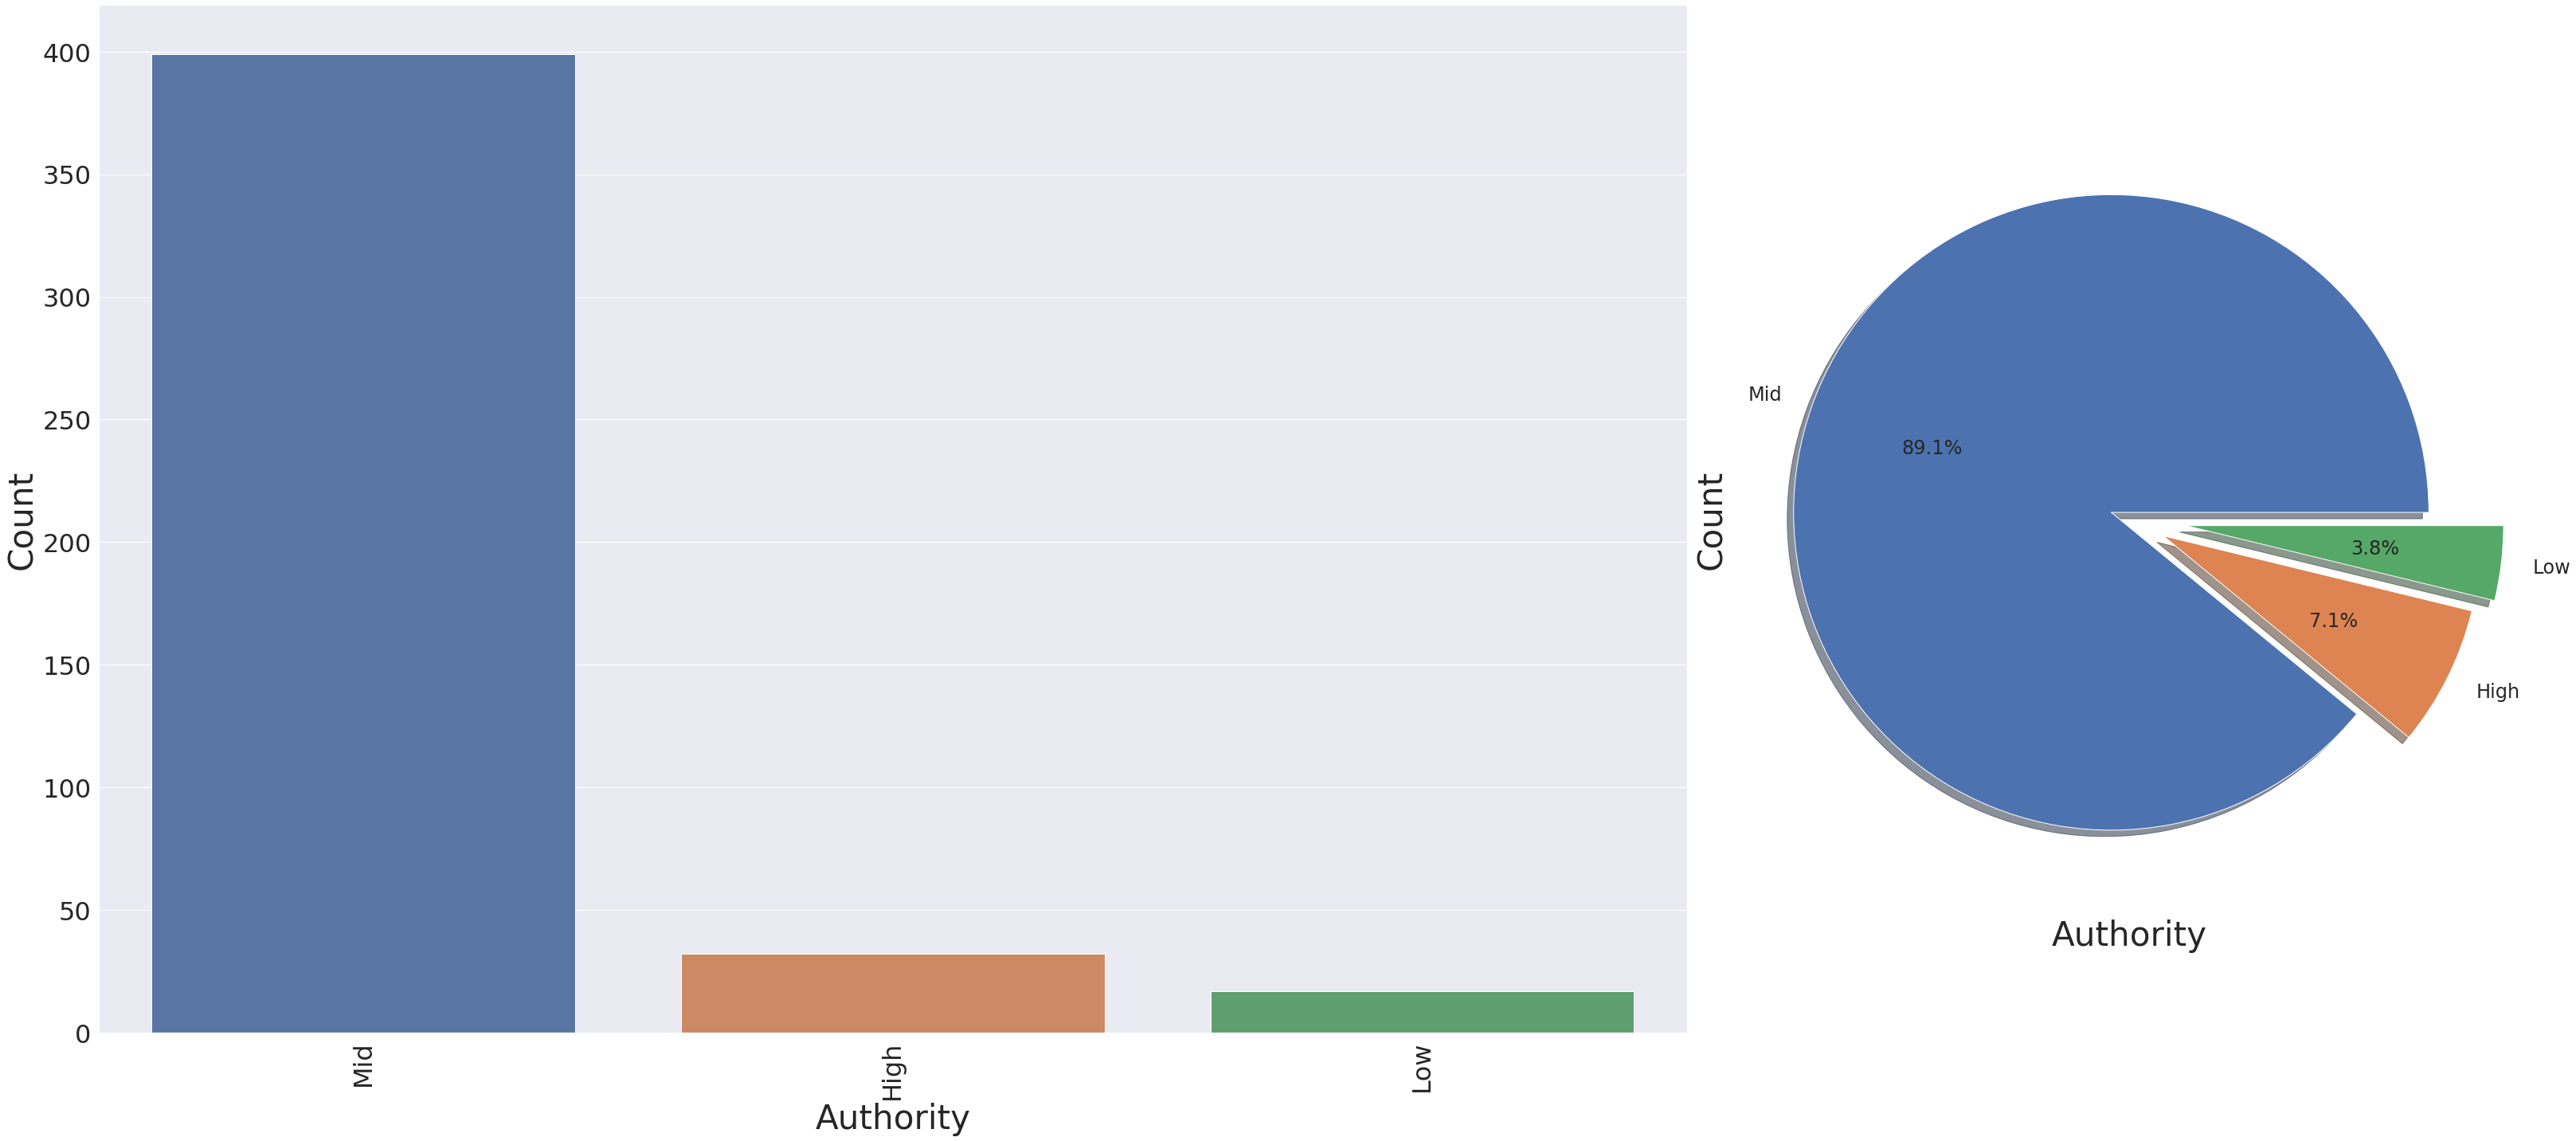

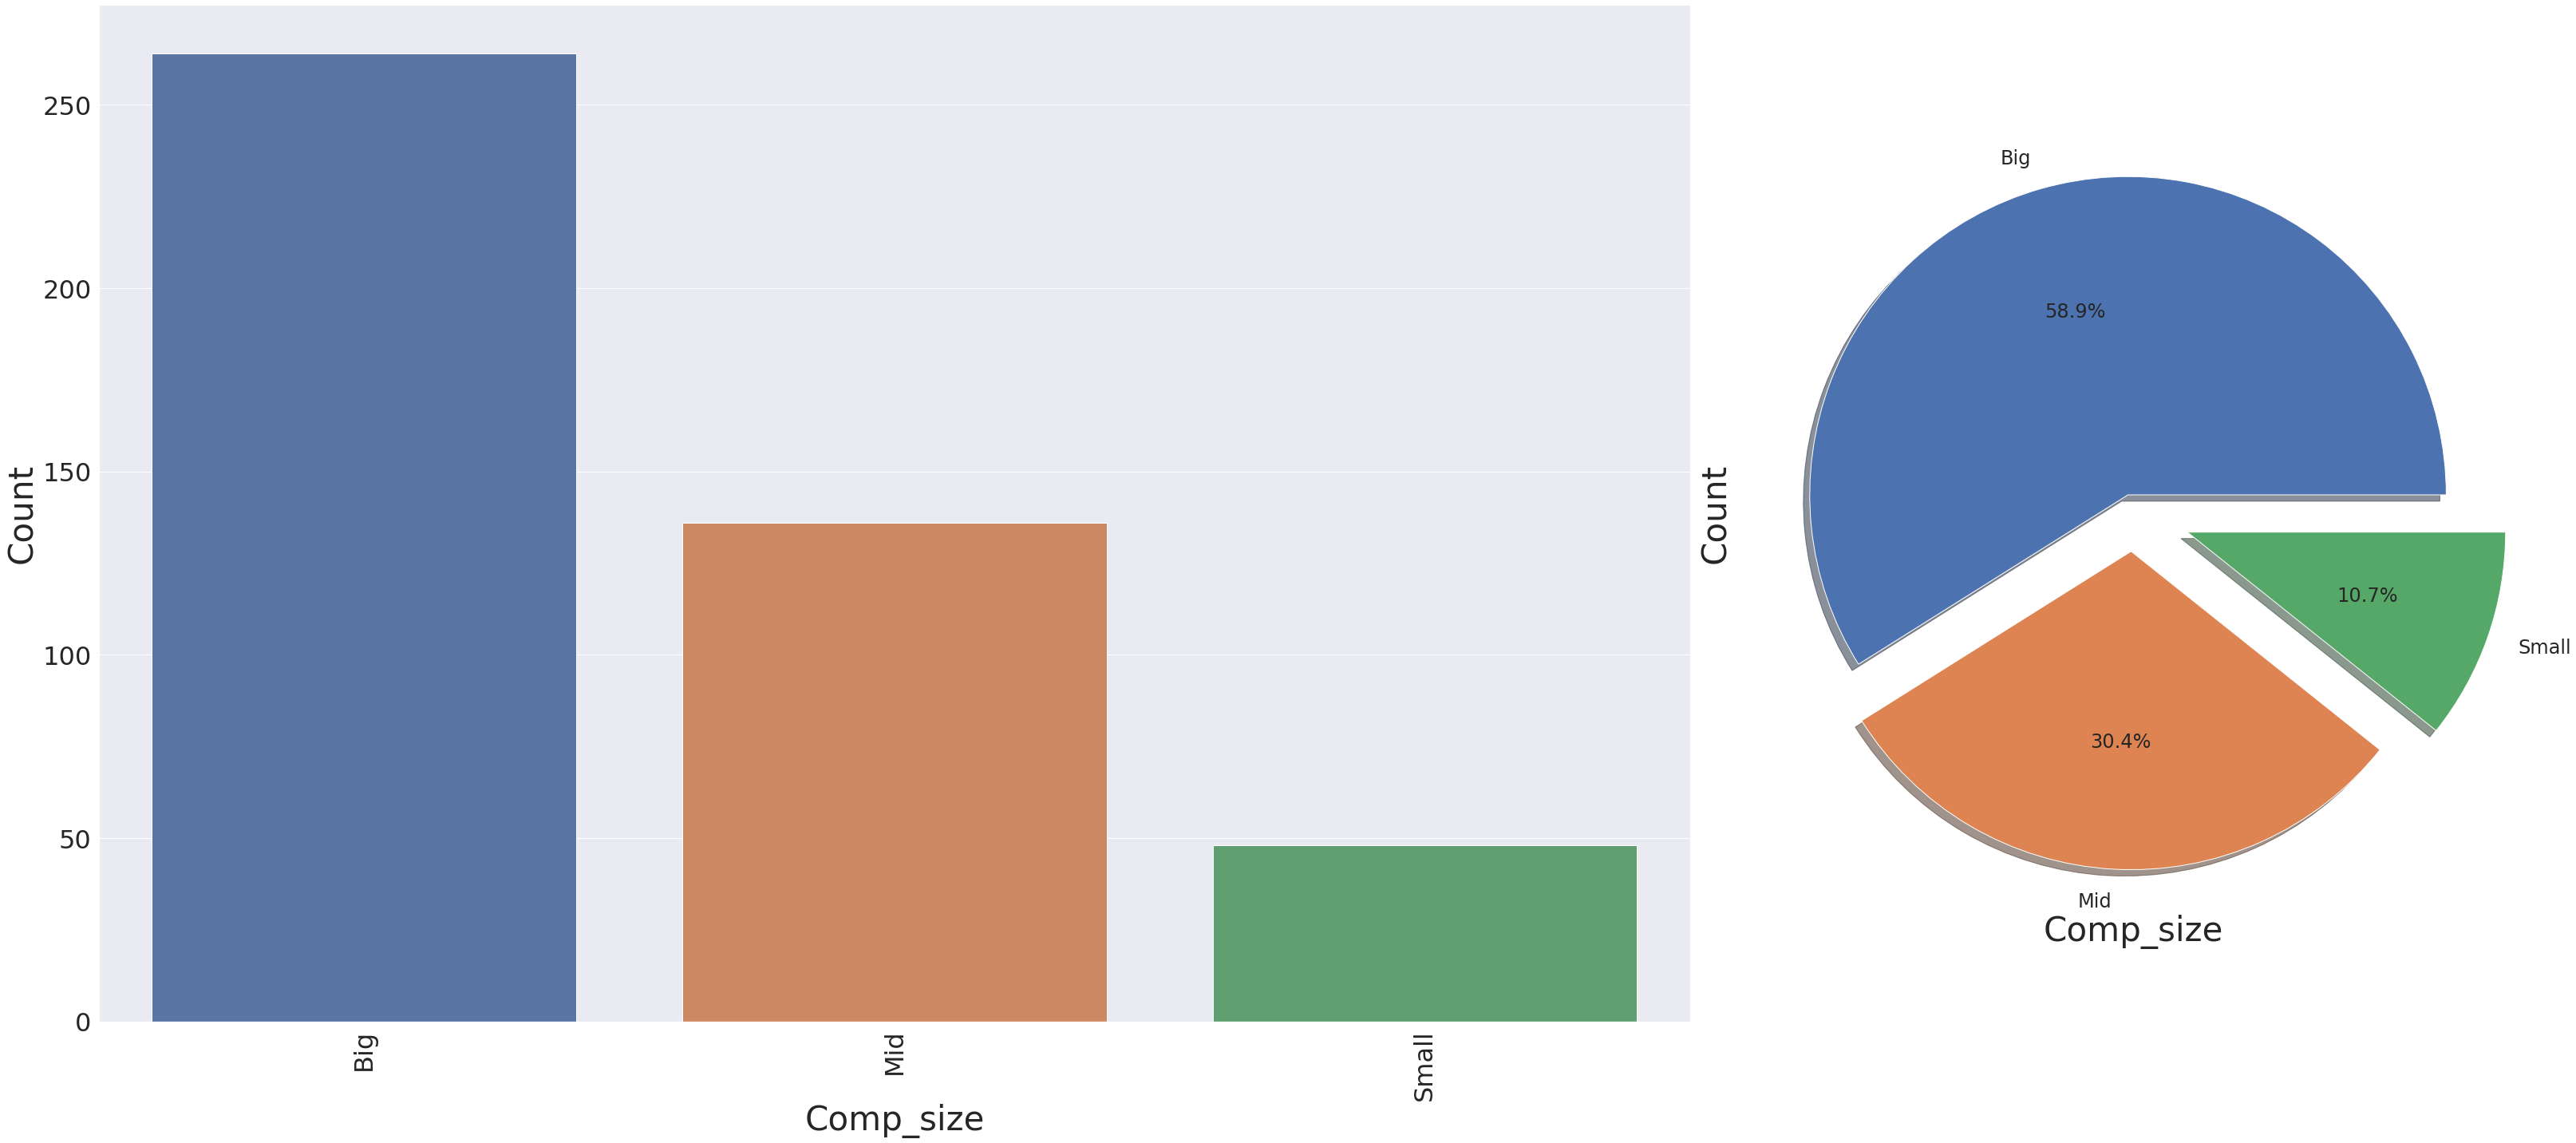

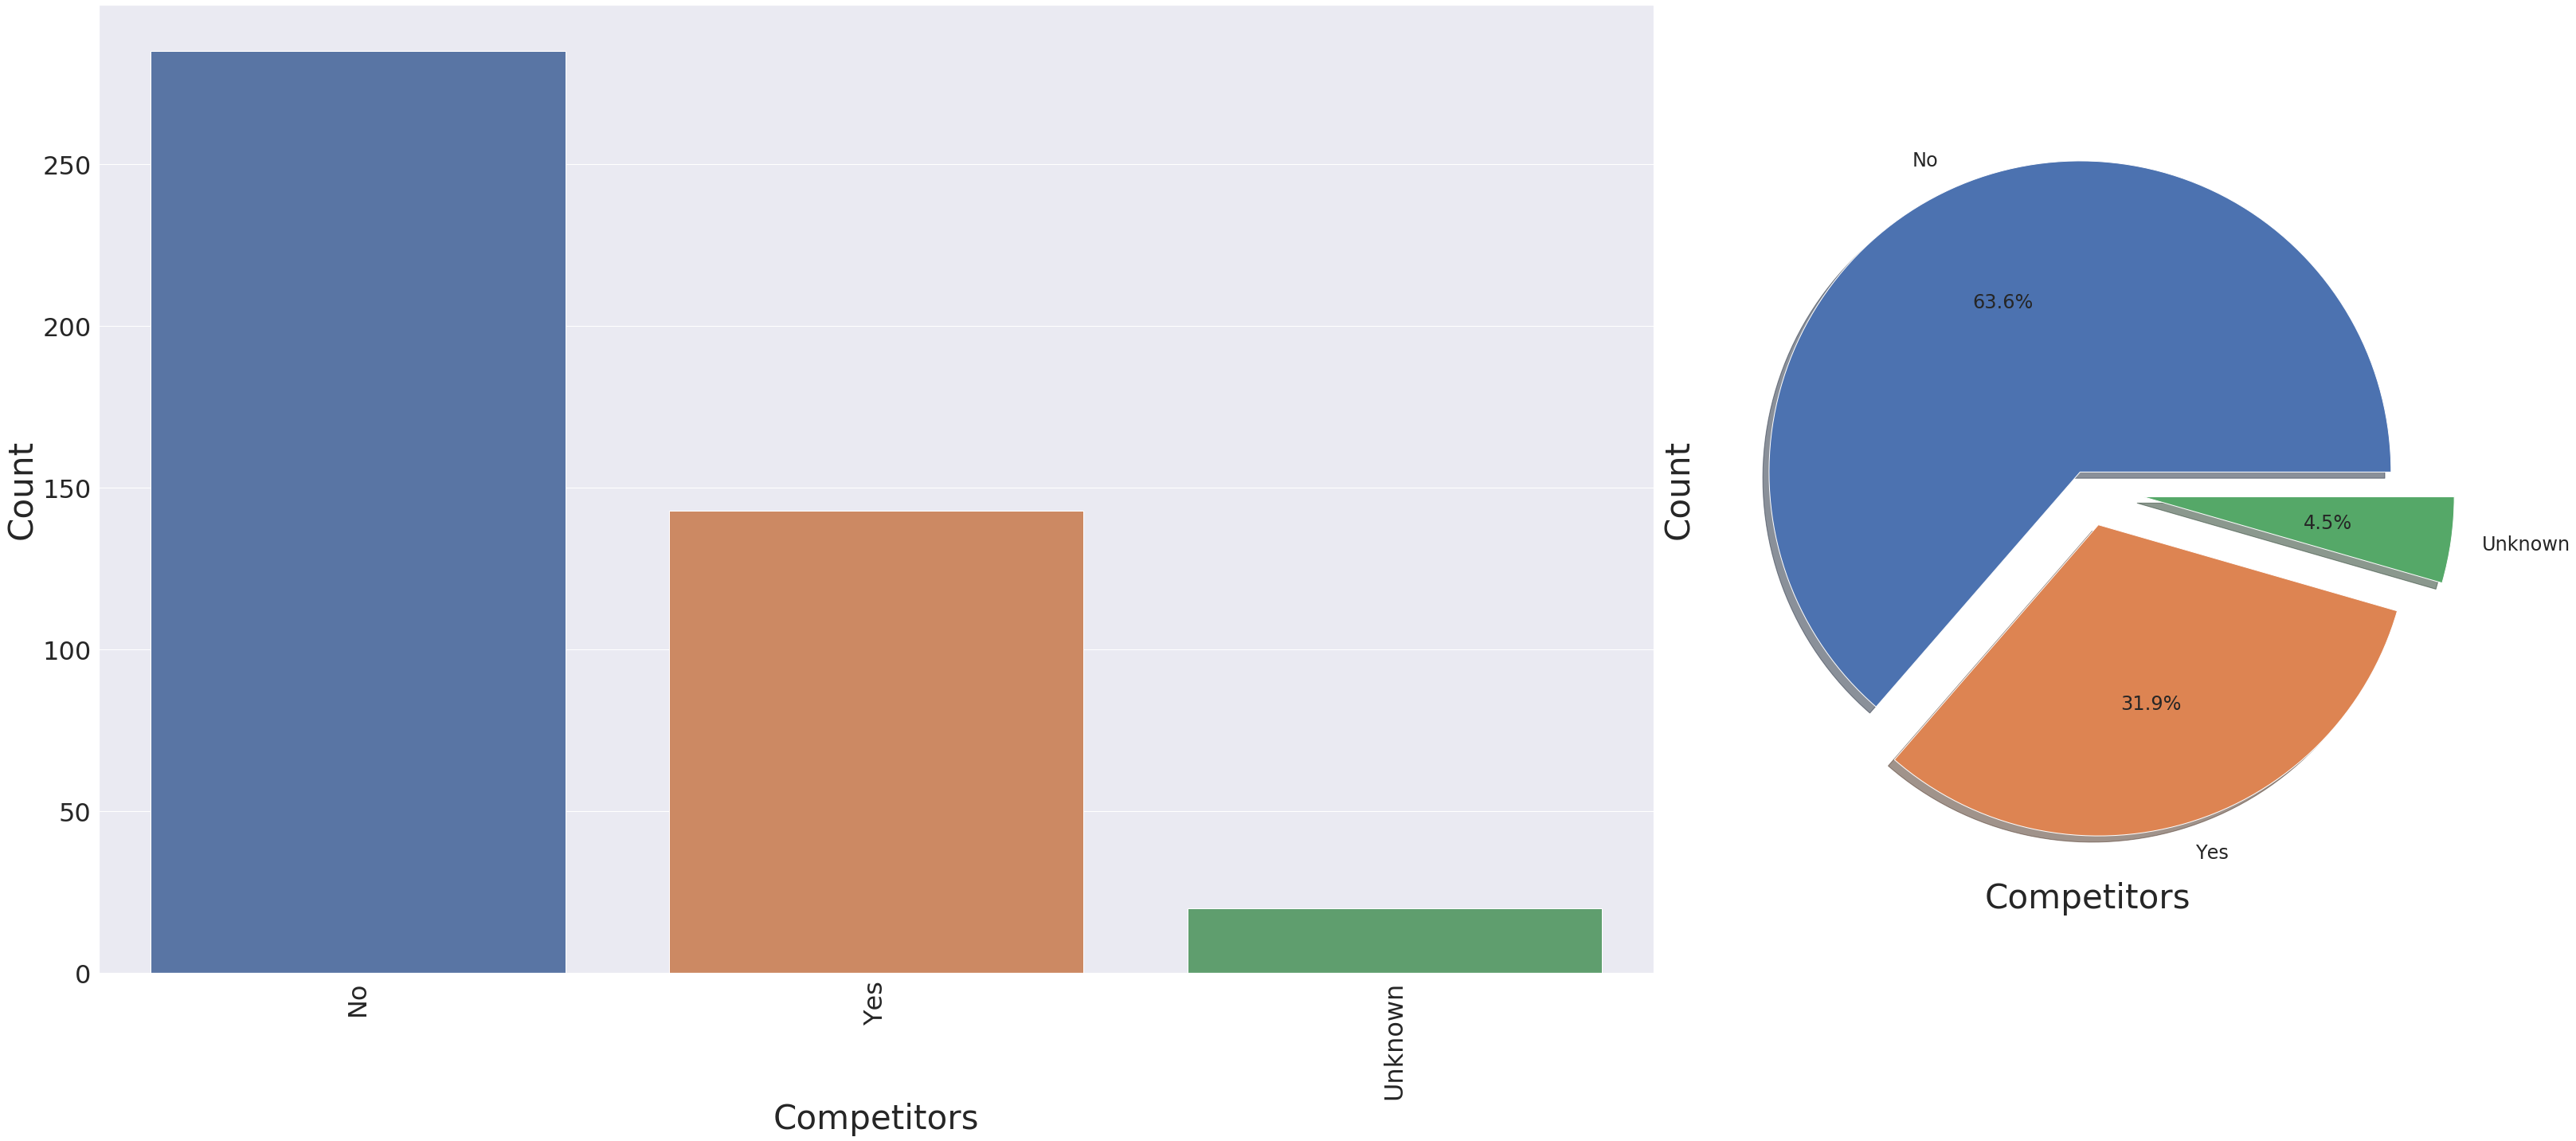

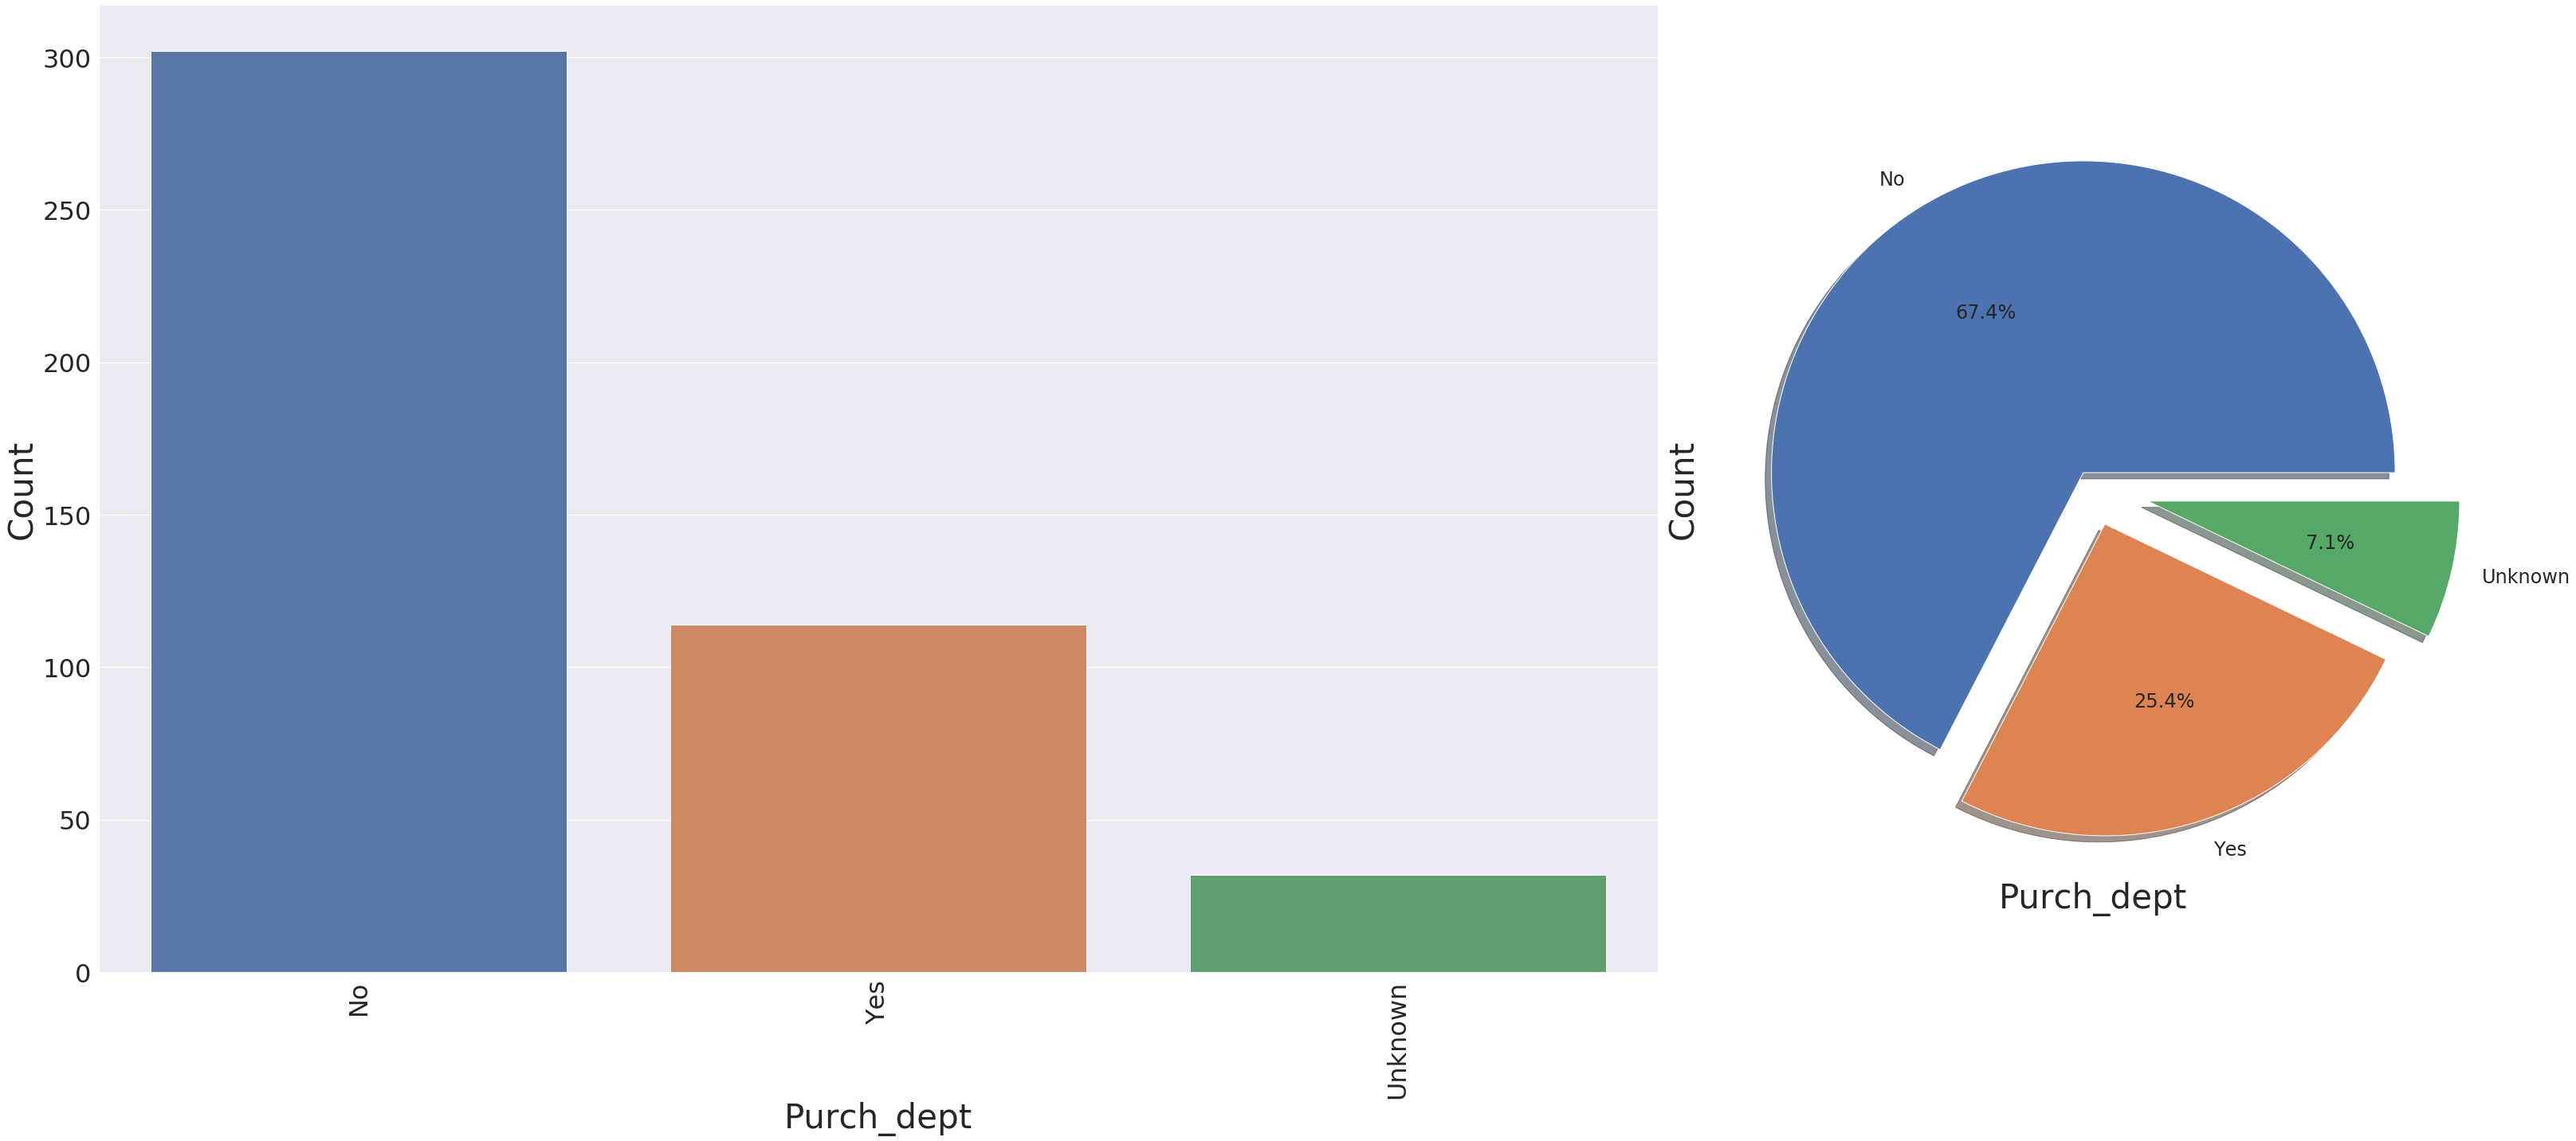

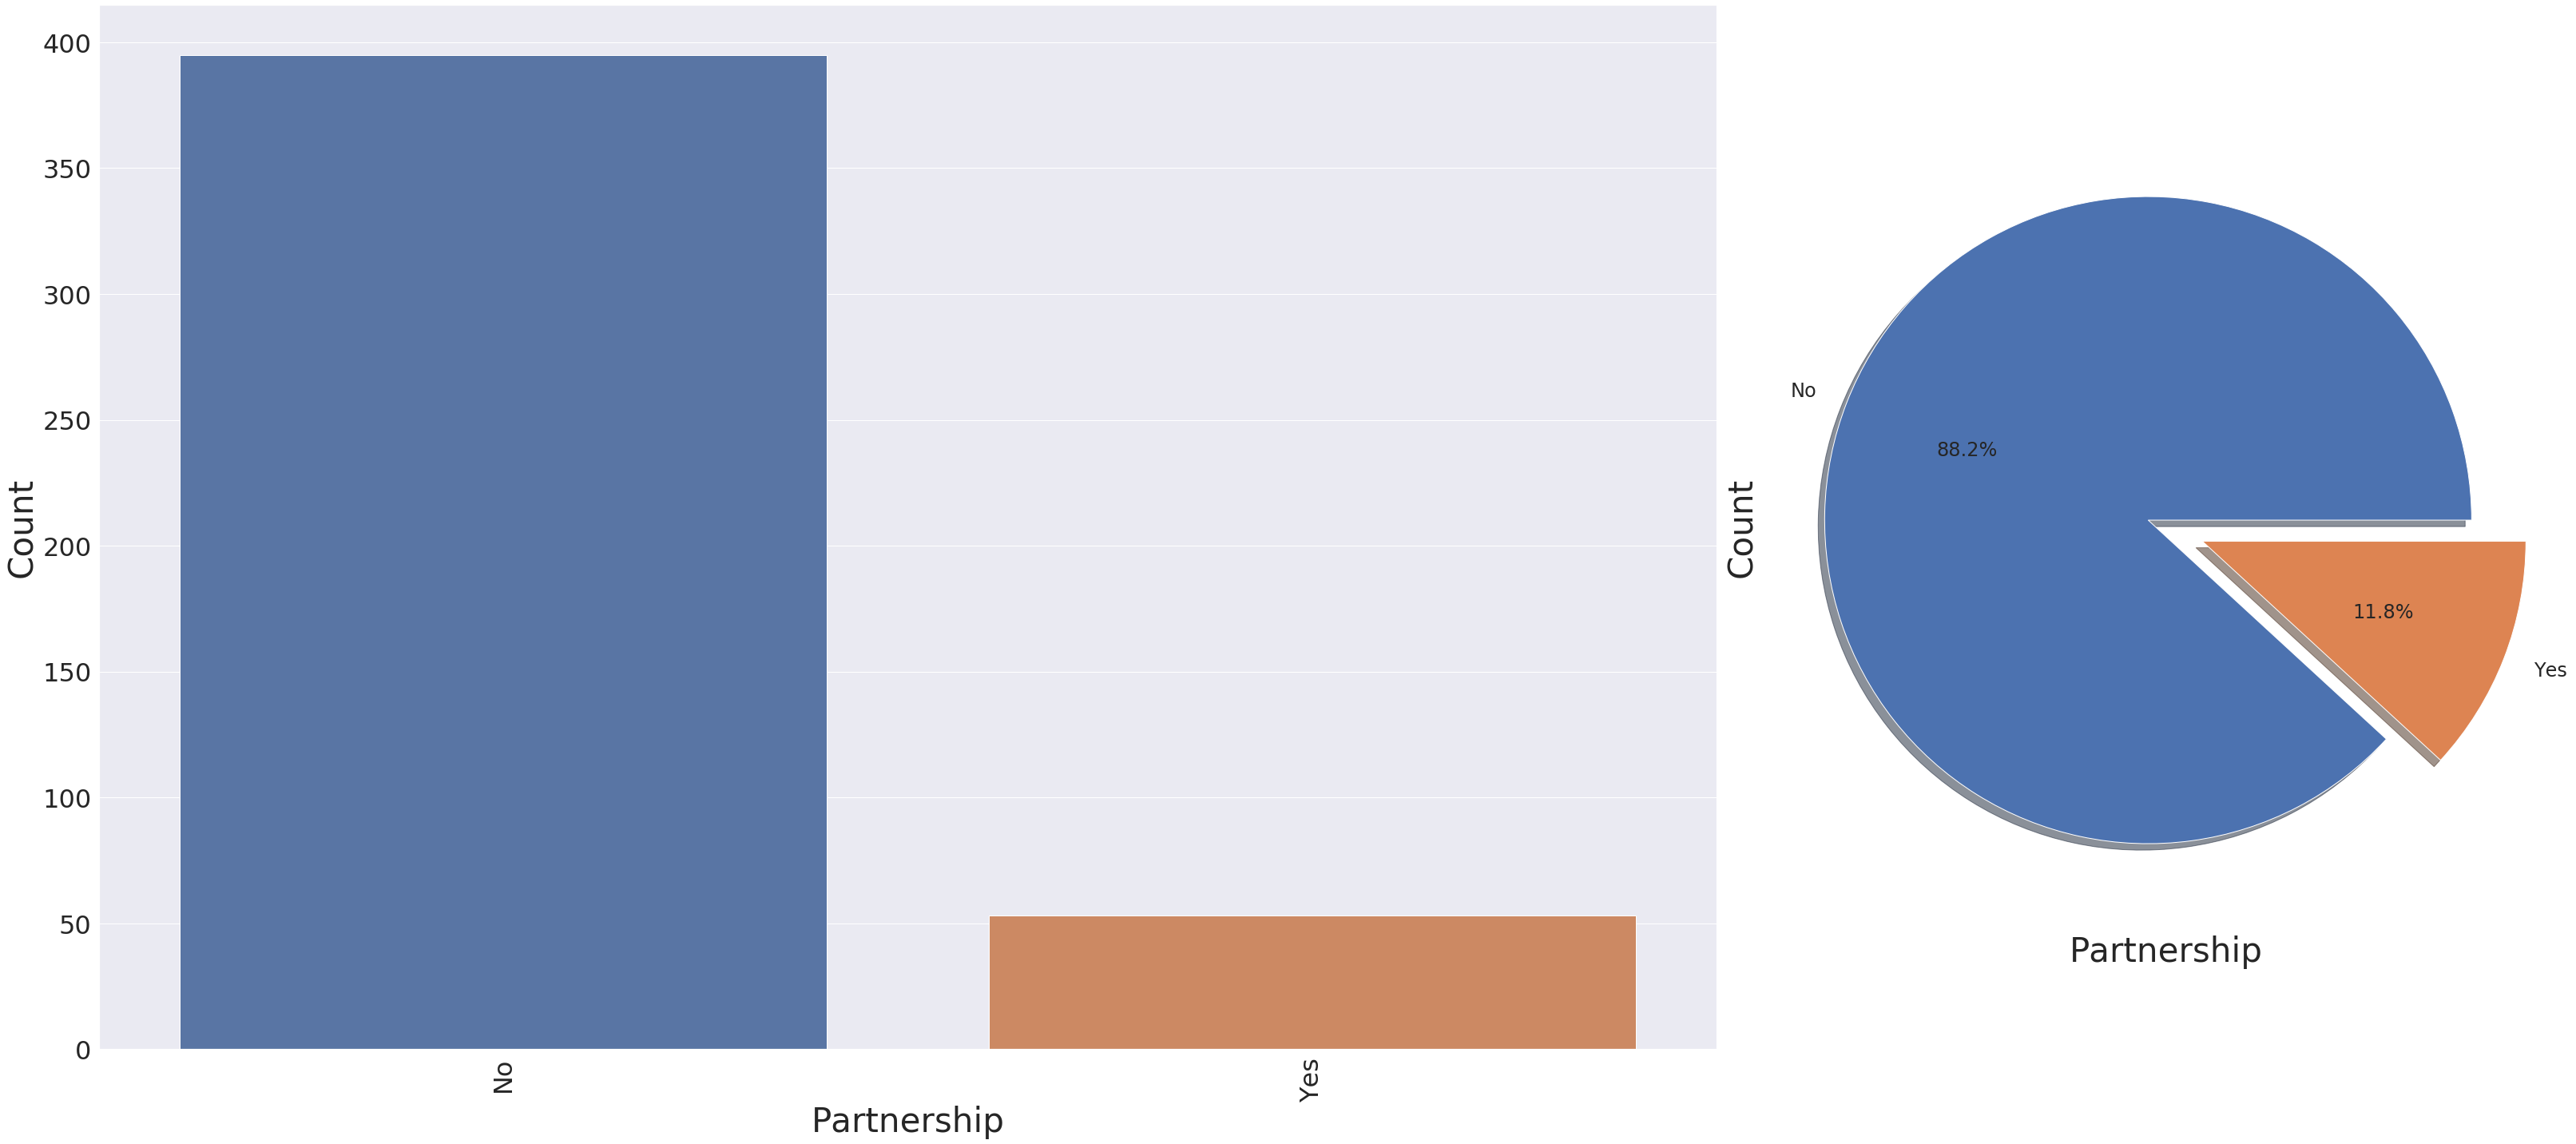

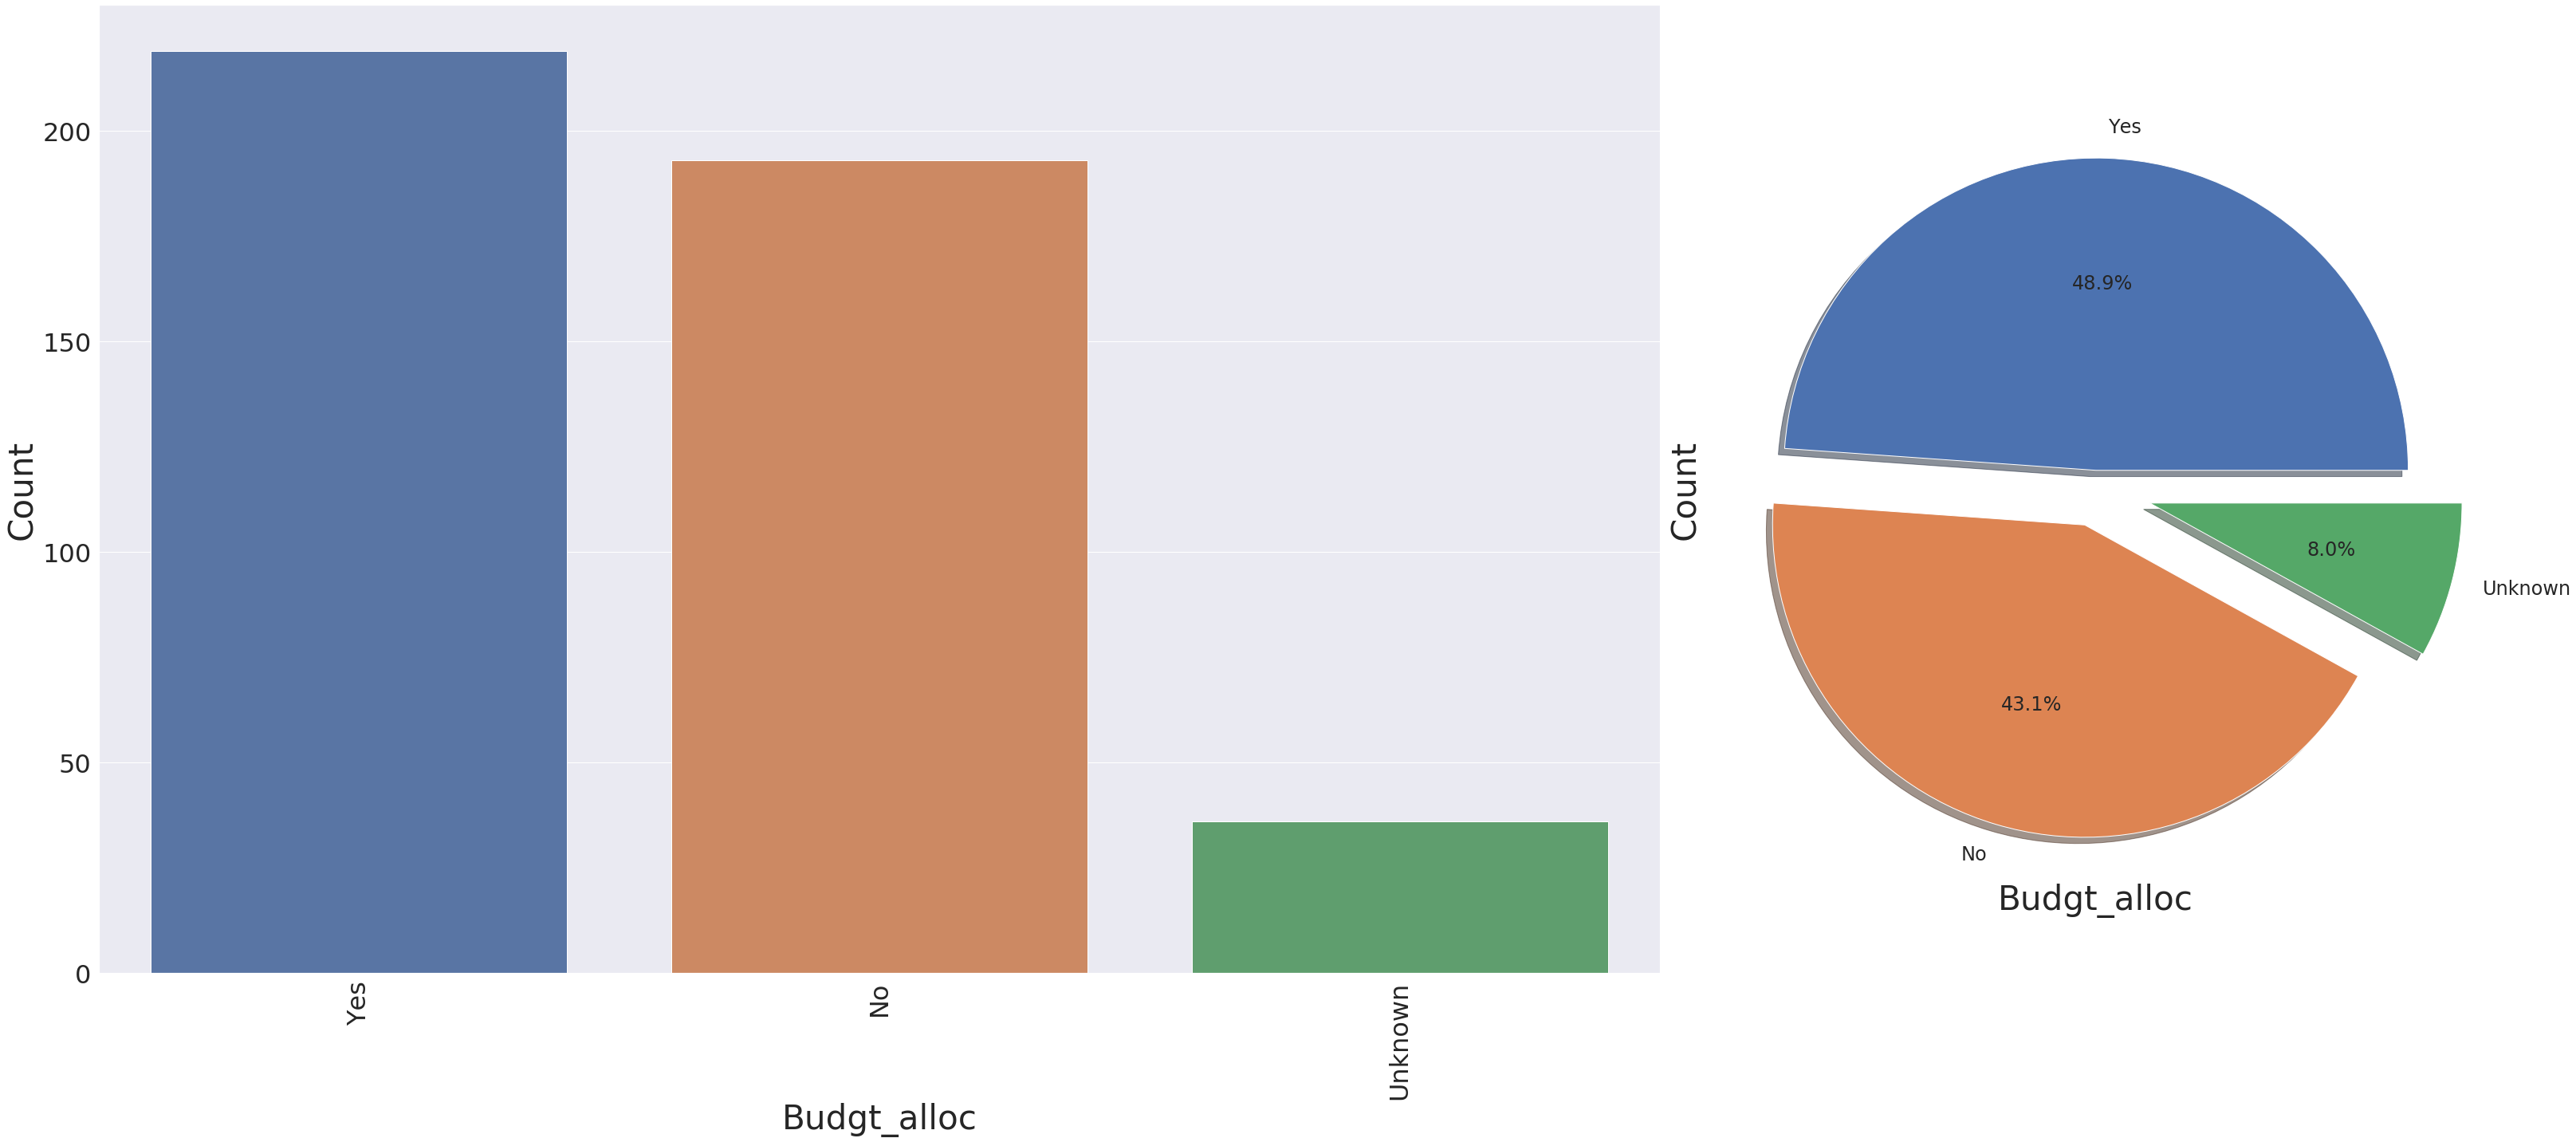

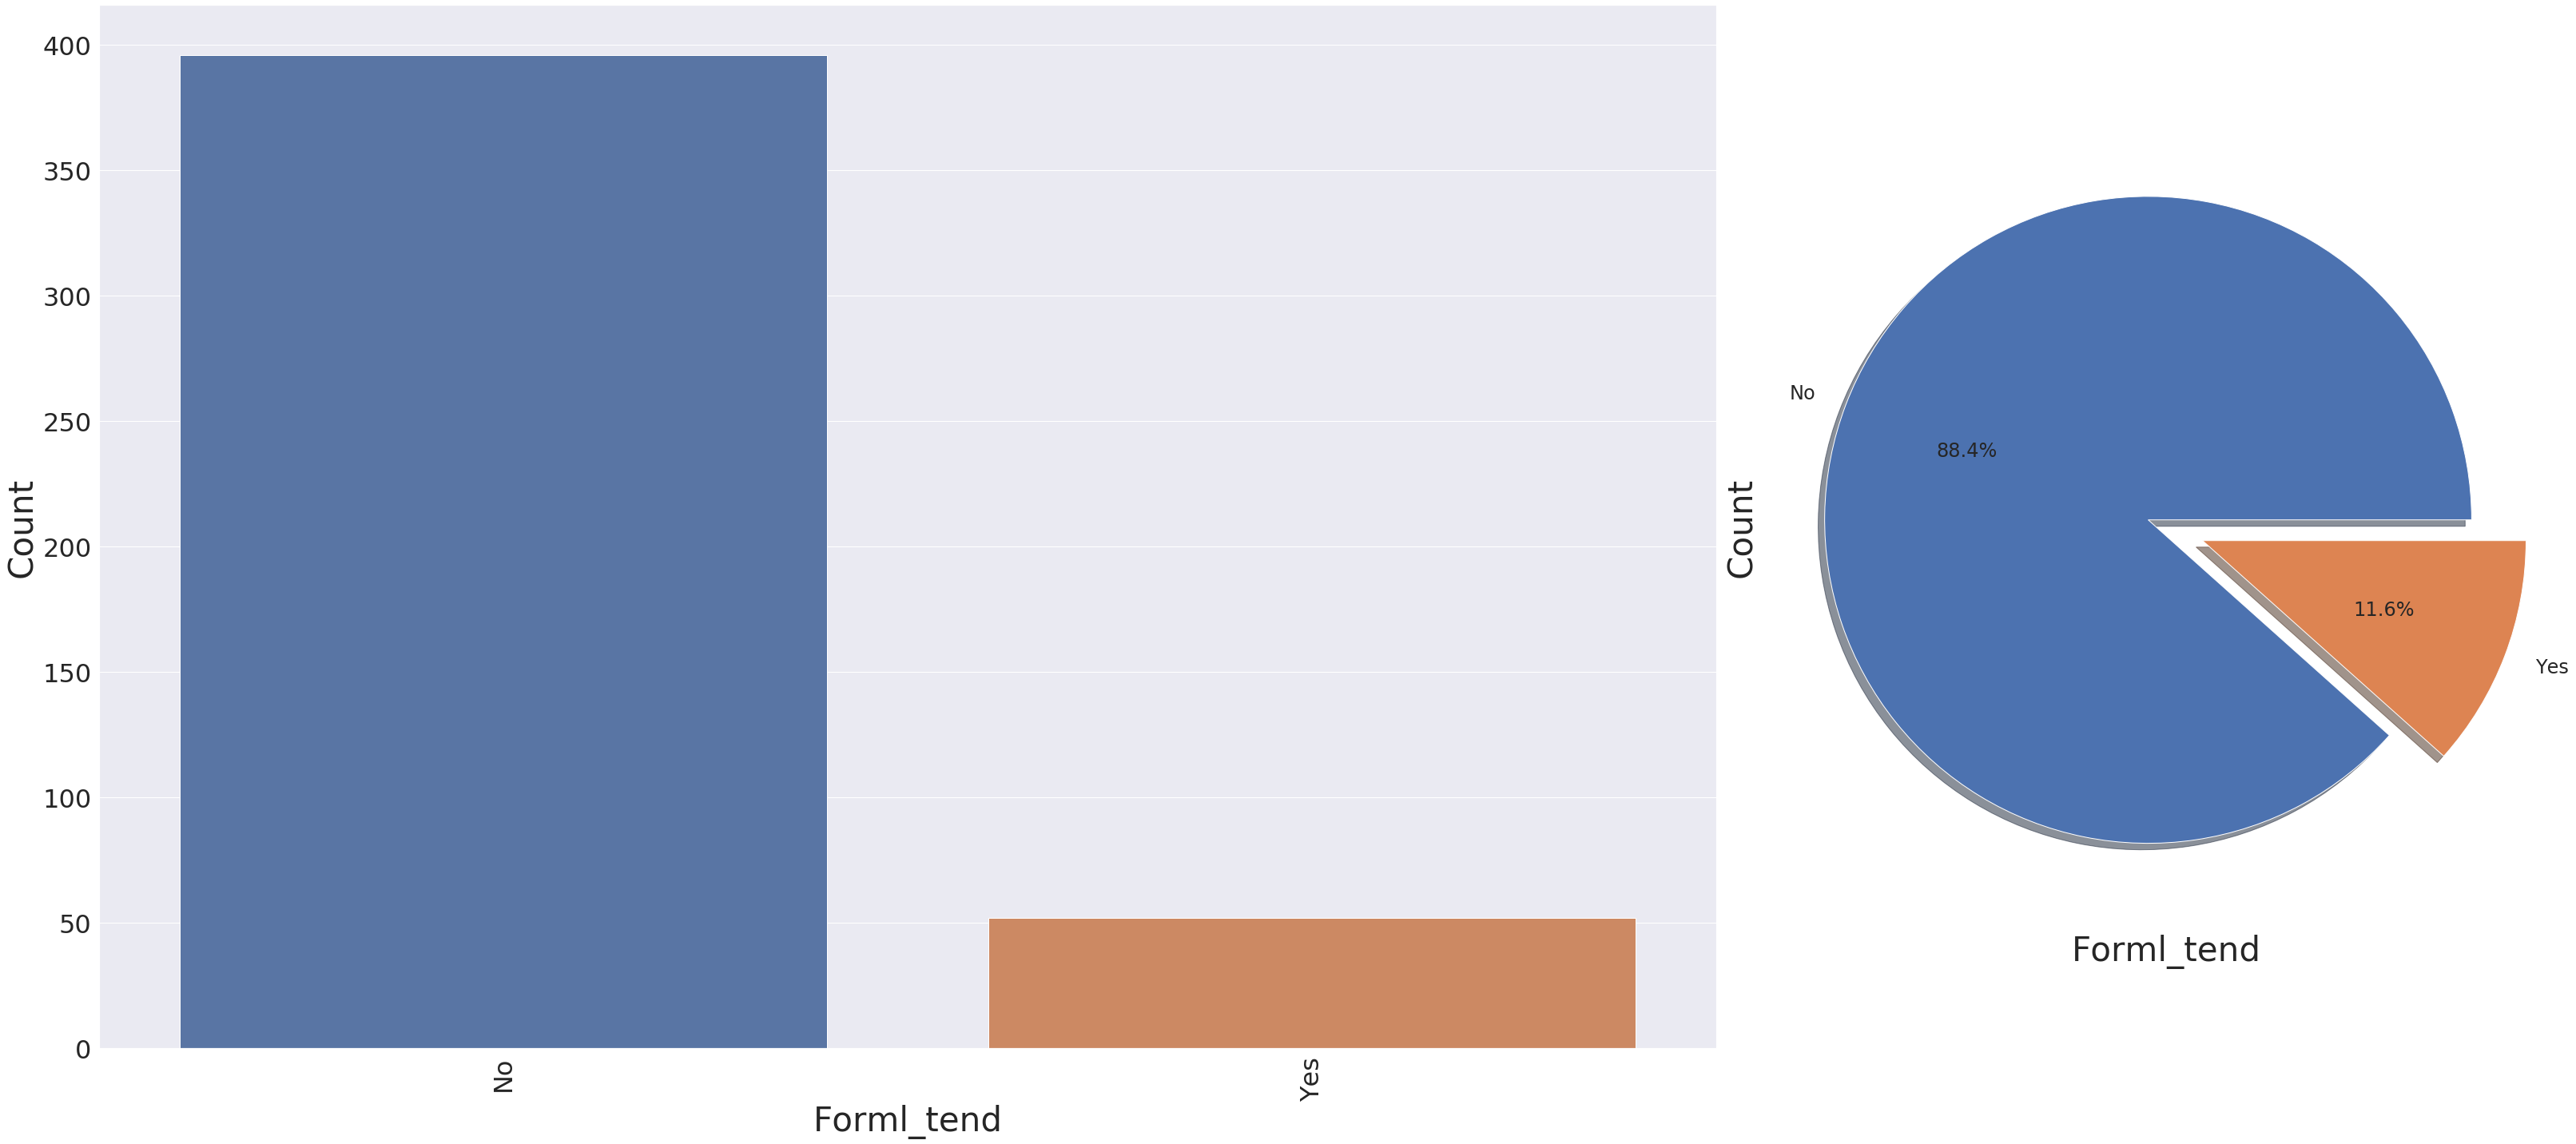

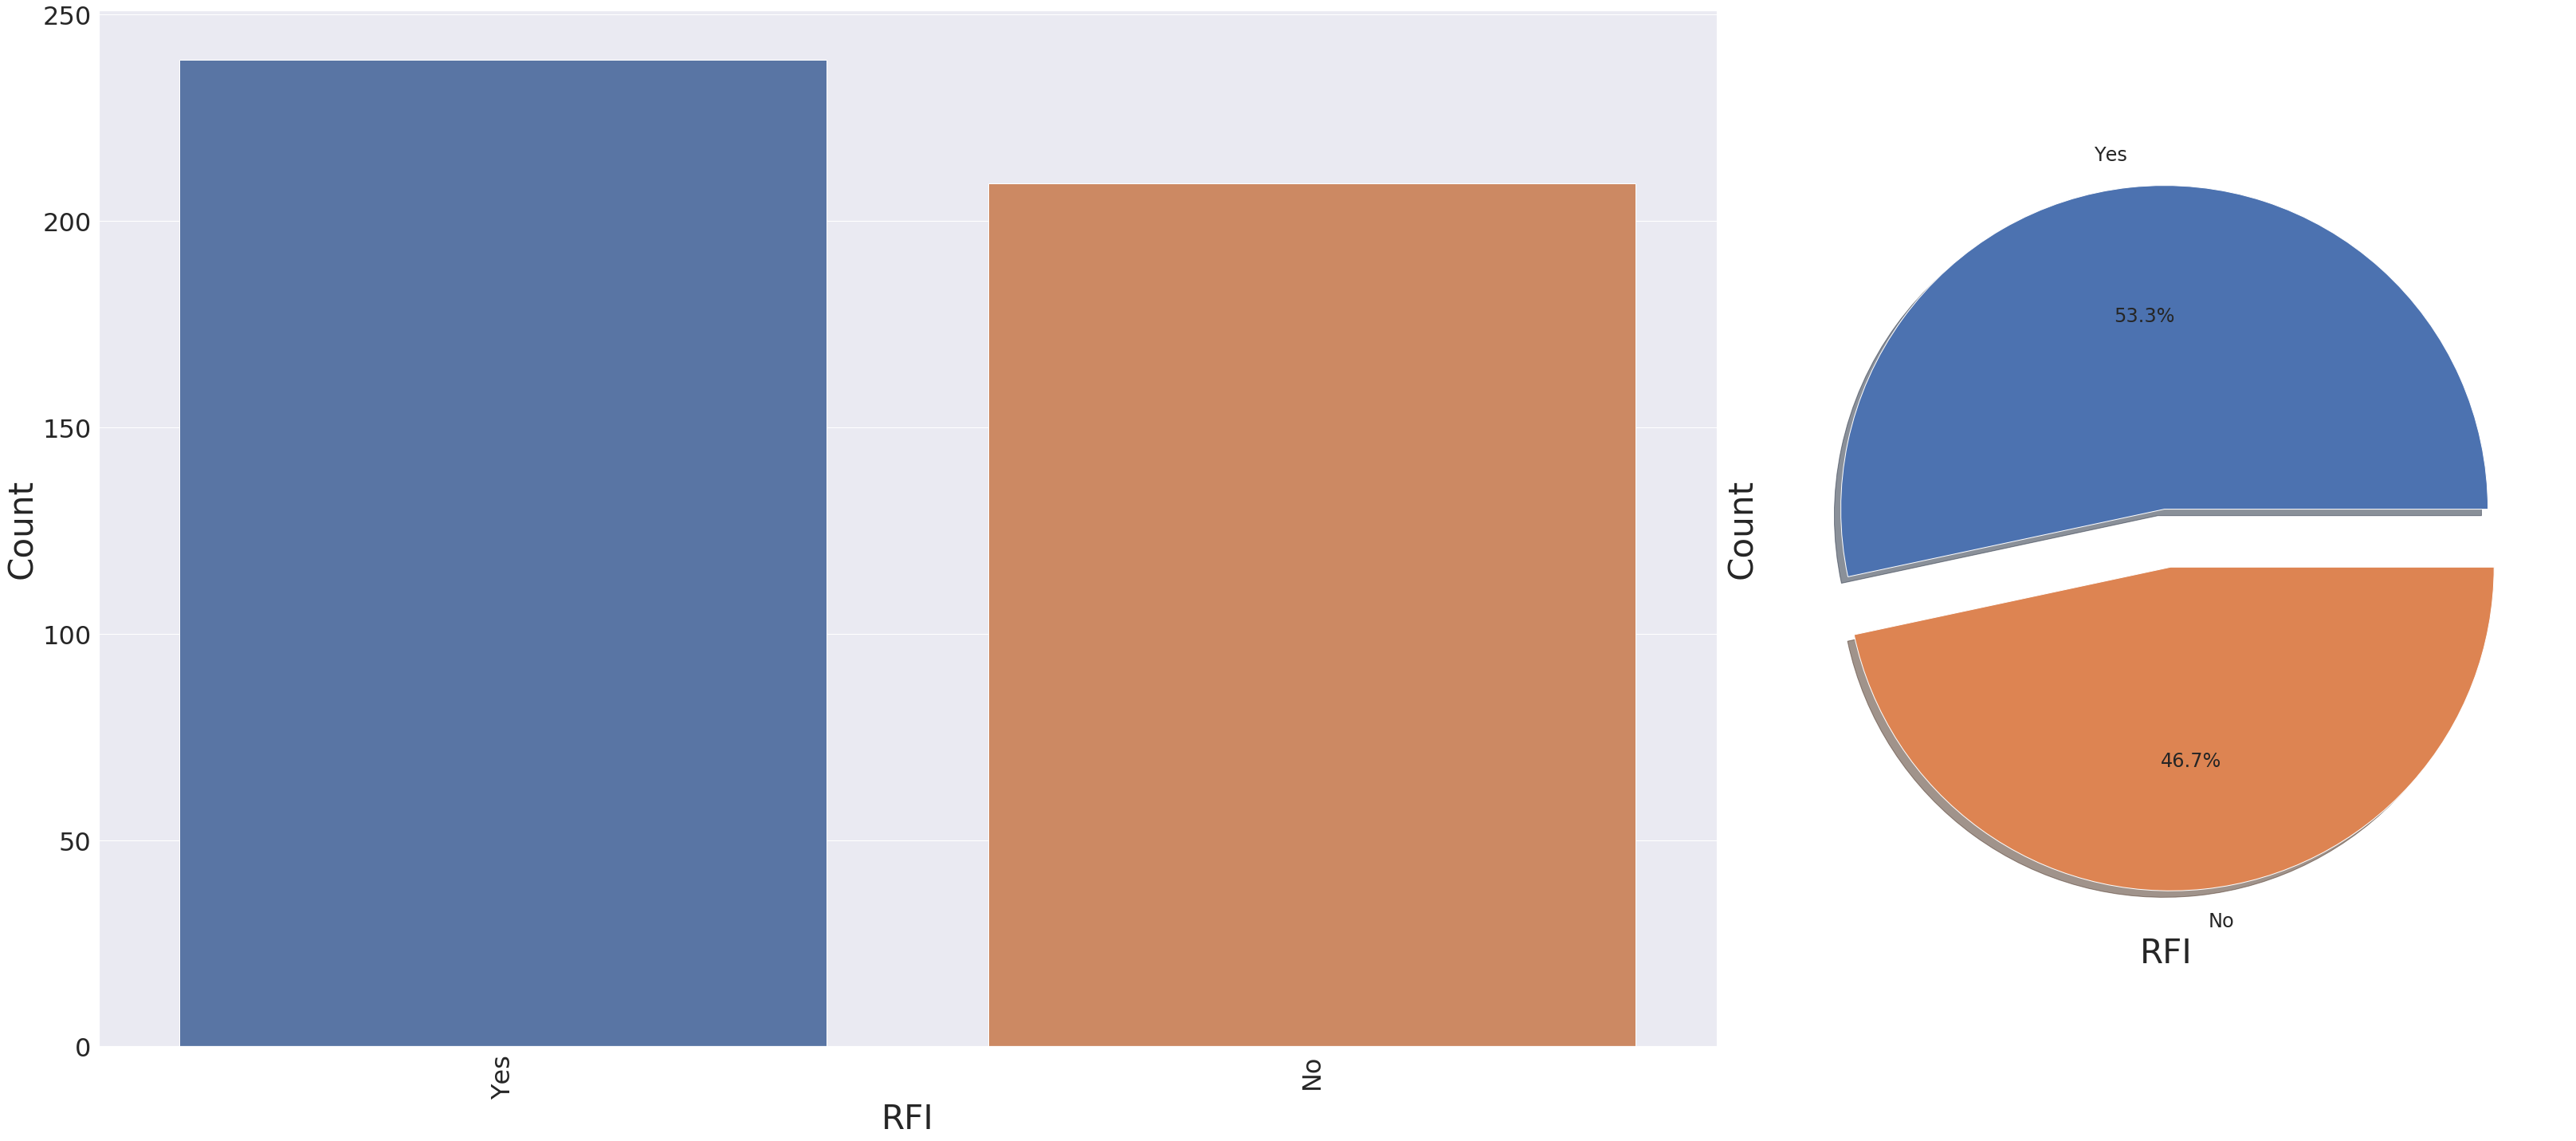

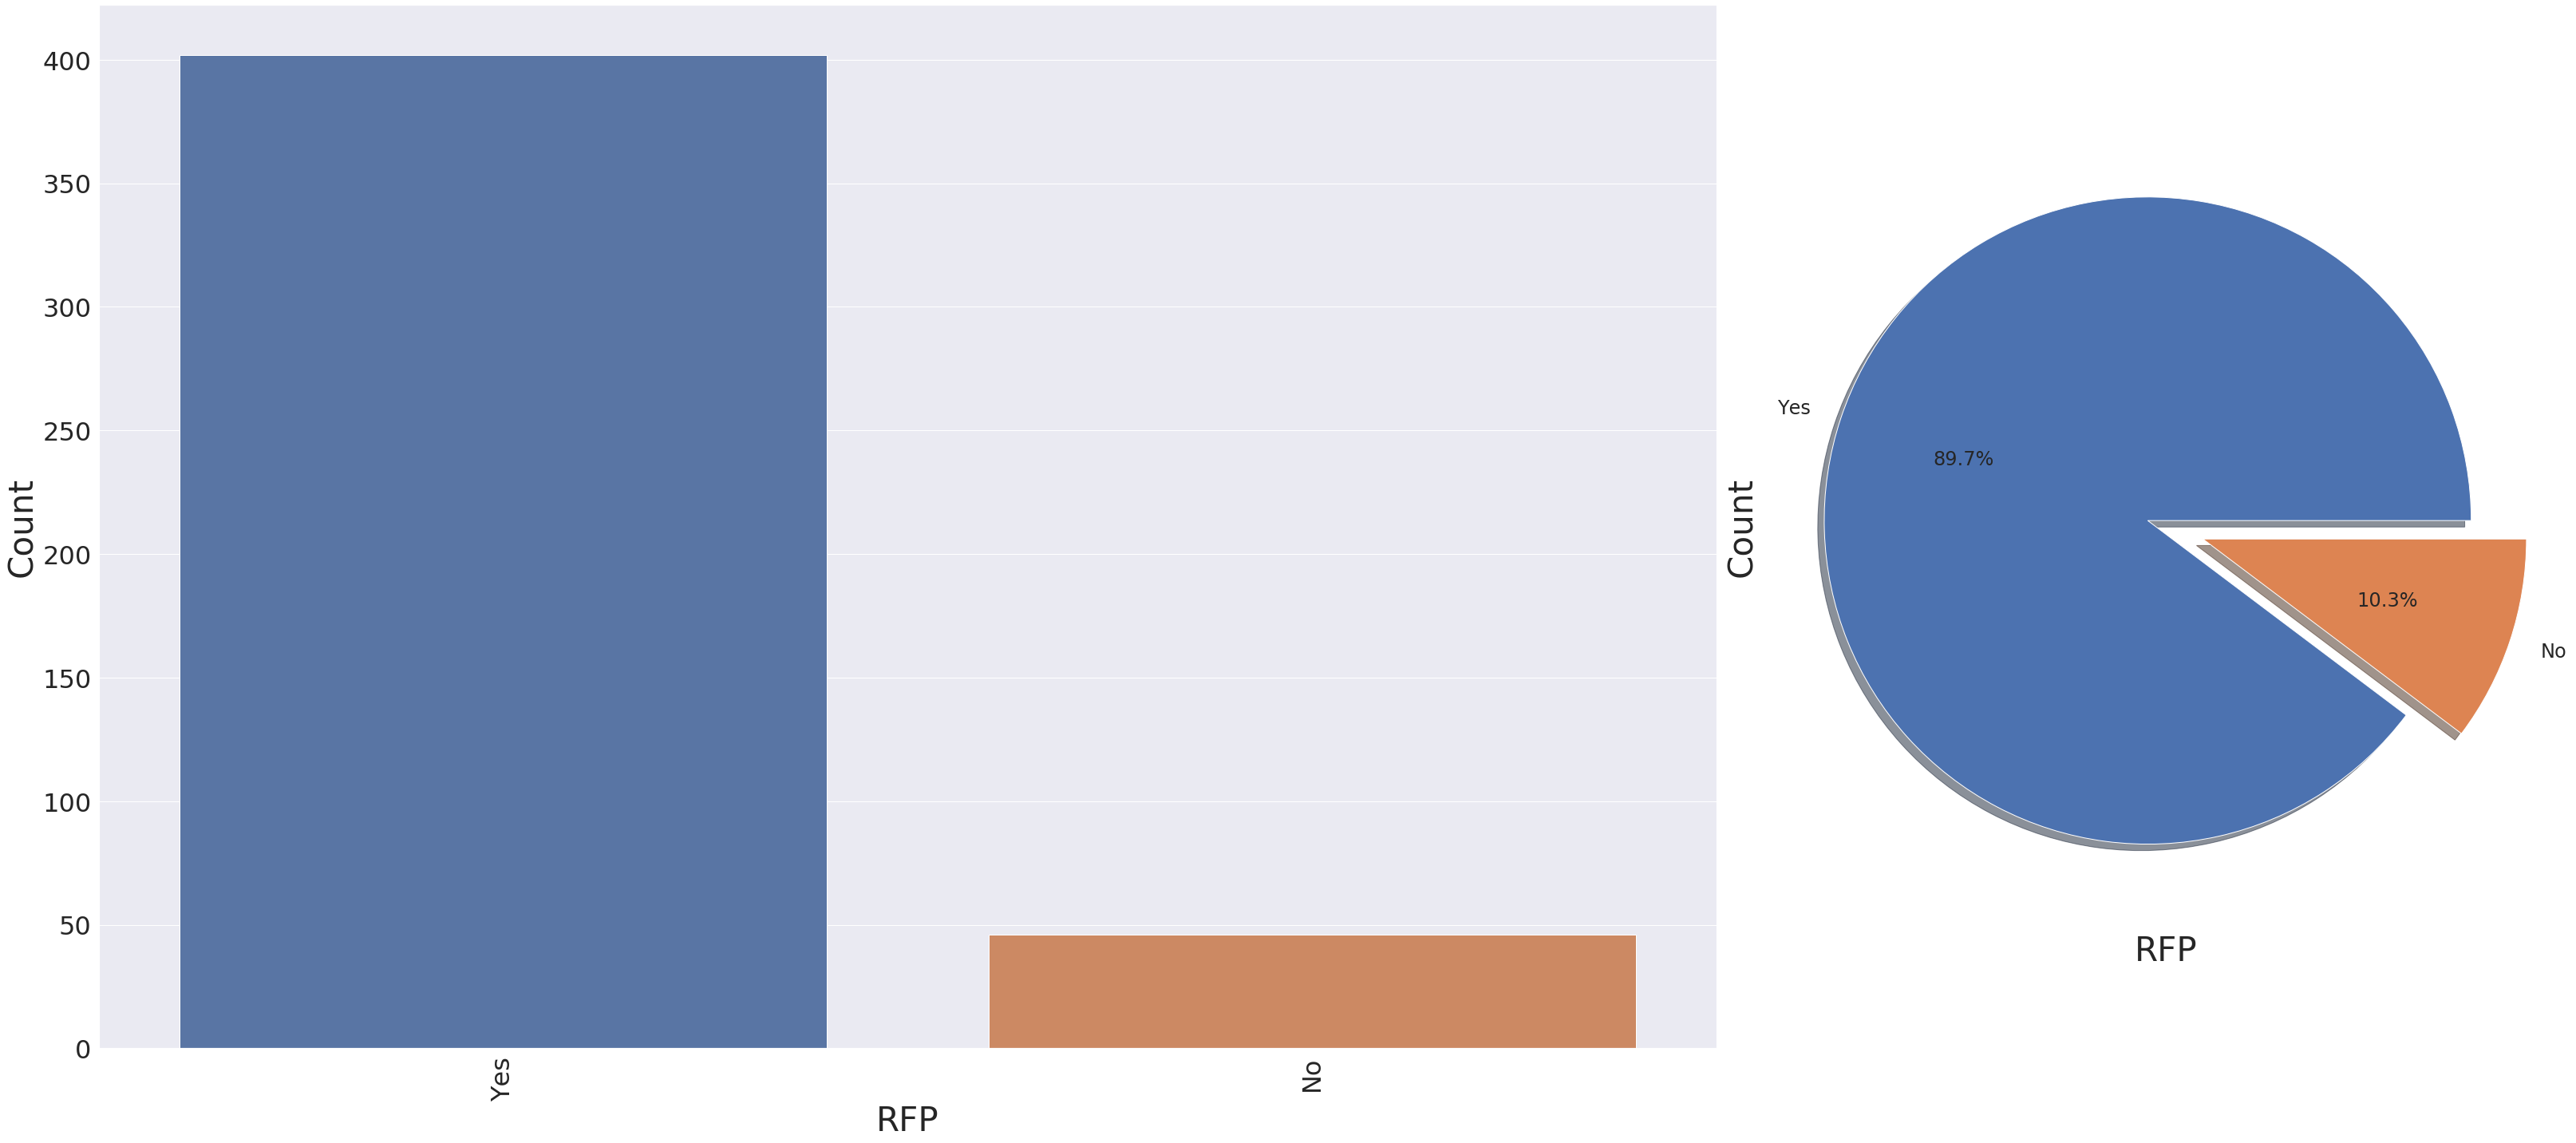

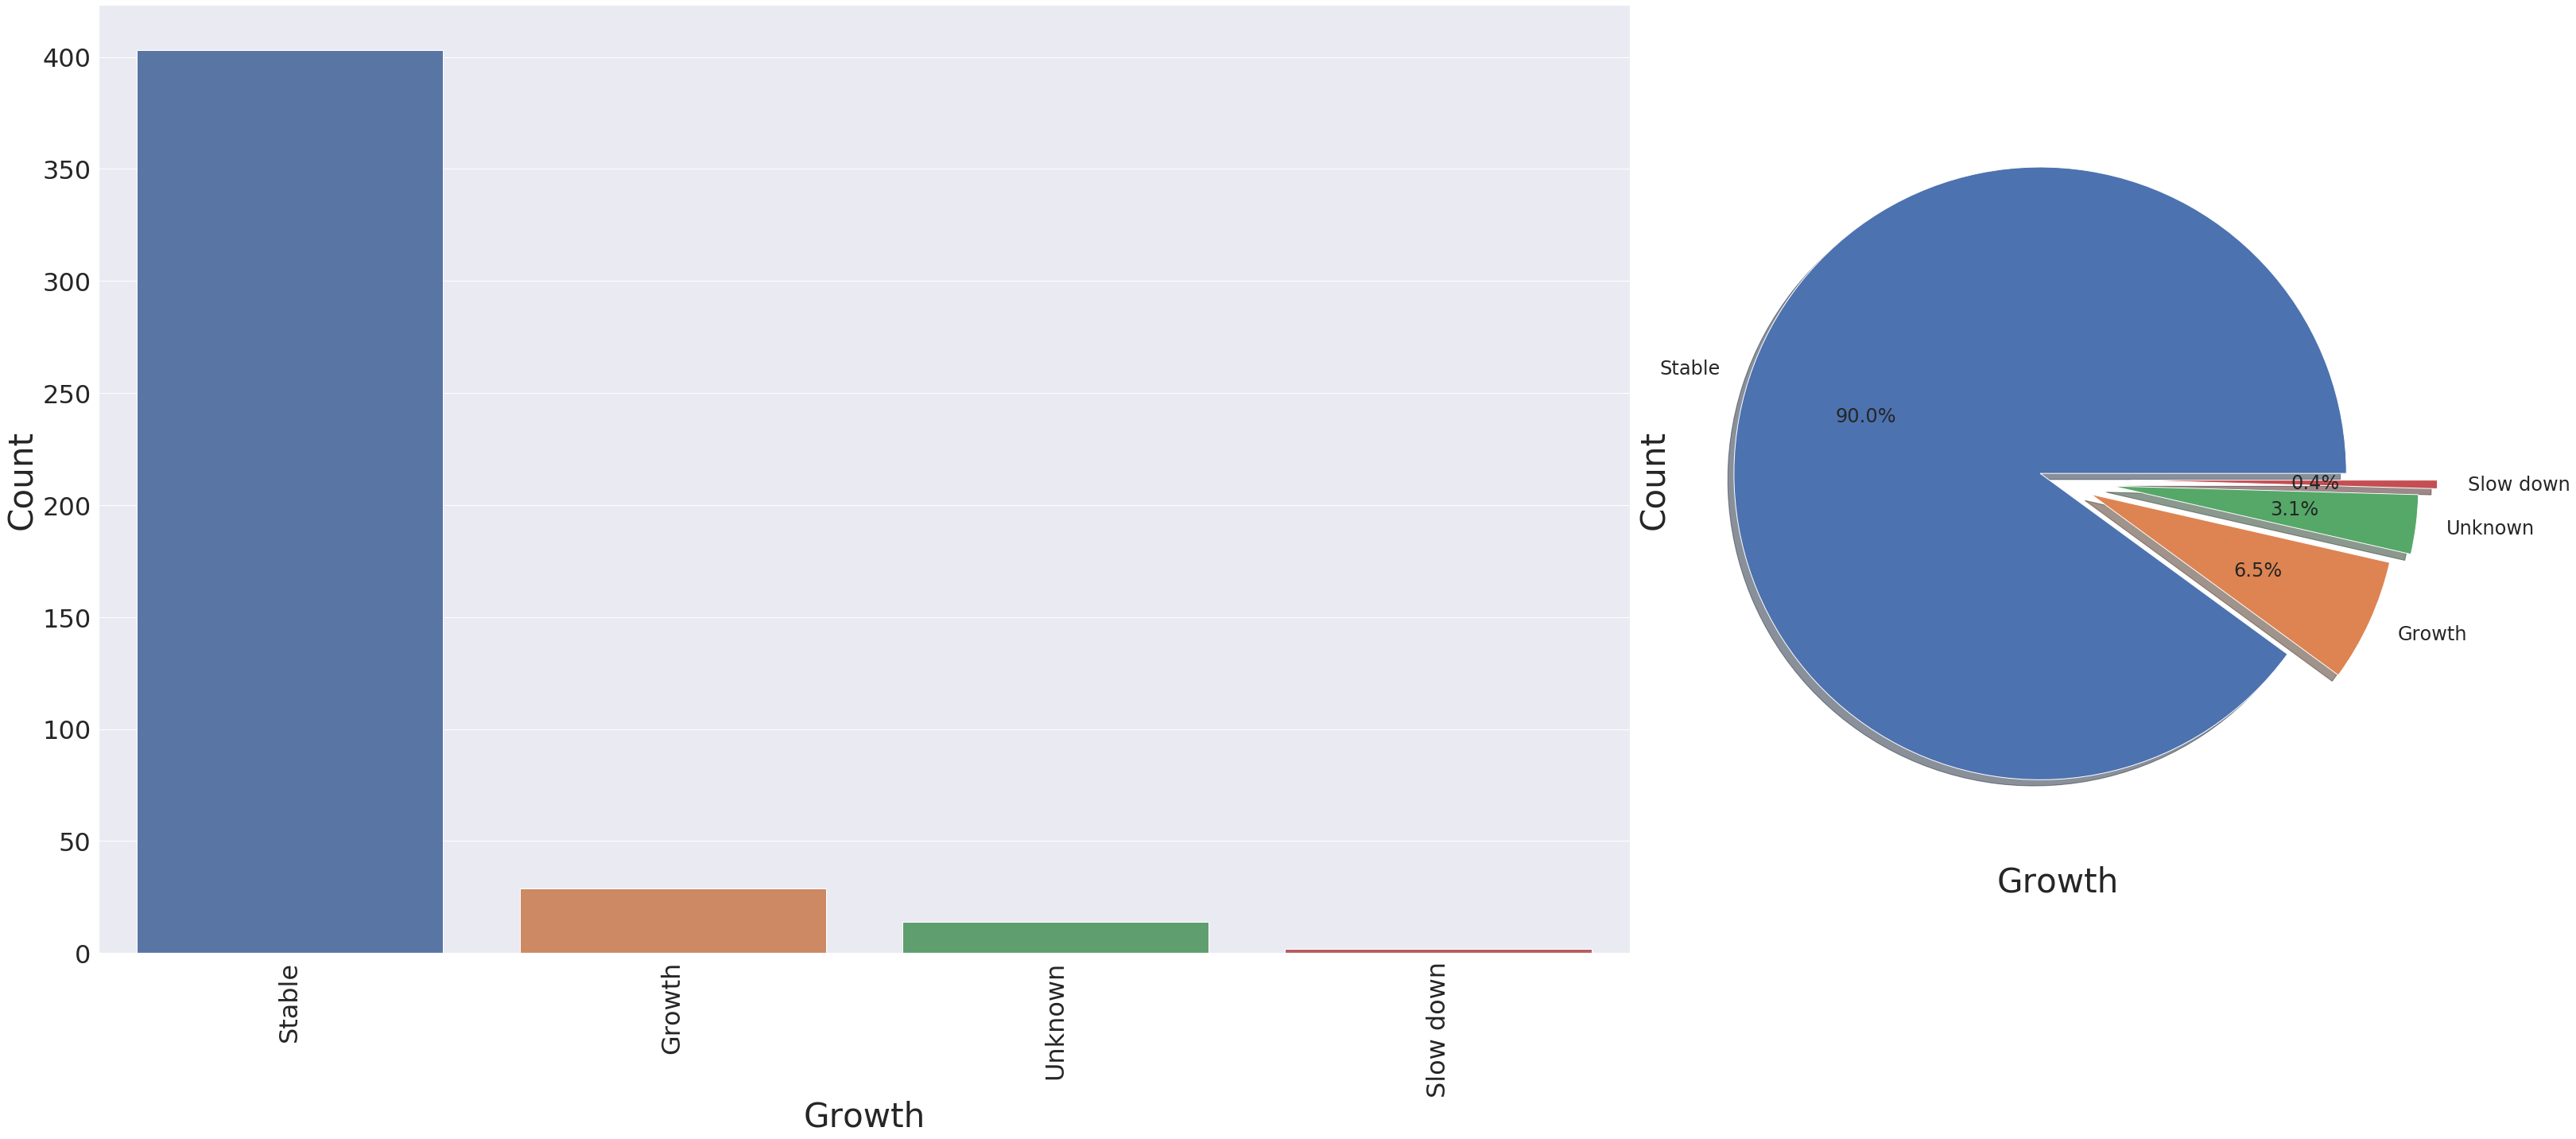

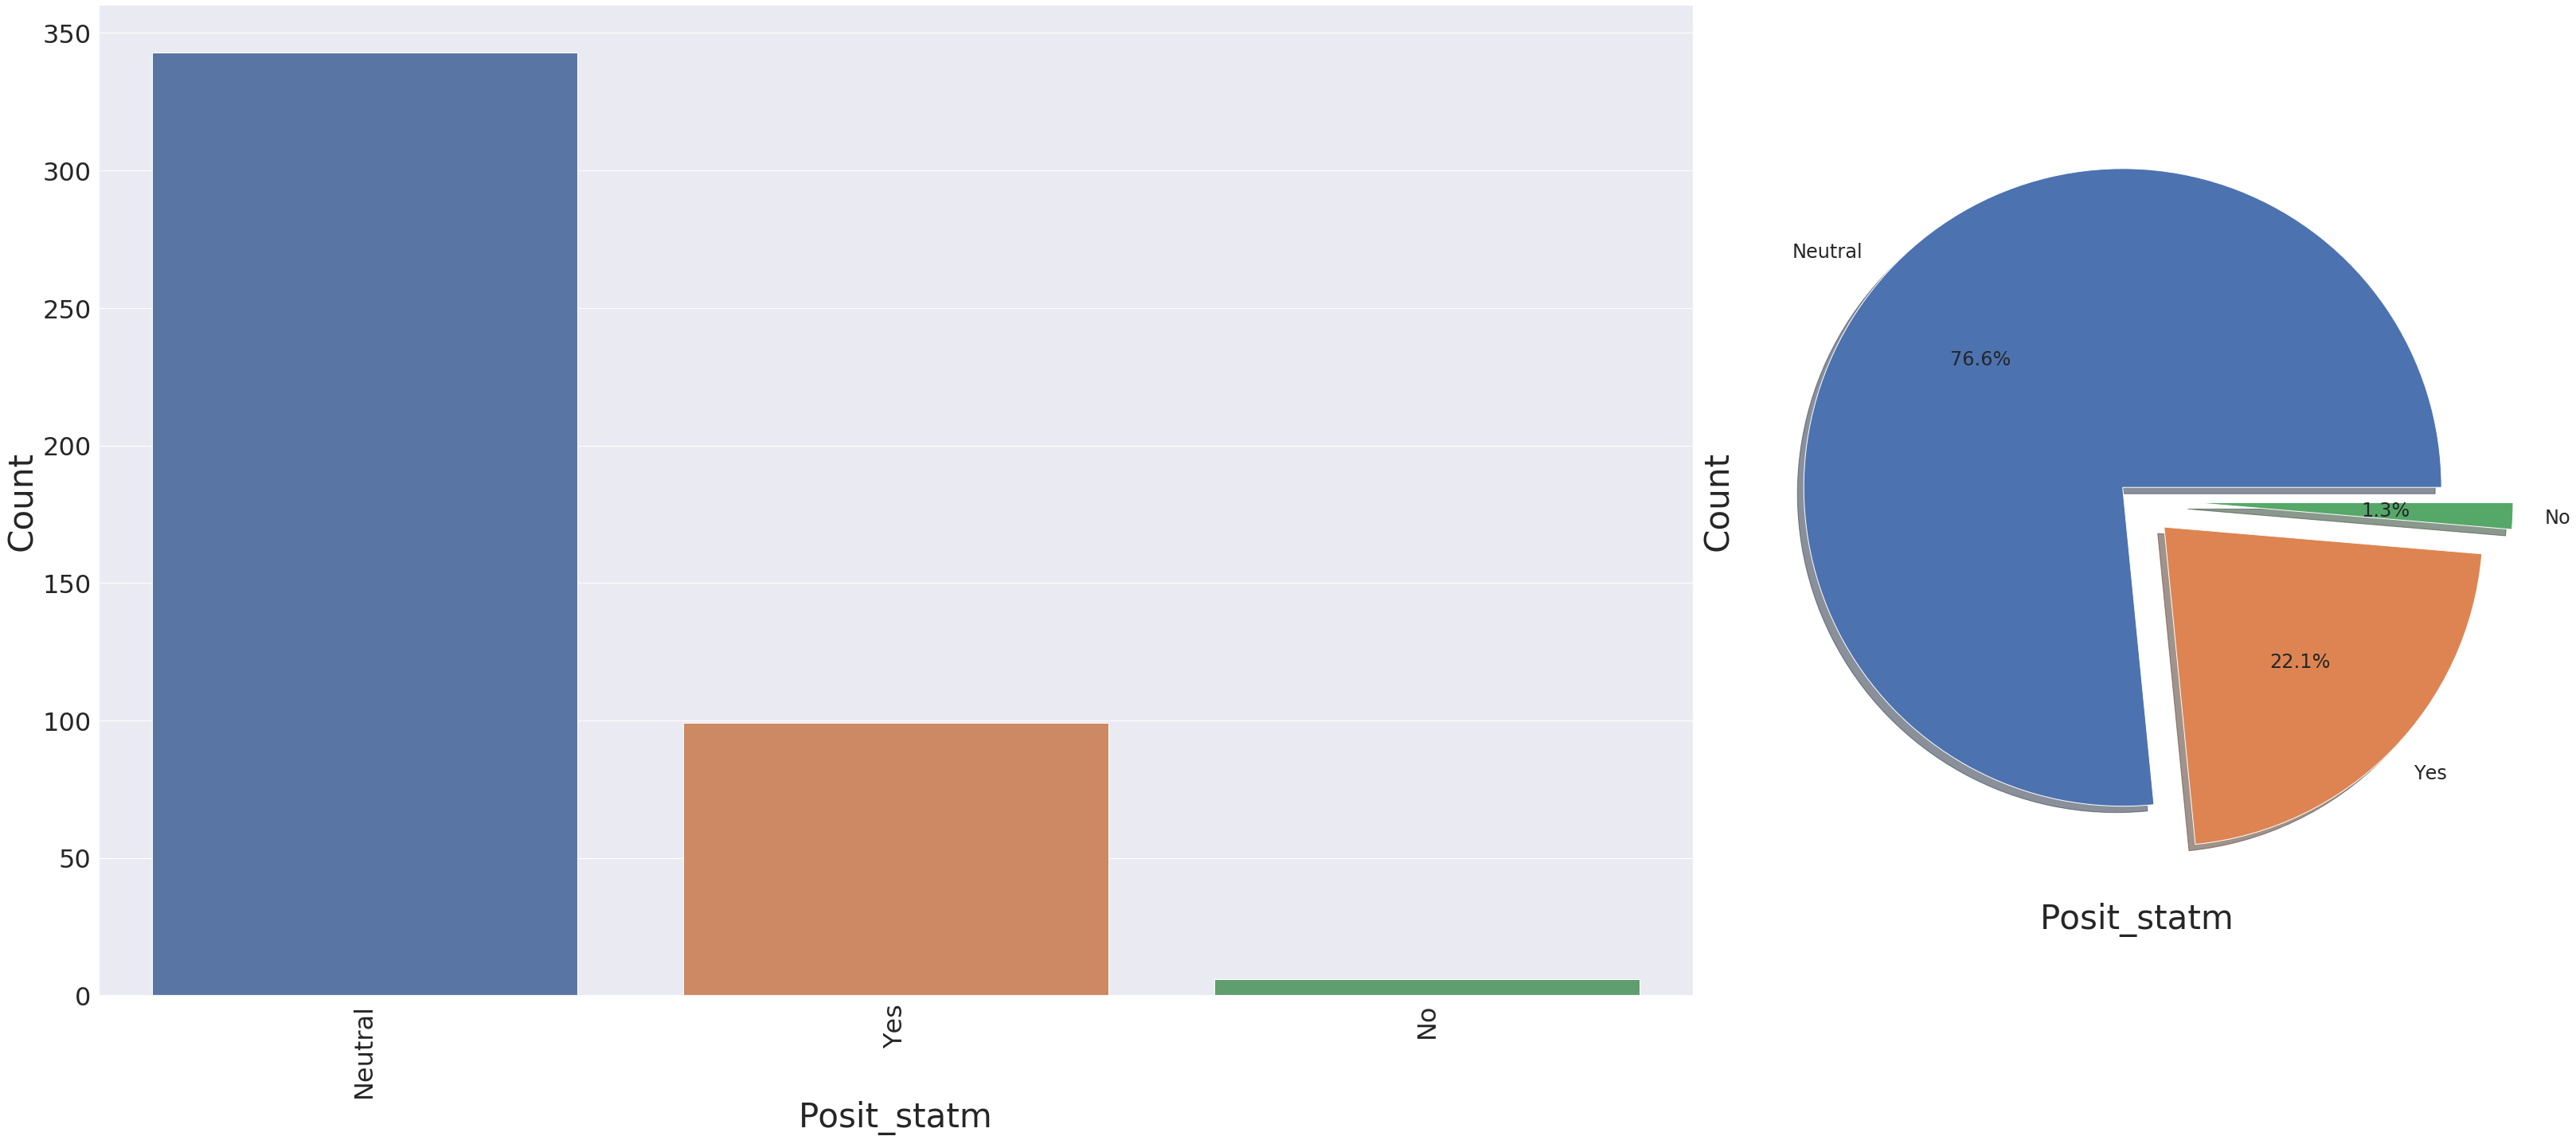

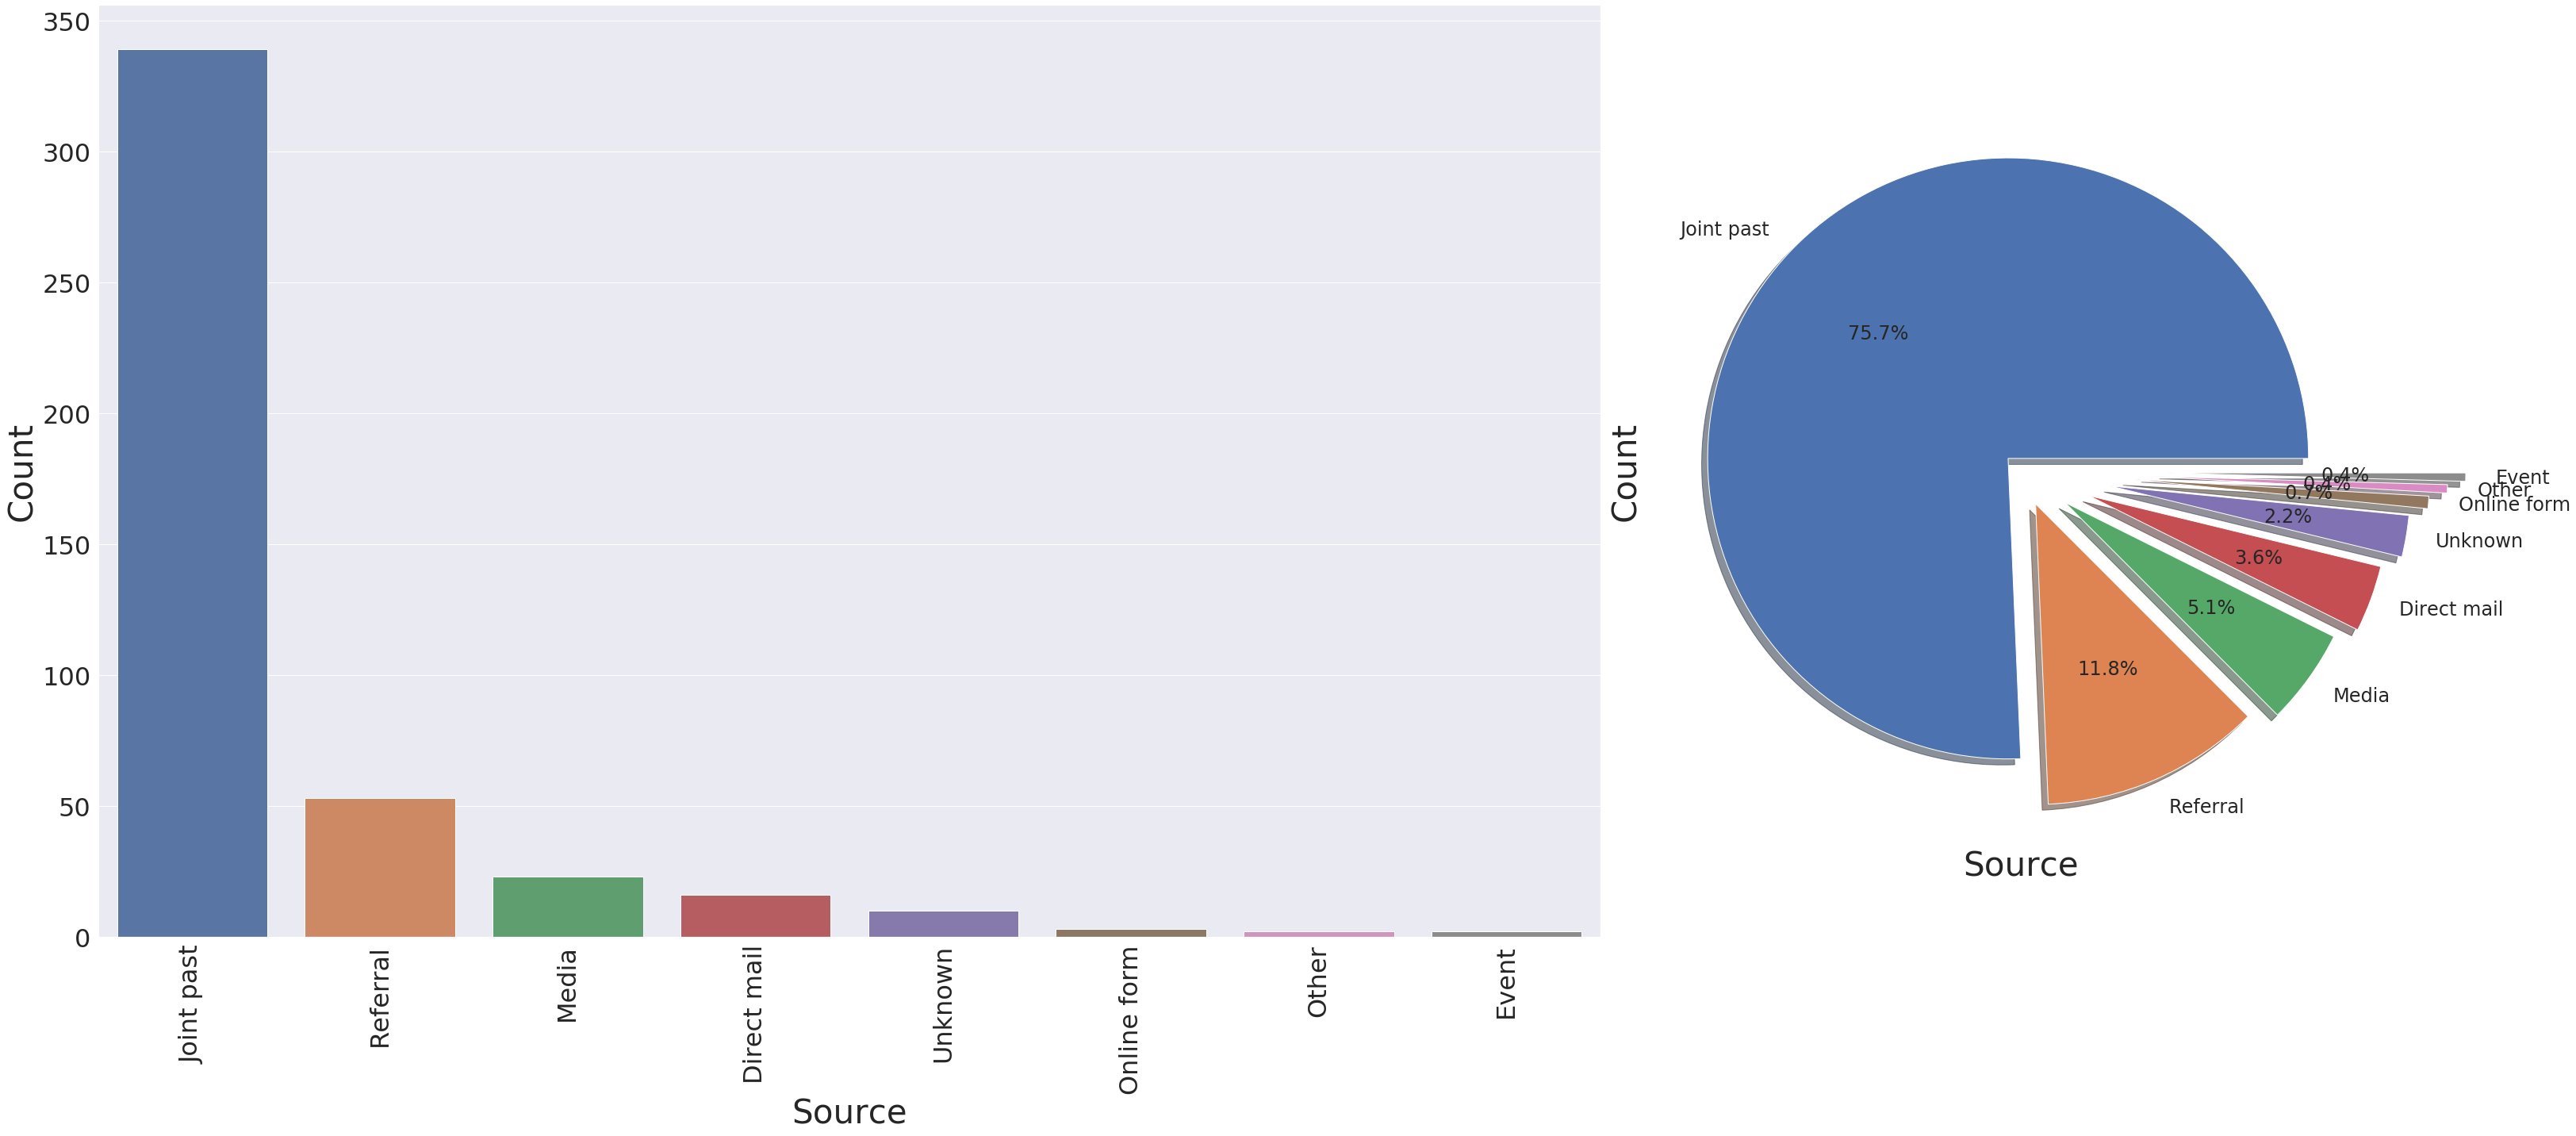

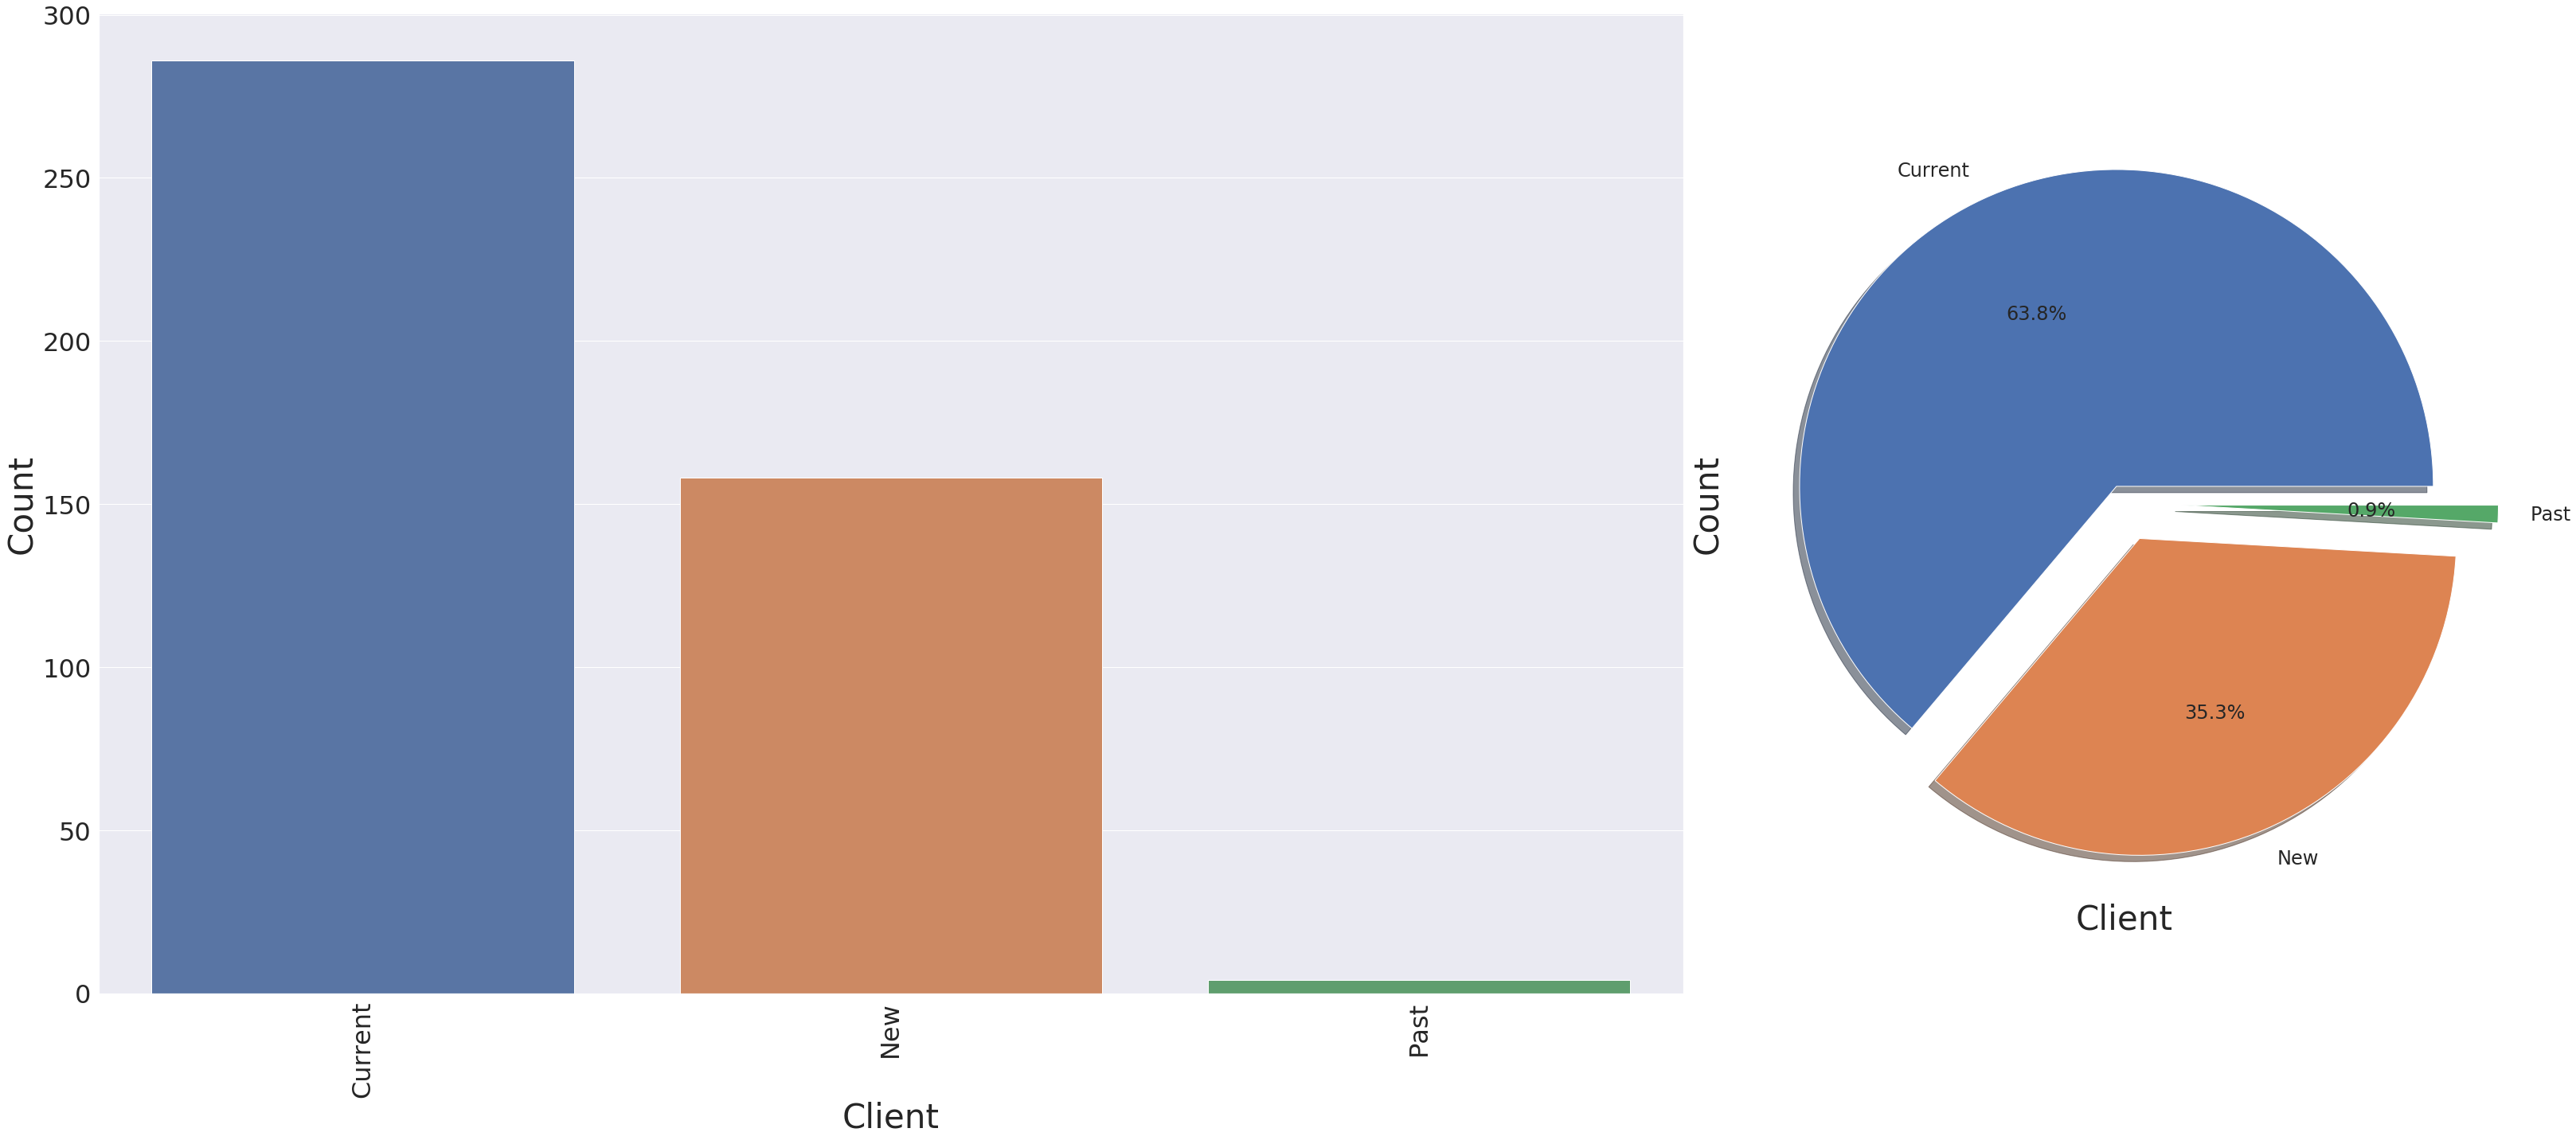

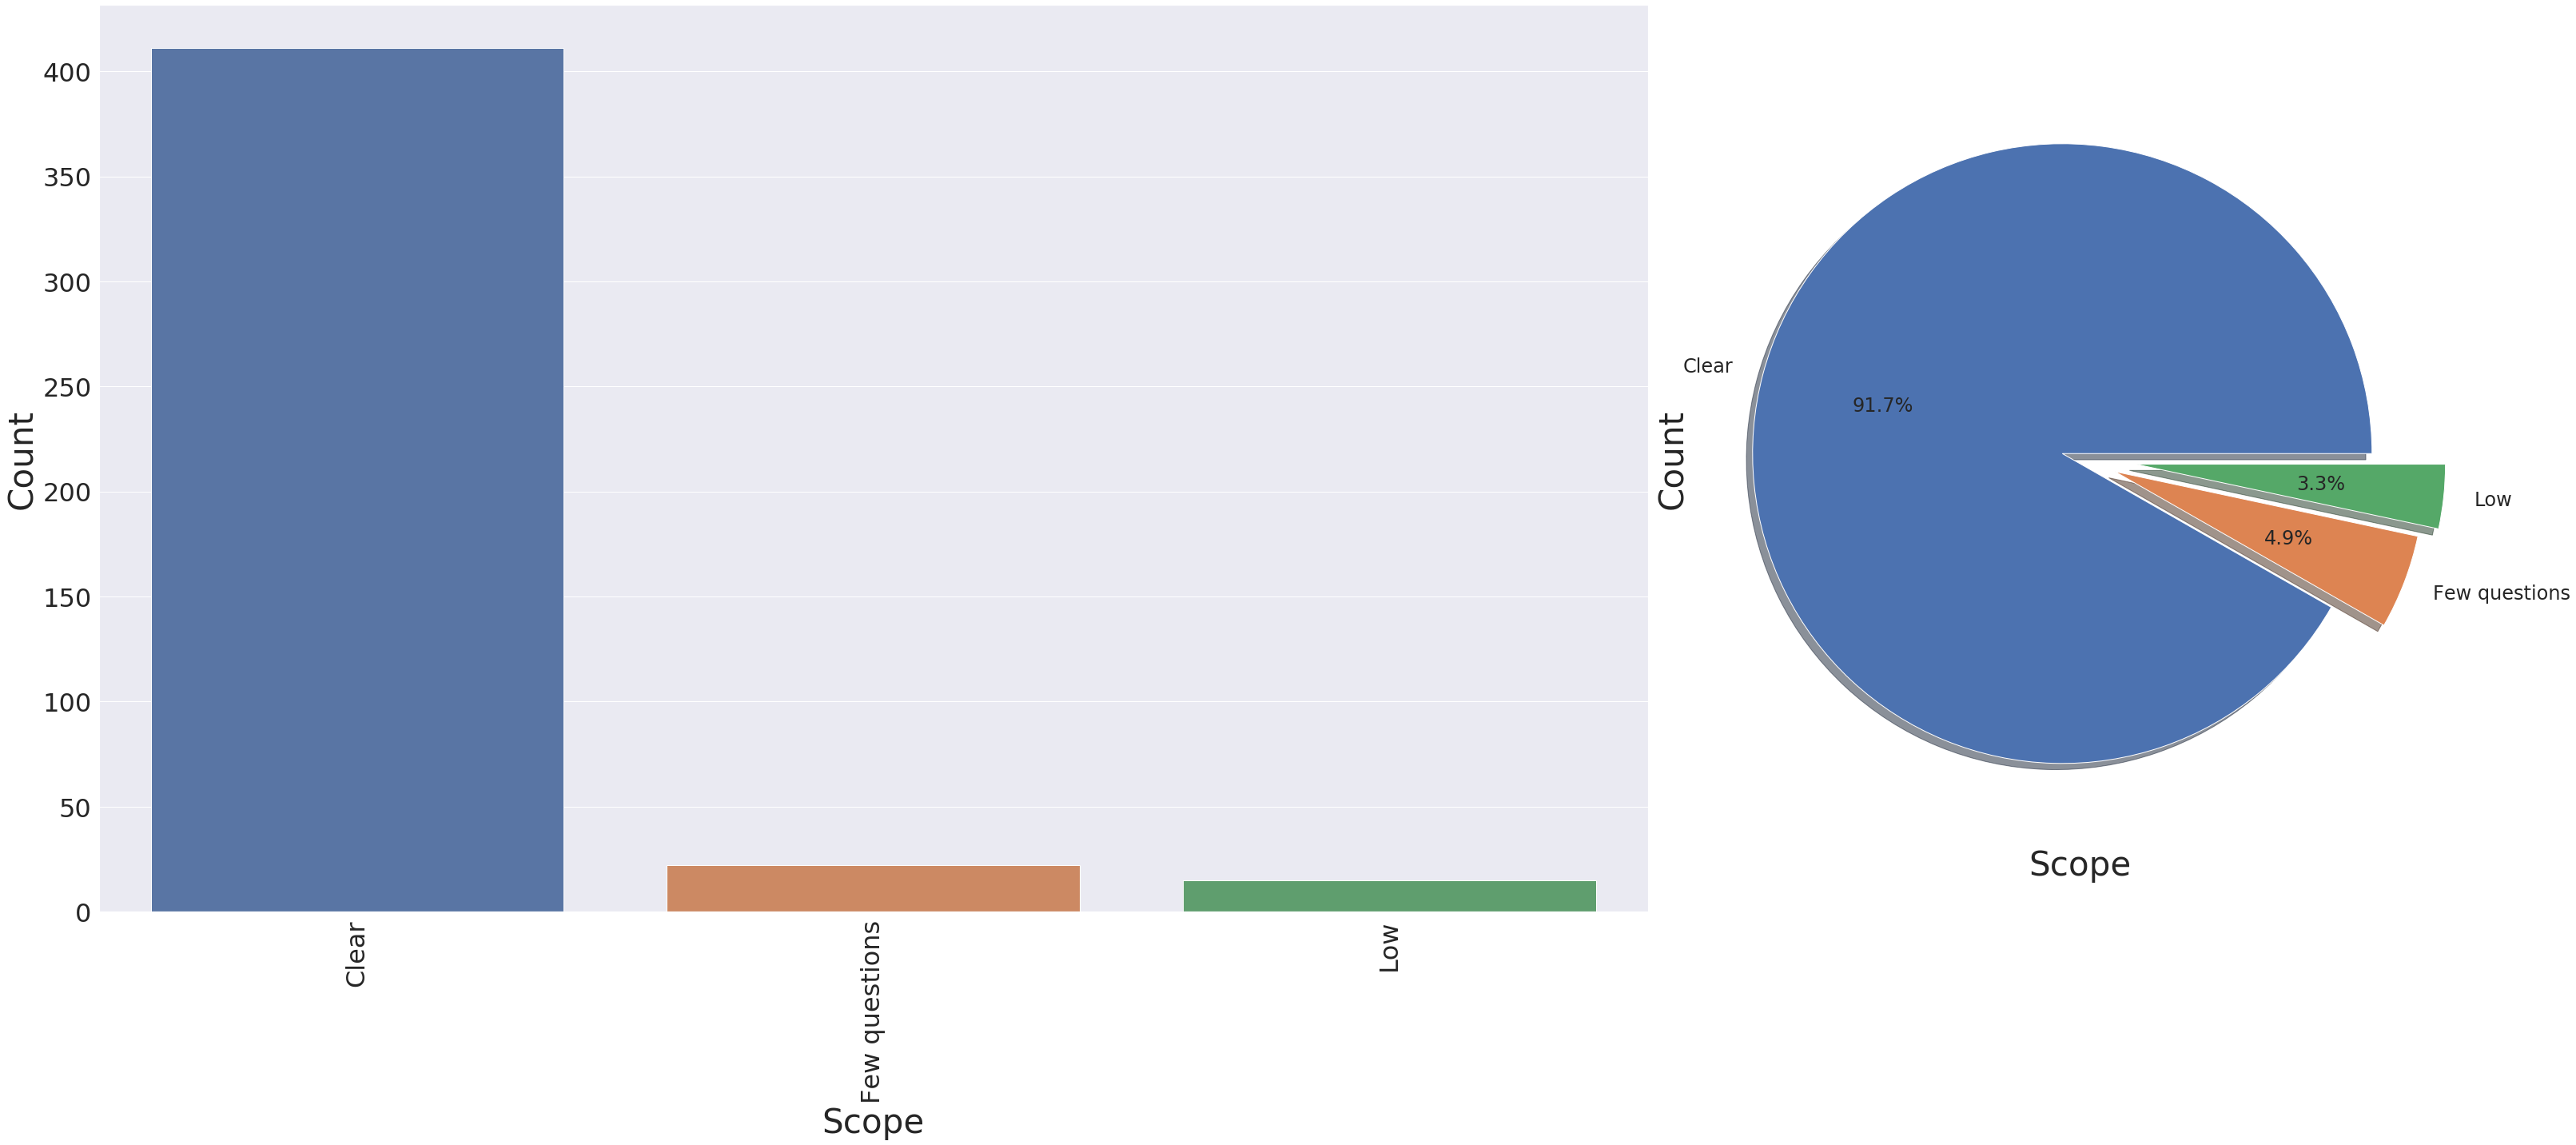

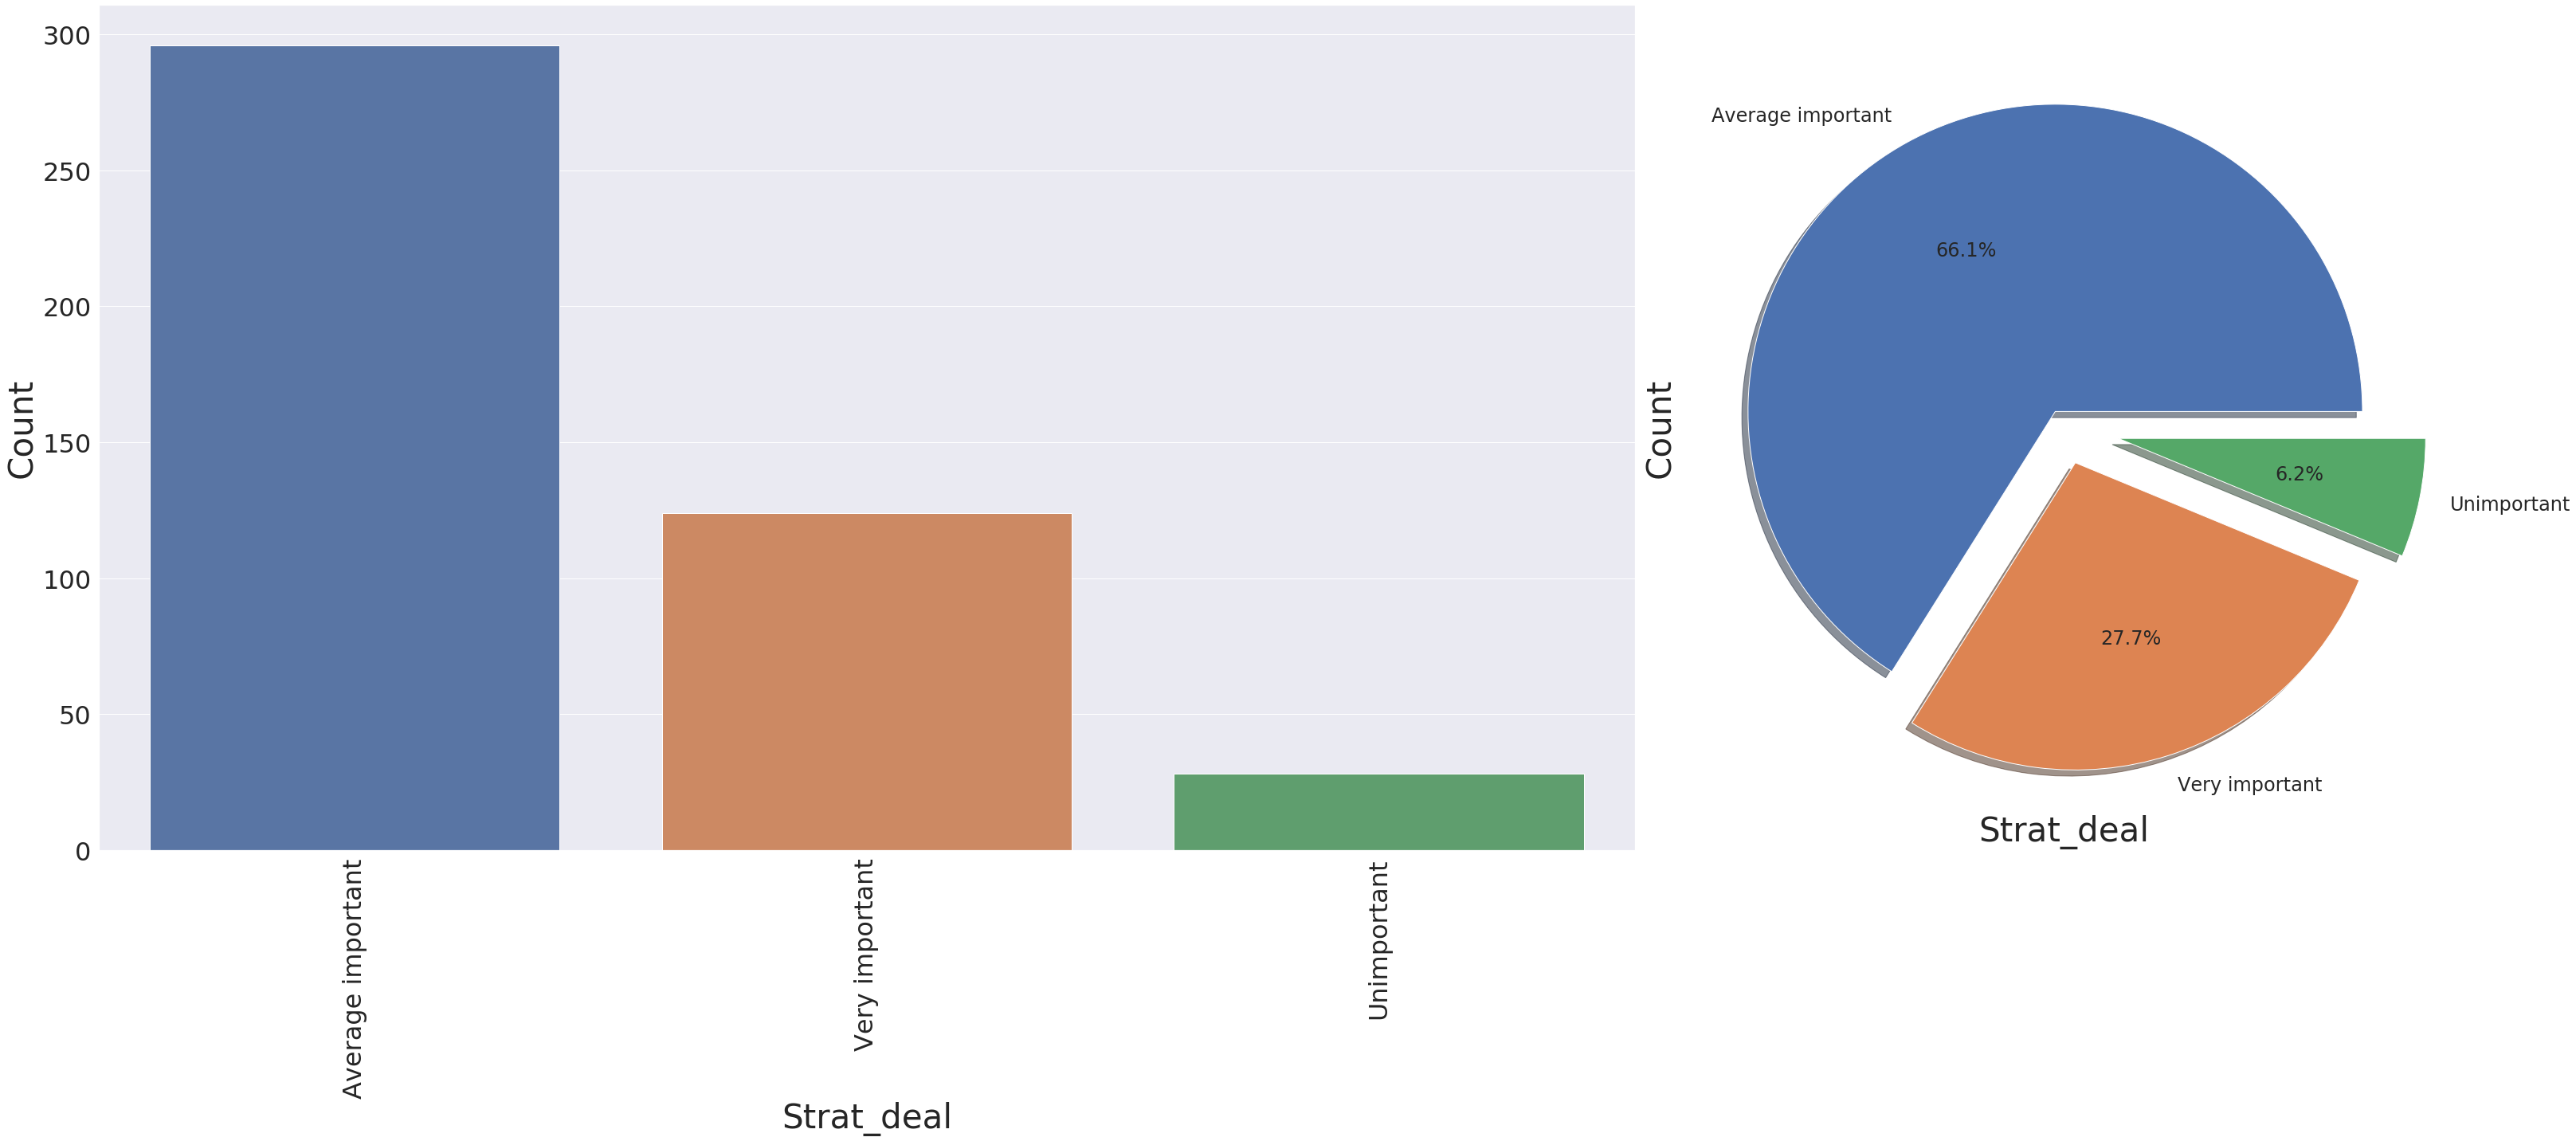

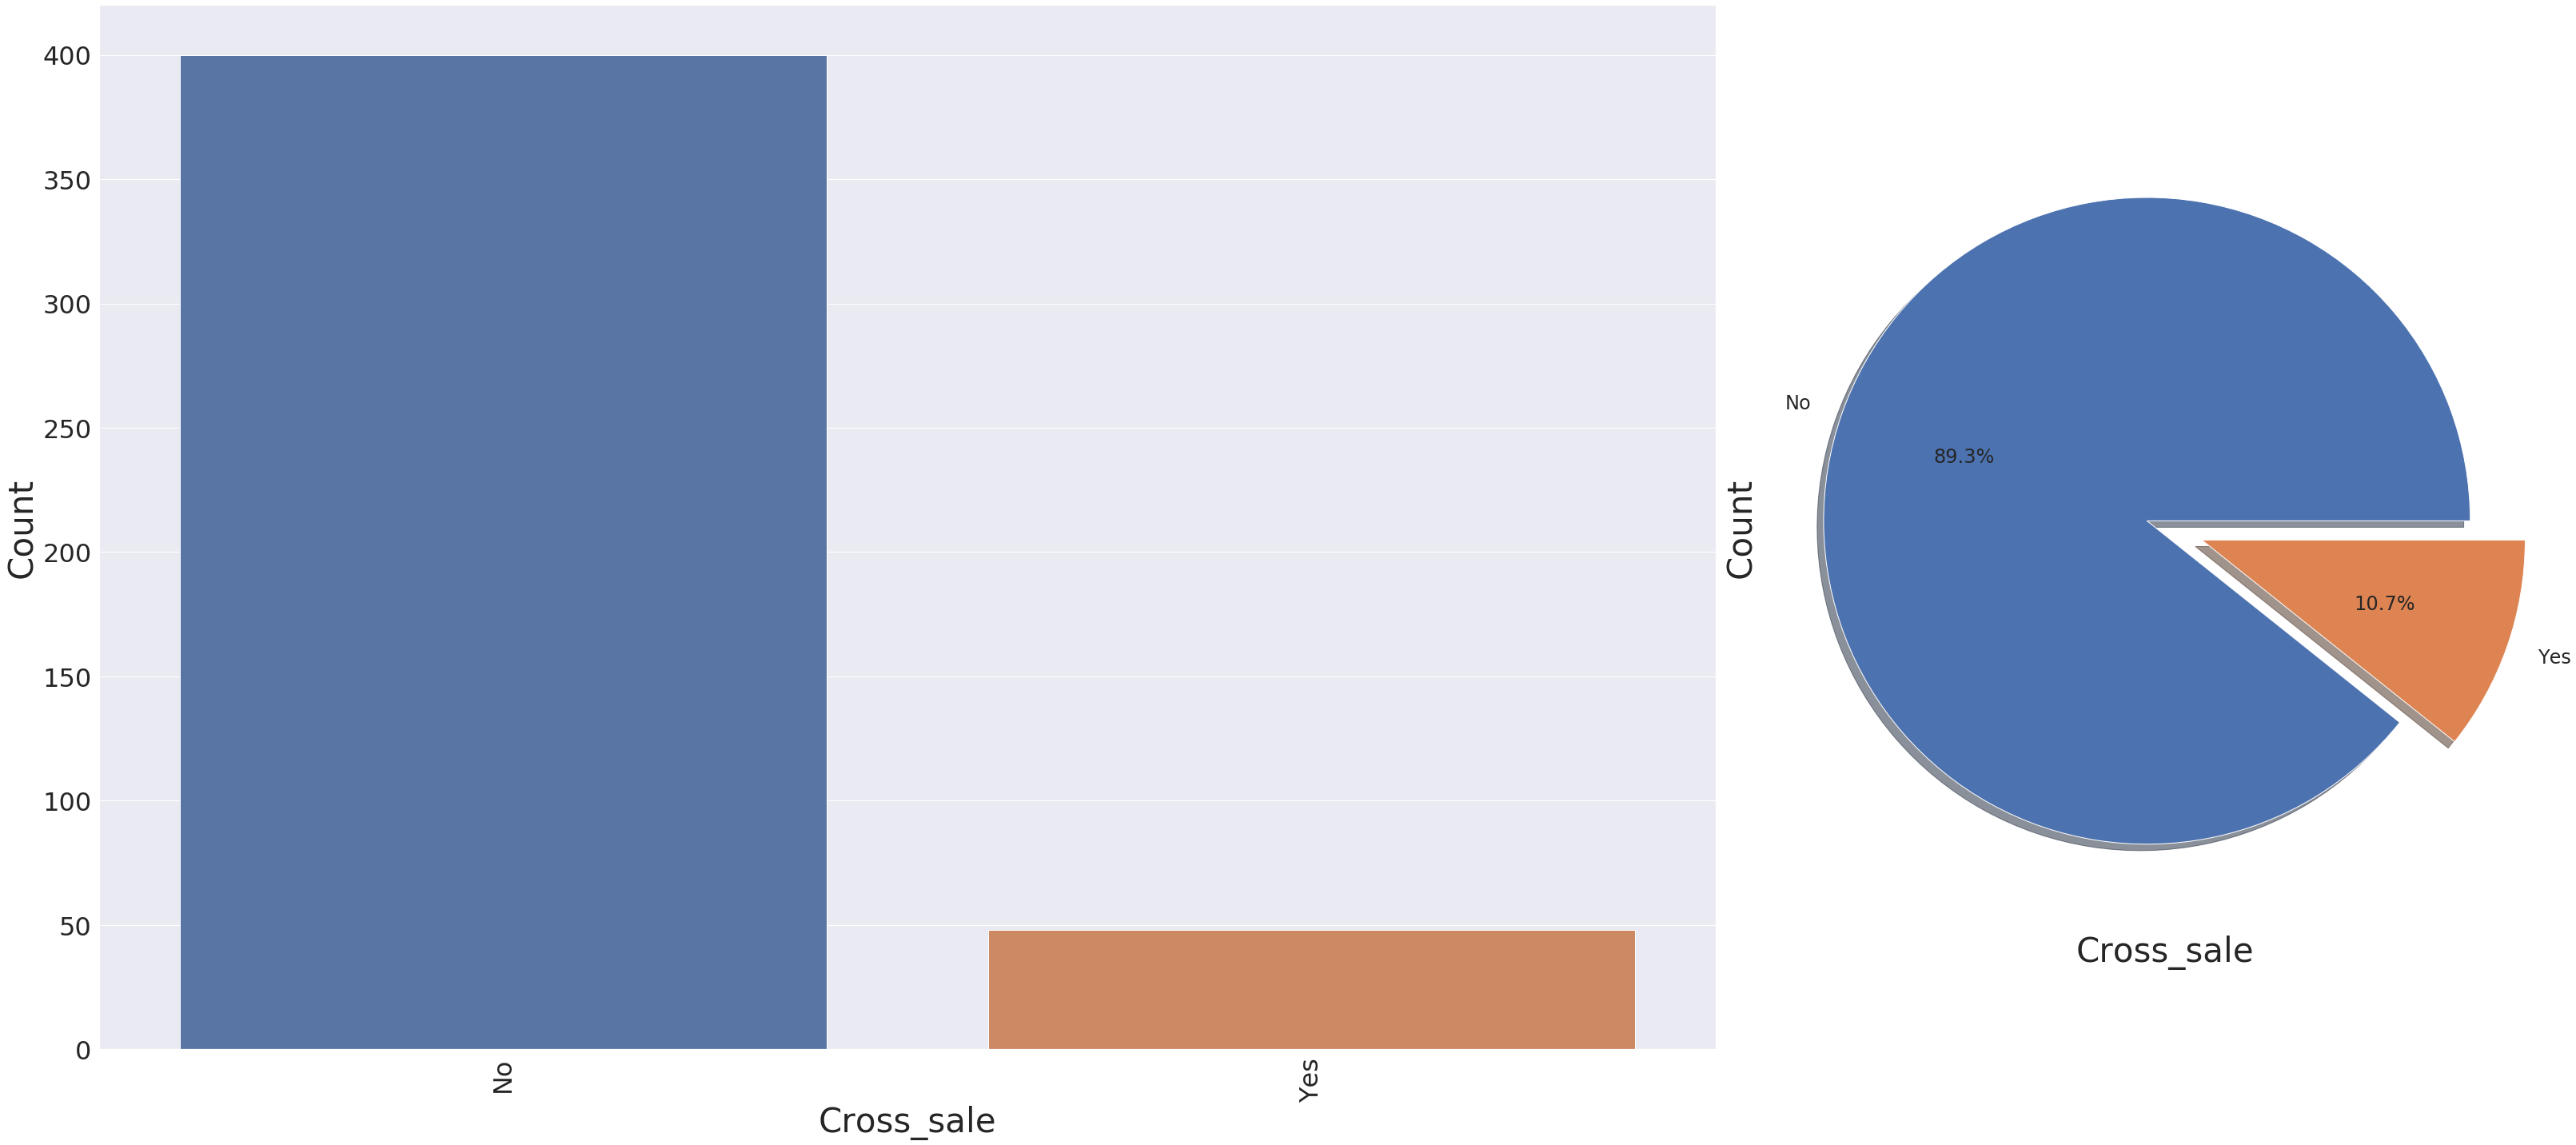

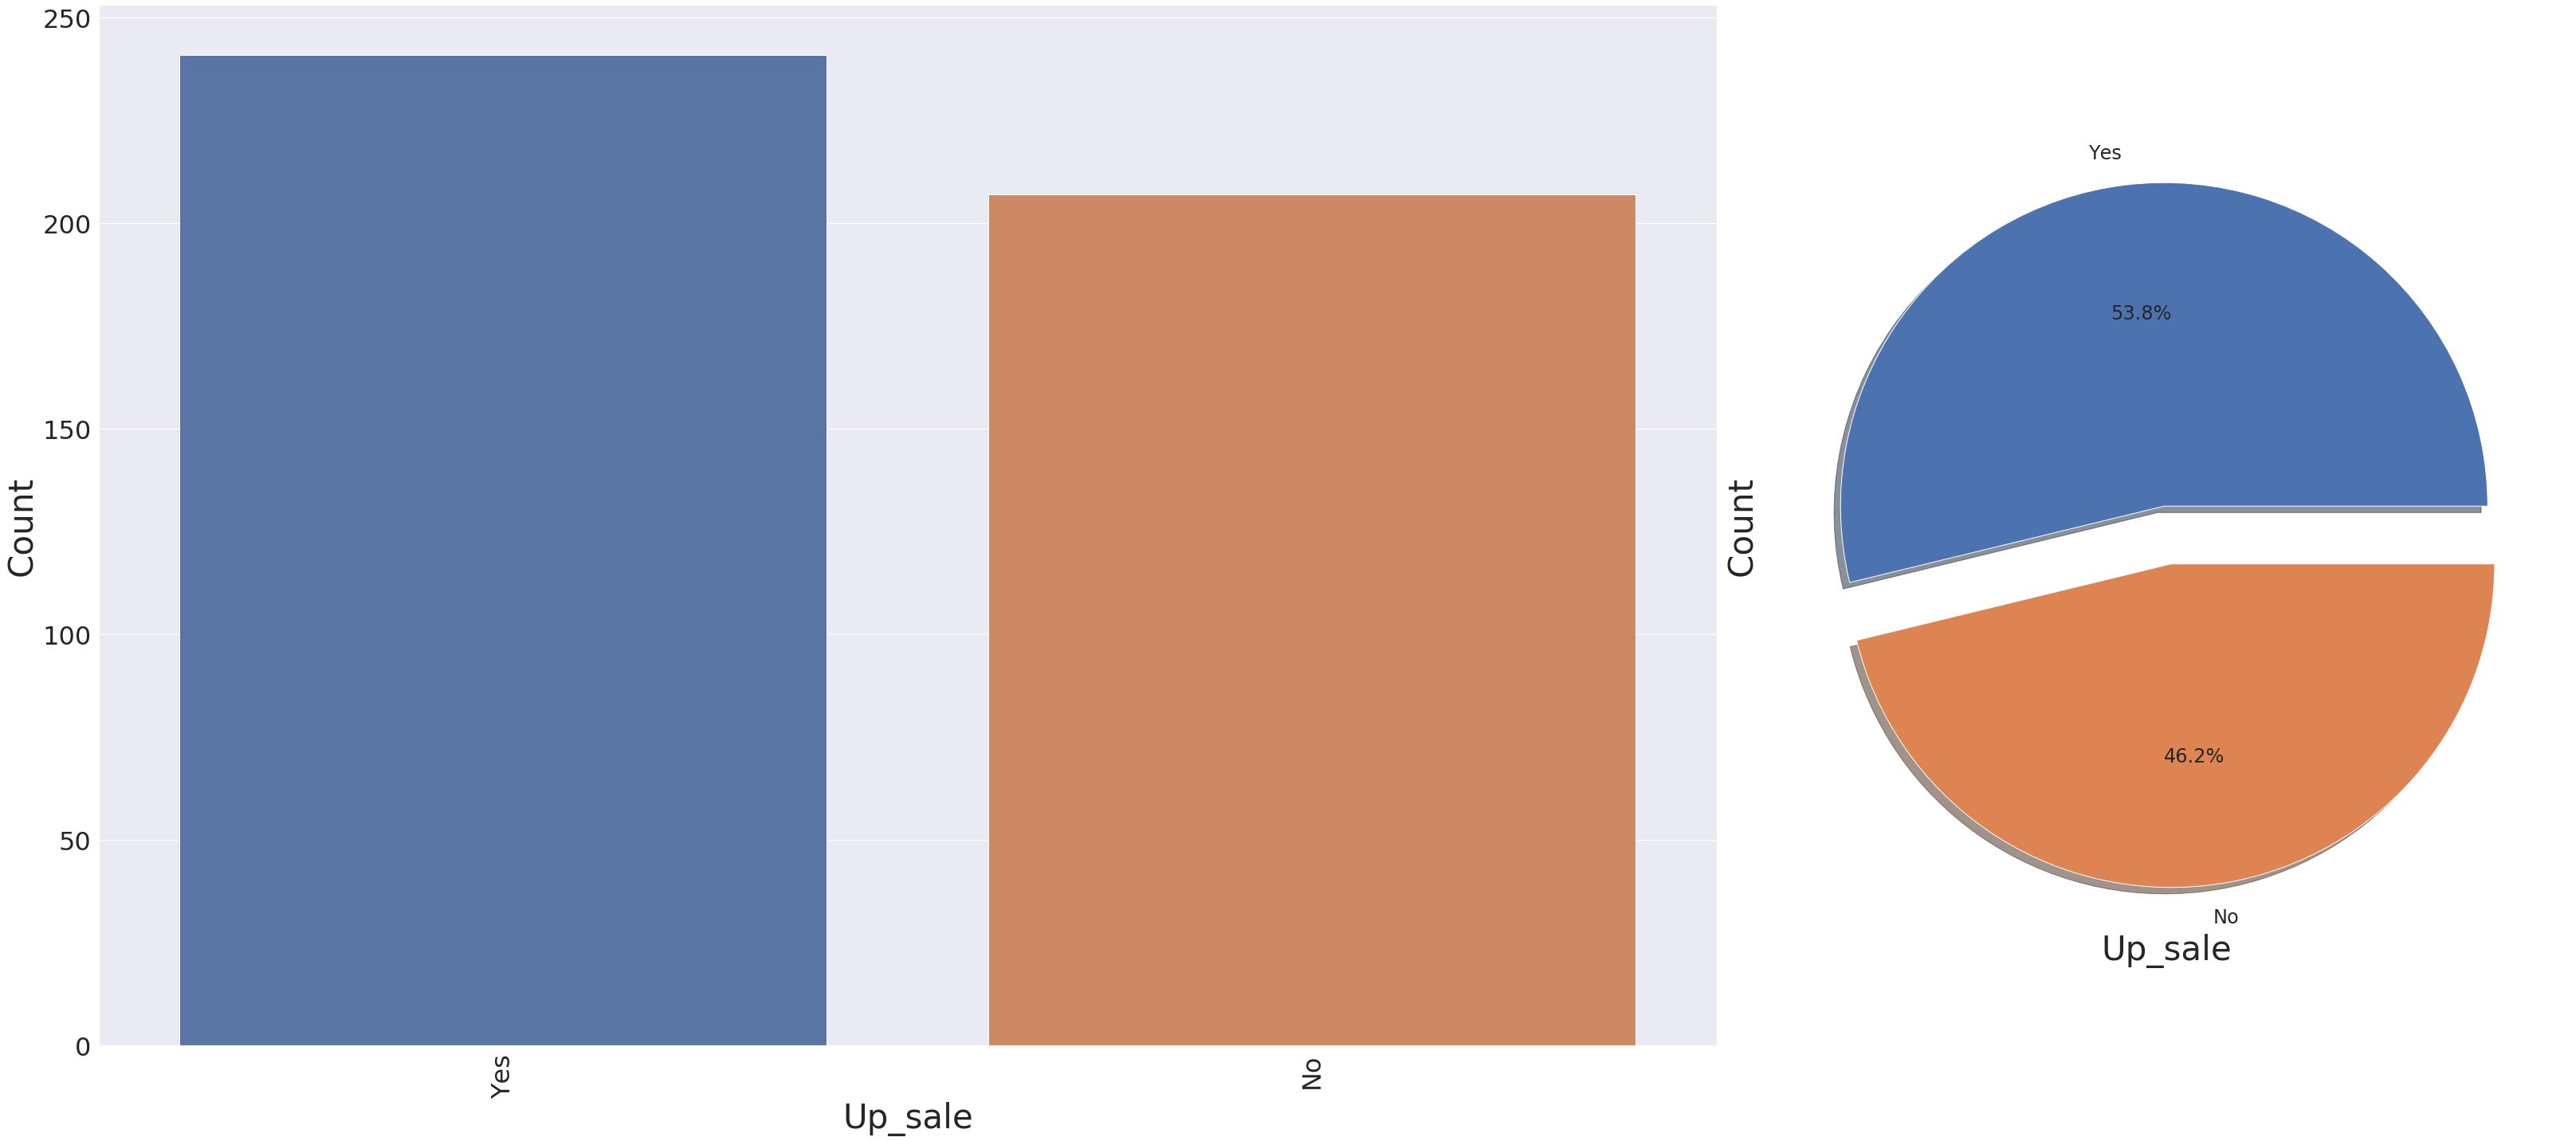

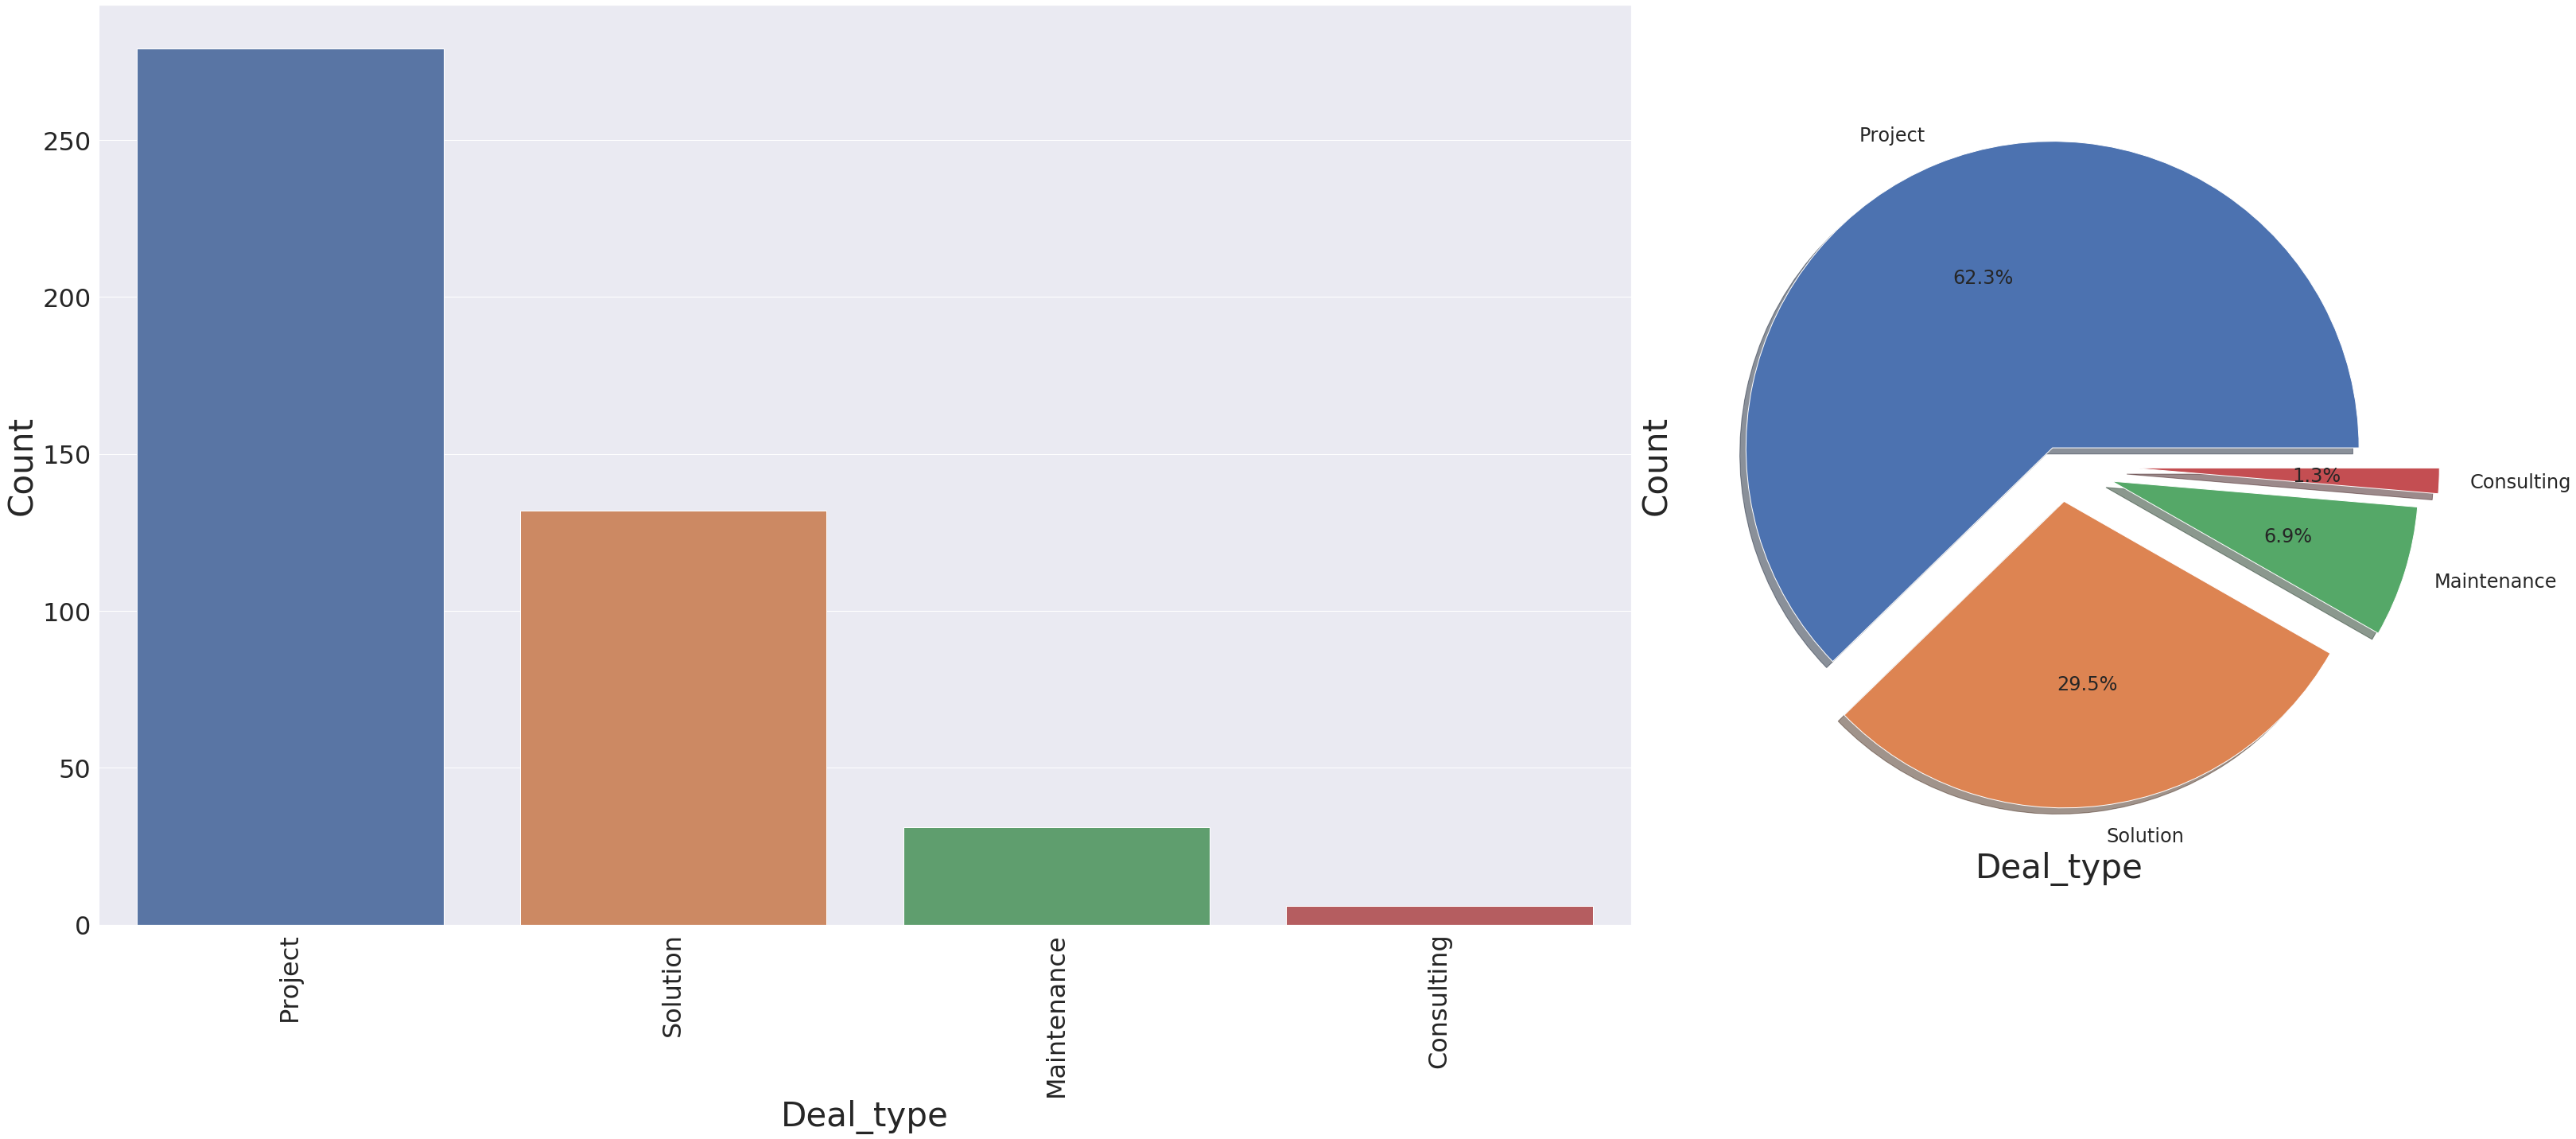

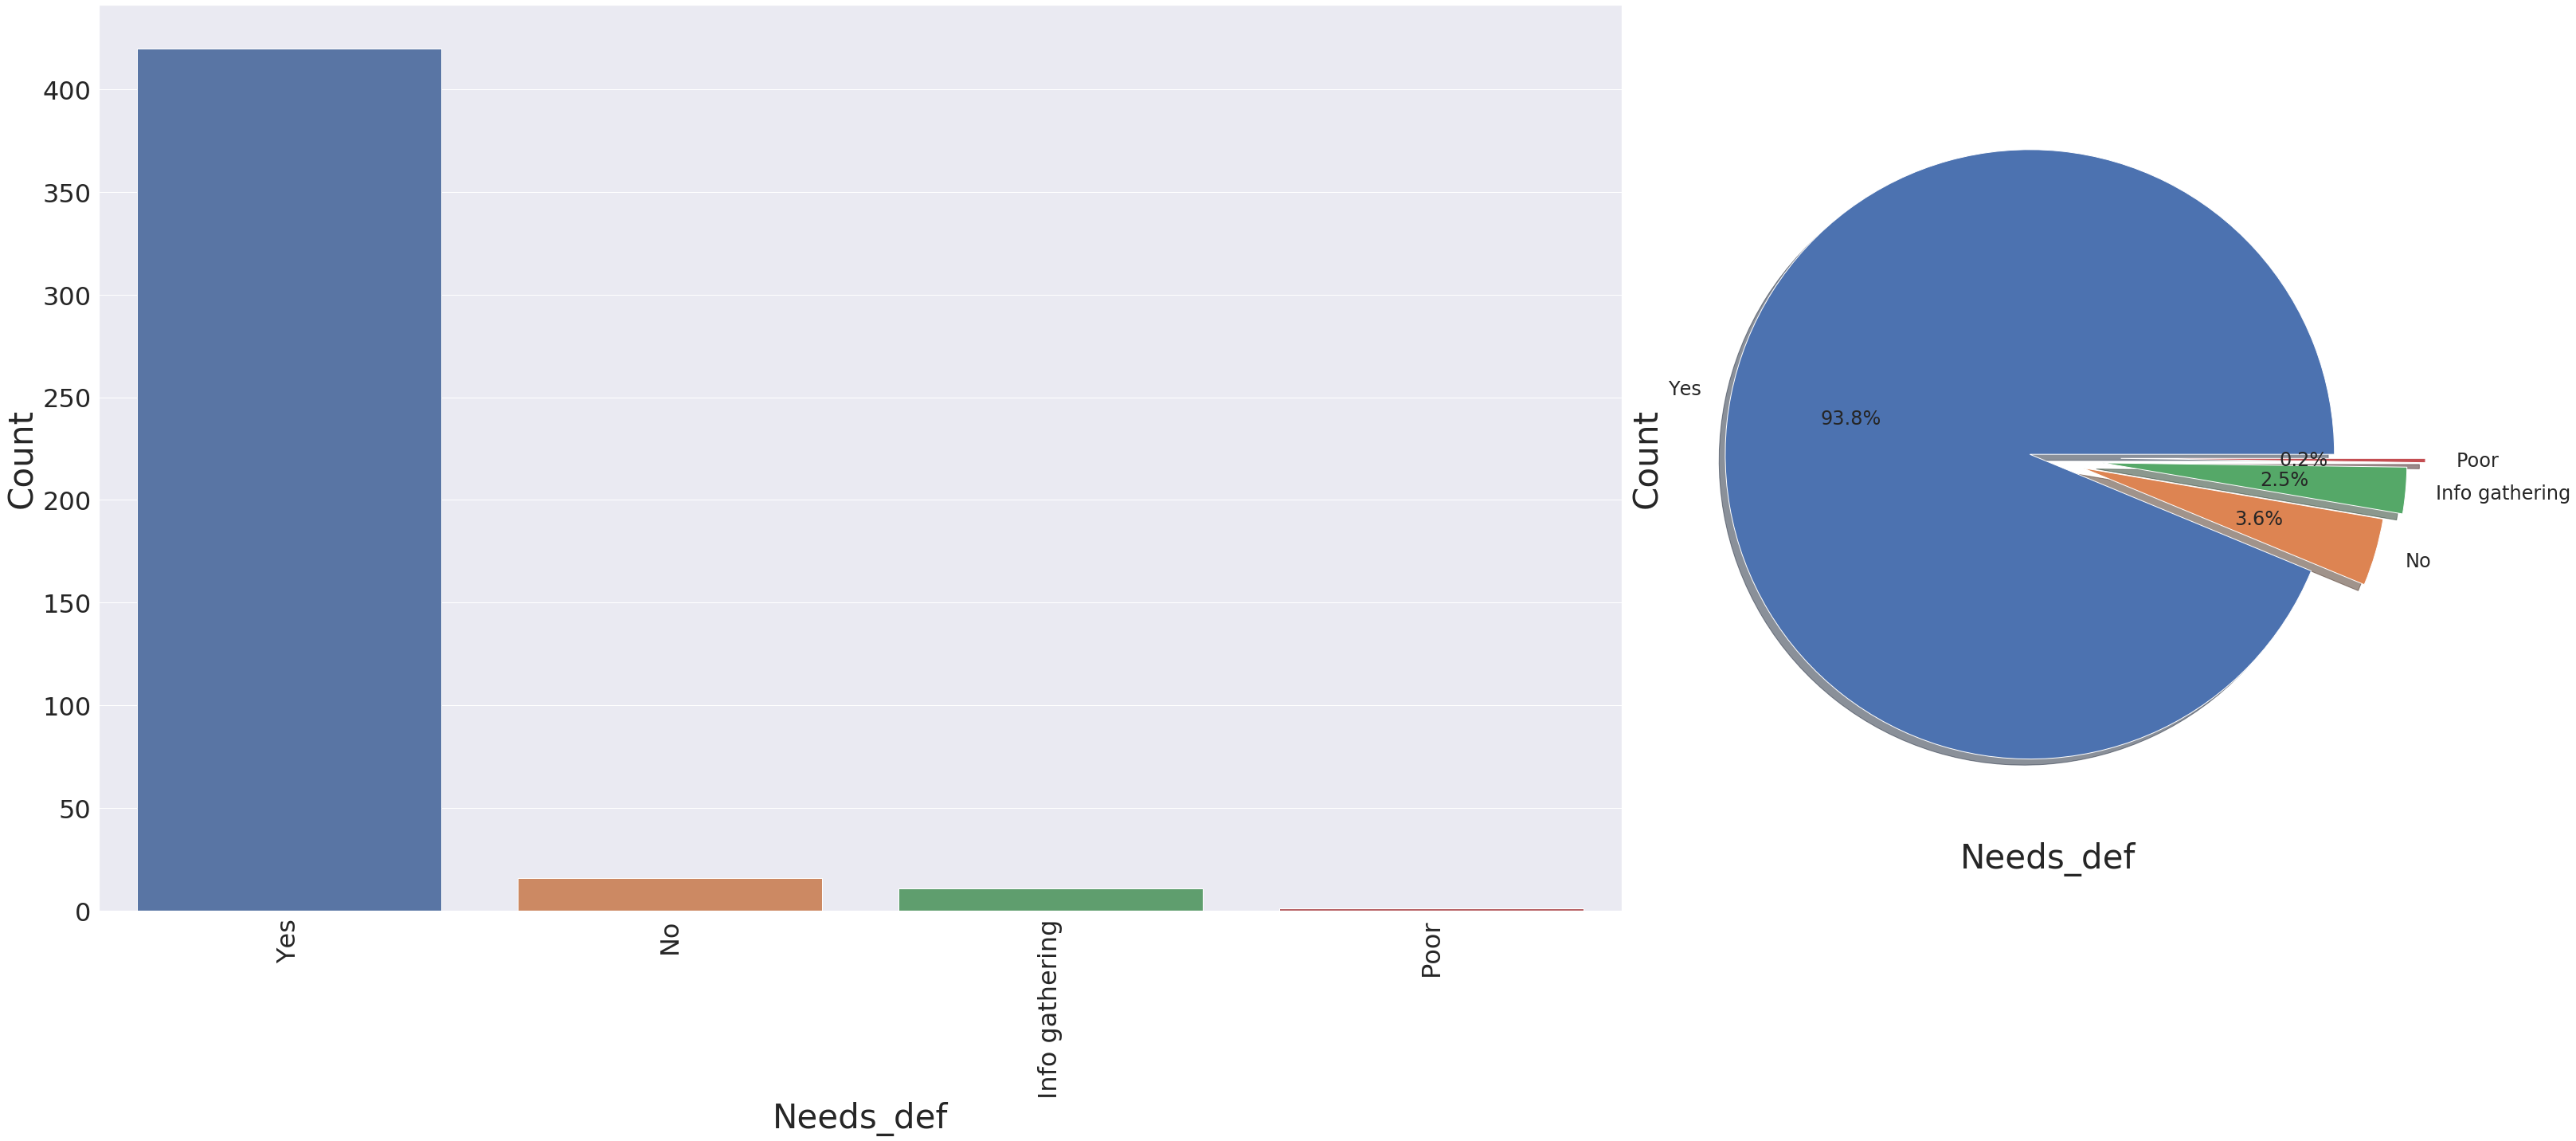

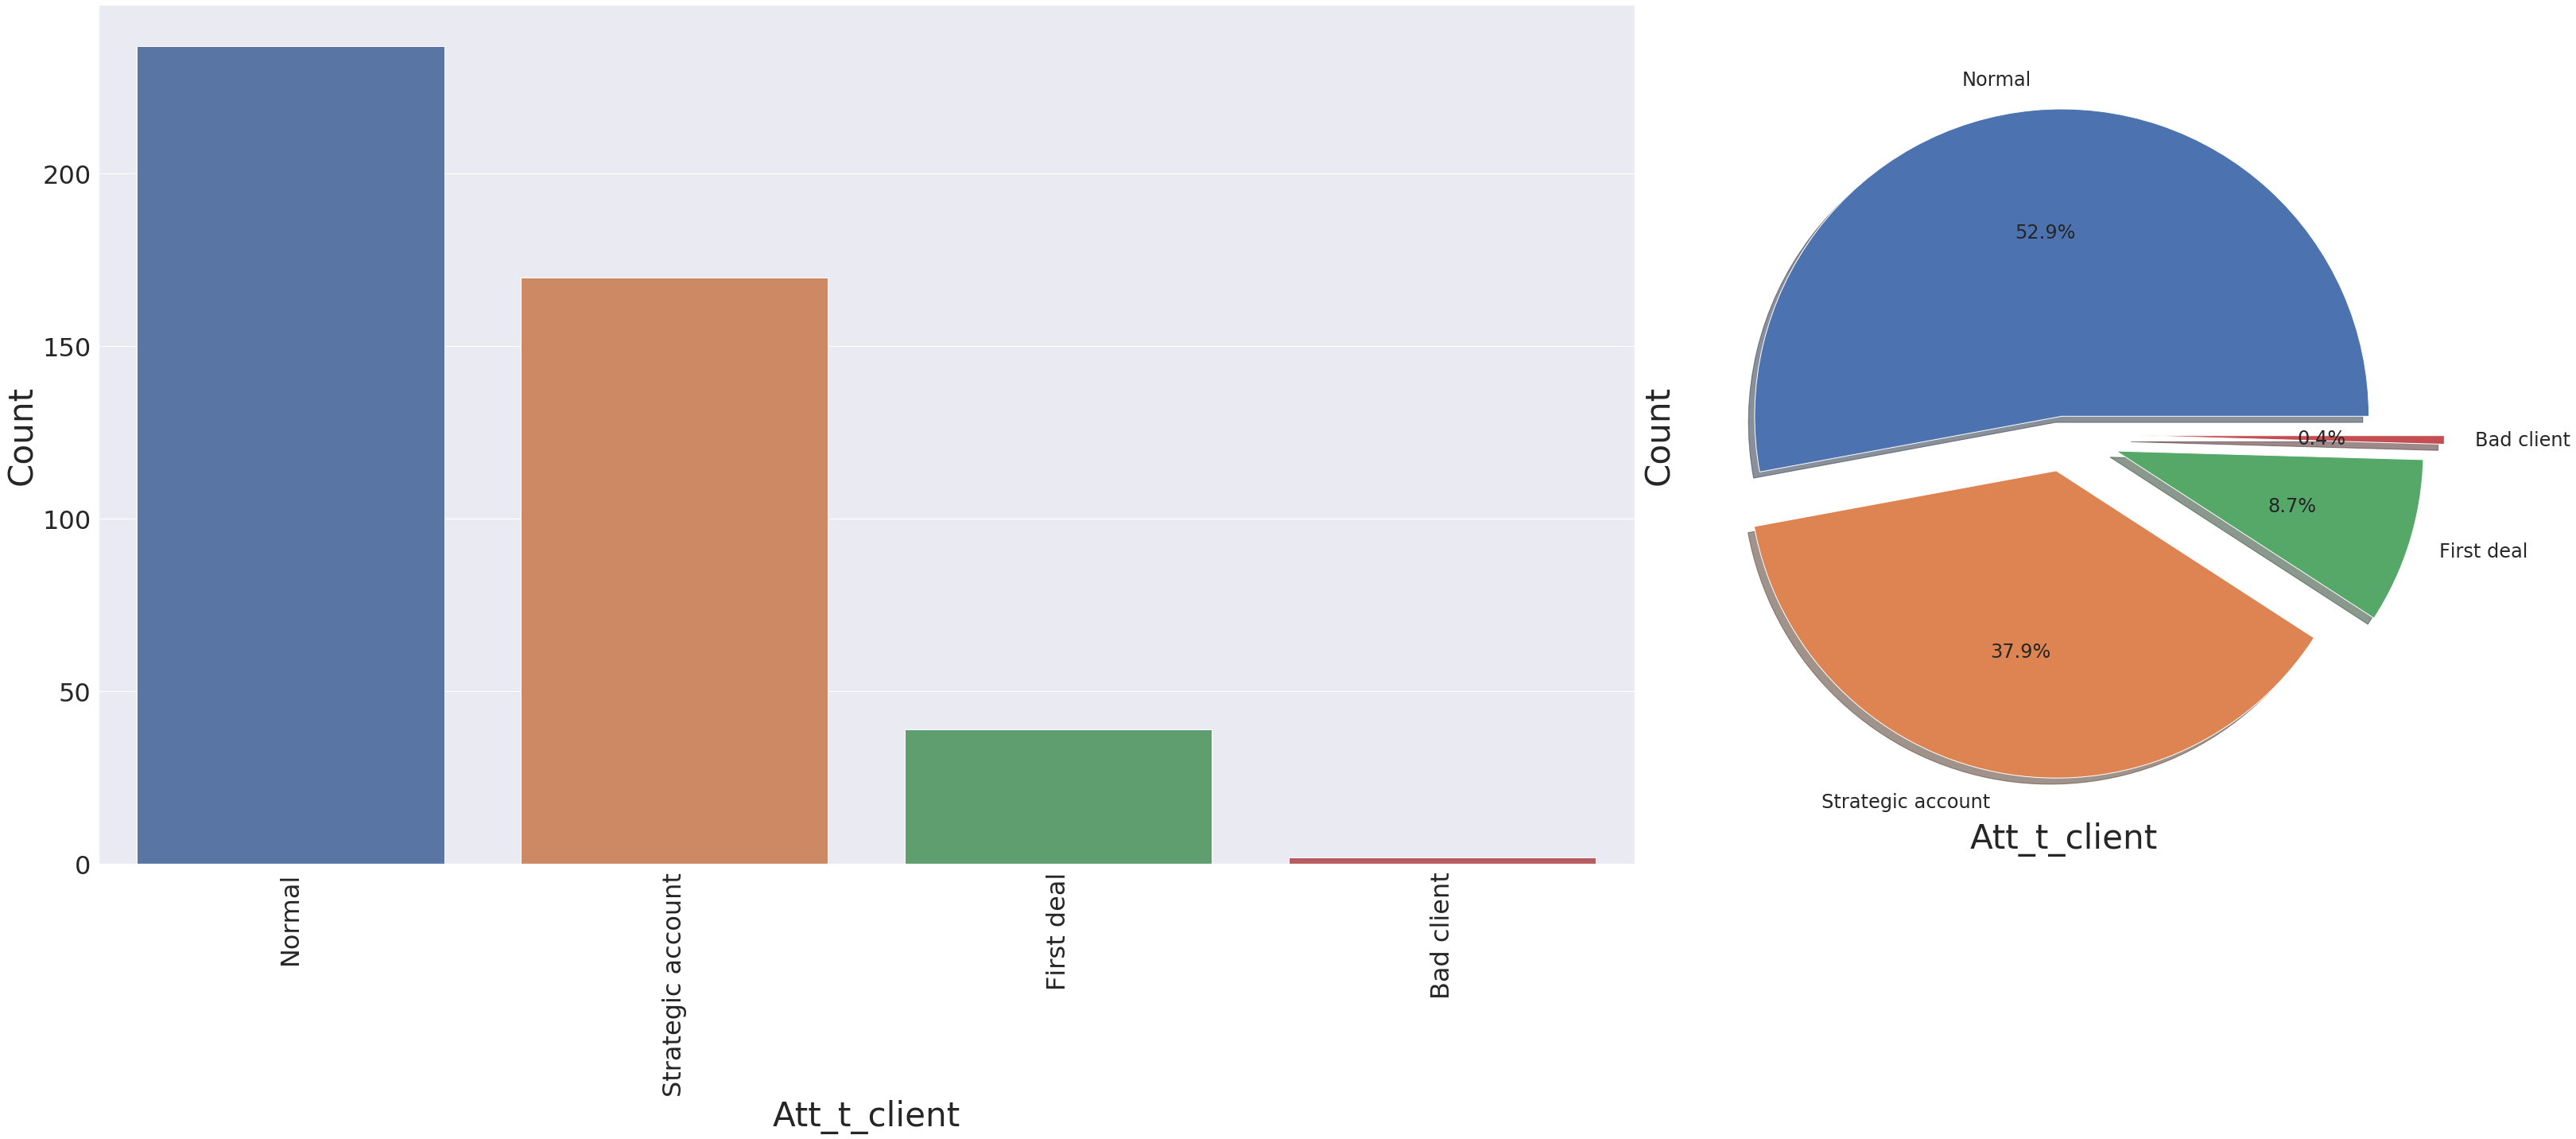

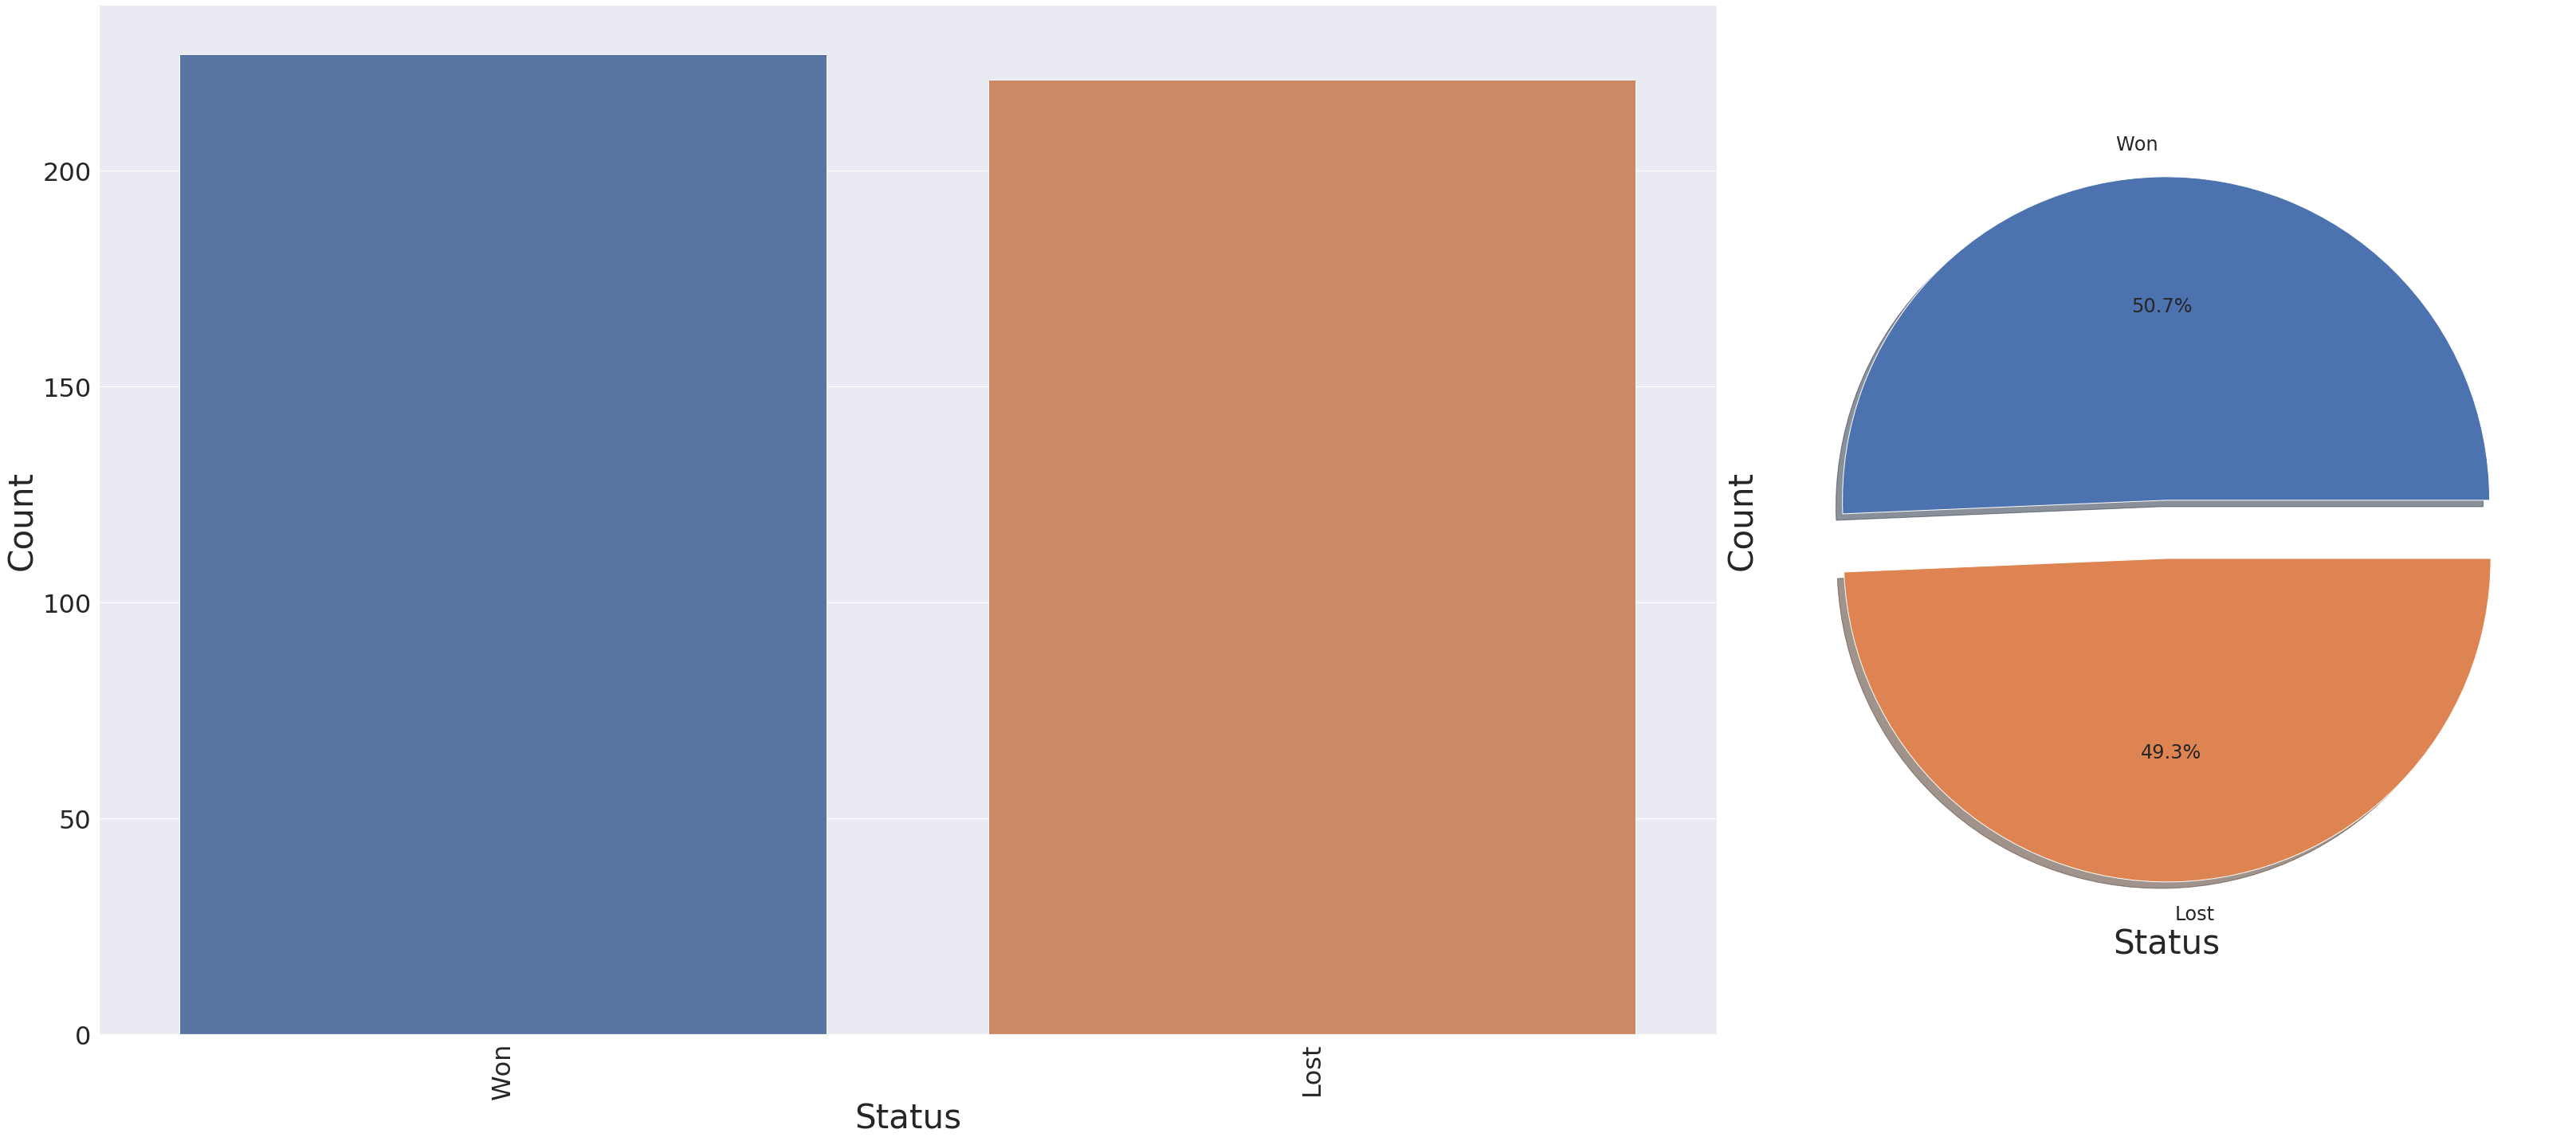

In [186]:
%matplotlib inline
for i in column_list:
   plot_of_count_and_pie(i)
   

## Statışın kazanılıp kazanılmayacağının tahmin edilmedi

* Verinin hazırlanması
* 'Status' sütünü yani satışın kazanılıp kazaılmadığının verisiin olduğu sütün label olarak belirlenir.
* Diğer sütünlar tahminin yapılması için ayrılır ve bütün veriler categori olguğundan sütün categoriye çevrilir.
* get_dummies özelliği kullanarak bütün kategorik verilerin o özelliğe sahip olup olmamsıyla ilgili True-False(1-0) bilgisi elde edilir. Bu makine öğrenmesinin veriyi anlamdırması için yapılması gereken öenmli bir adımdır.


In [21]:
#select the label which is status column 
y = sales_data['Status']
#Set the other column as features 
x= sales_data.drop('Status', axis=1)

In [22]:
#all columns consist of category convert them to category
x = x.astype('category')
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Product       448 non-null    category
 1   Seller        448 non-null    category
 2   Authority     448 non-null    category
 3   Comp_size     448 non-null    category
 4   Competitors   448 non-null    category
 5   Purch_dept    448 non-null    category
 6   Partnership   448 non-null    category
 7   Budgt_alloc   448 non-null    category
 8   Forml_tend    448 non-null    category
 9   RFI           448 non-null    category
 10  RFP           448 non-null    category
 11  Growth        448 non-null    category
 12  Posit_statm   448 non-null    category
 13  Source        448 non-null    category
 14  Client        448 non-null    category
 15  Scope         448 non-null    category
 16  Strat_deal    448 non-null    category
 17  Cross_sale    448 non-null    category
 18  Up_sale   

In [23]:
won_loss = {'Won':1, 'Lost':0}

y = [won_loss[item] for item in y]


In [24]:
#wıth dummy
X = pd.get_dummies(x)
X.head()

Product_Product A  Product_Product B  Product_Product C  Product_Product D  \
0                  1                  0                  0                  0   
1                  0                  1                  0                  0   
2                  0                  0                  0                  0   
3                  0                  1                  0                  0   
4                  0                  0                  1                  0   

   Product_Product E  Product_Product F  Product_Product G  Product_Product H  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  1                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Product_Product I  Product_Product J  ...  Deal_type_Project  \
0                  0                  0  ...                  1   
1                  0                  0  ...                  0   
2                  0                  0  ...                  1   
3                  0                  0  ...                  0   
4                  0                  0  ...                  1   

   Deal_type_Solution  Needs_def_Info gathering  Needs_def_No  Needs_def_Poor  \
0                   0                         0             0               0   
1                   0                         0             0               0   
2                   0                         1             0               0   
3                   0                         0             0               0   
4                   0                         0             1               0   

   Needs_def_Yes  Att_t_client_Bad client  Att_t_client_First deal  \
0              1                        0                        0   
1              1                        0                        0   
2              0                        0                        0   
3              1                        0                        0   
4              0                        0                        0   

   Att_t_client_Normal  Att_t_client_Strategic account  
0                    0                               1  
1                    0                               1  
2                    0                               1  
3                    0                               1  
4                    1                               0  

[5 rows x 95 columns]

### Sınıflandırma için kullanılacak kütüphanelerin yüklenmesi
* Logistik regresyon
* Support Vector MAchine (SVM)
* Decision Tree
* RandomForestClassifier
* KNeighborsClassifier
* Naive Bayes

In [26]:
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import metrics #accuracy measure
from sklearn import svm #support vector Machine
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.metrics import confusion_matrix #for confusion matrix

### Verinin fit edilmeden önce train(Eğitim) ve Test(Deneme) verisi olarak ayrılması. Train verisi modeli eğitmek için kullanılır. Modelin Test verisindeki labellara yani sonuçun ne olduğuna erişimi yoktur. Model kullanılarak labellerin ne olacağı tahmin edilir ve test verisindeki gerçek sonuçlarla karşılaştırılarak tahmin yüzdesi elde edilir.


In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3, random_state=0)


## Logistic Regression Modeli

In [28]:
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)
prediction_log = model_log.predict(X_valid)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_log, y_valid))

The accuracy of the Logistic Regression is 0.7777777777777778


## Suppor Vectort Machine Modeli (linear)

In [29]:
model_svm_l = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model_svm_l.fit(X_train, y_train)
prediction_svm_l = model_svm_l.predict(X_valid)
print('The accuracy of the Linear Support Vector Machine is ', metrics.accuracy_score(prediction_svm_l, y_valid))


The accuracy of the Linear Support Vector Machine is  0.7333333333333333


## Suppor Vectort Machine Modeli (rbf)

In [30]:
model_rbf = svm.SVC(kernel='rbf', C=0.1, gamma=0.1)
model_rbf.fit(X_train, y_train)
prediction_rbf = model_rbf.predict(X_valid)
print('The accuracy of the Radical Support Vector Machine is ', metrics.accuracy_score(prediction_rbf, y_valid))

The accuracy of the Radical Support Vector Machine is  0.7555555555555555


##  Decision Tree Classifier Modeli

In [31]:
model_tree = DecisionTreeClassifier() 
model_tree.fit(X_train, y_train)
prediction_tree = model_tree.predict(X_valid)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction_tree, y_valid))

The accuracy of the Decision Tree is  0.674074074074074


Cross validation yöntemi ile elde edilen skorun doğruluğunun rasgele olmaması ve belli bir veriye bağlı olup olmadığı kontrol edilmektedir.Burda veri 10 eşit parçaya ayrıldı ve her bir parça iterasyonla test verisi olarak kullanıldı. Bura farklı modeller için sonuçlar aşağıda listelendi.

In [32]:
from sklearn.model_selection import KFold
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier


kfold =KFold(n_splits=10, random_state=22)
xyz = []
accuracy = []
std = []

classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes' , 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(solver='liblinear'), KNeighborsClassifier(n_neighbors=9), 
      DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

    
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv=kfold,scoring='accuracy')
    cv_result =cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_data_frame = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_models_data_frame

/home/aysbt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CV Mean       Std
Linear Svm           0.749596  0.055926
Radial Svm           0.767424  0.071855
Logistic Regression  0.754242  0.043657
KNN                  0.738283  0.080315
Decision Tree        0.705455  0.047024
Naive Bayes          0.689394  0.073006
Random Forest        0.756414  0.075178

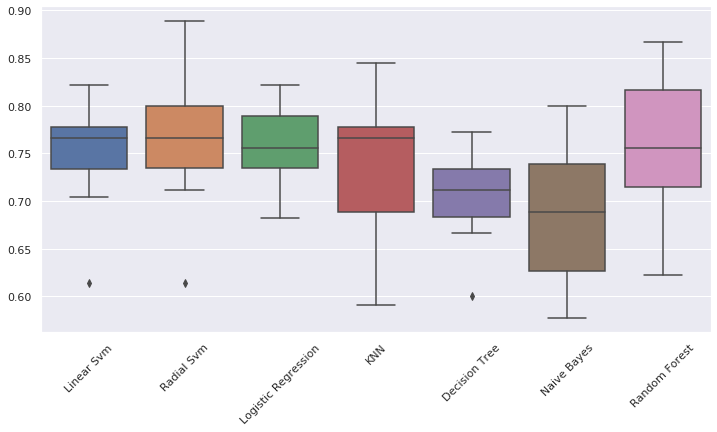

In [50]:
plt.subplots(figsize=(12,6))
plt.xticks(rotation=45)
sns.boxplot(new_models_data_frame.index, accuracy)

## Sınıflandırma algoritmlarında doğruluk tahminleri PT (Pozitif True),PF (Pozitif False), NT (Negatif True), NF(Negatif False) ile yapılır.
* PT : Gerçekte Pozitif(1) olan verinin True(1) olarak tahmini
* PF :Gerçekte Pozitif olan verinin False(0) olarak tahmini
* NT: Gerçekte Negatig(0) olan verinin True(1) olarak tahmini
* NF: Gerçekte Negatif(0) olan verinin False(0) olarak tahmini

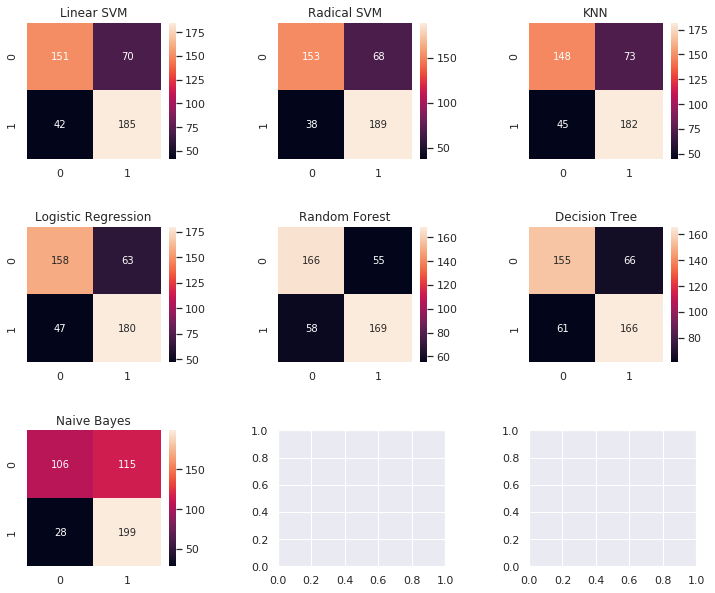

In [200]:
f, ax  =plt.subplots(3,3, figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,0], annot=True,fmt='2.0f')
ax[0,0].set_title('Linear SVM')

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,1], annot=True,fmt='2.0f')
ax[0,1].set_title('Radical SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9) ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,2], annot=True,fmt='2.0f')
ax[0,2].set_title('KNN')

y_pred = cross_val_predict(LogisticRegression(solver='liblinear') ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,0], annot=True,fmt='2.0f')
ax[1,0].set_title('Logistic Regression')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100) ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,1], annot=True,fmt='2.0f')
ax[1,1].set_title('Random Forest')

y_pred = cross_val_predict(DecisionTreeClassifier() ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,2], annot=True,fmt='2.0f')
ax[1,2].set_title('Decision Tree')

y_pred = cross_val_predict(GaussianNB() ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[2,0], annot=True,fmt='2.0f')
ax[2,0].set_title('Naive Bayes')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

## Hyper-Parameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd =GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)


gd.fit(X,y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 260 candidates, totalling 1300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7721098626716605
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1300 out of 1300 | elapsed:   29.8s finished


In [52]:
model_rbf = svm.SVC(kernel='rbf', C=0.1, gamma=0.1)
model_rbf.fit(X_train, y_train)
prediction_rbf = model_rbf.predict(X_valid)
print('The accuracy of the Radical Support Vector Machine is ', metrics.accuracy_score(prediction_rbf, y_valid))

The accuracy of the Radical Support Vector Machine is  0.7555555555555555


### BaggingClassifier

In [53]:
n_estimator =range(50, 1000, 50)
hyper = {'n_estimators': n_estimator}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7274906367041198
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:  1.5min finished


In [54]:
from sklearn.ensemble import BaggingClassifier
model_bag = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=800)
model_bag.fit(X_train, y_train)
prediction_bag = model_bag.predict(X_valid)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction_bag,y_valid))
result=cross_val_score(model_bag,X,y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.7037037037037037
The cross validated score for bagged KNN is: 0.7273232323232323


###  Farklı modelleri ensemble ile mix ederek daha yüksek doğruluk ile tahmin yapmak 

In [203]:

from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=9)),
                                        ('RBF', svm.SVC(kernel='rbf',probability=True,C=0.4,gamma=0.1)),
                                        ('RFor', RandomForestClassifier(n_estimators=900, random_state=0)),
                                        ('LR', LogisticRegression(C=0.05)),
                                        ('DT', DecisionTreeClassifier(random_state=0)),
                                        ('NB', GaussianNB()),
                                        ('Svm', svm.SVC(kernel='linear',probability=True))],
                           voting='soft').fit(X_train, y_train)

print('The accuracy for ensembled model is:',ensemble.score(X_valid,y_valid))
cross=cross_val_score(ensemble,X,y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())


The accuracy for ensembled model is: 0.7851851851851852
The cross validated score is 0.7787878787878789


### Feature Selection

Modellere göre sütün seçimleri ile ilgili çalışmalar. 

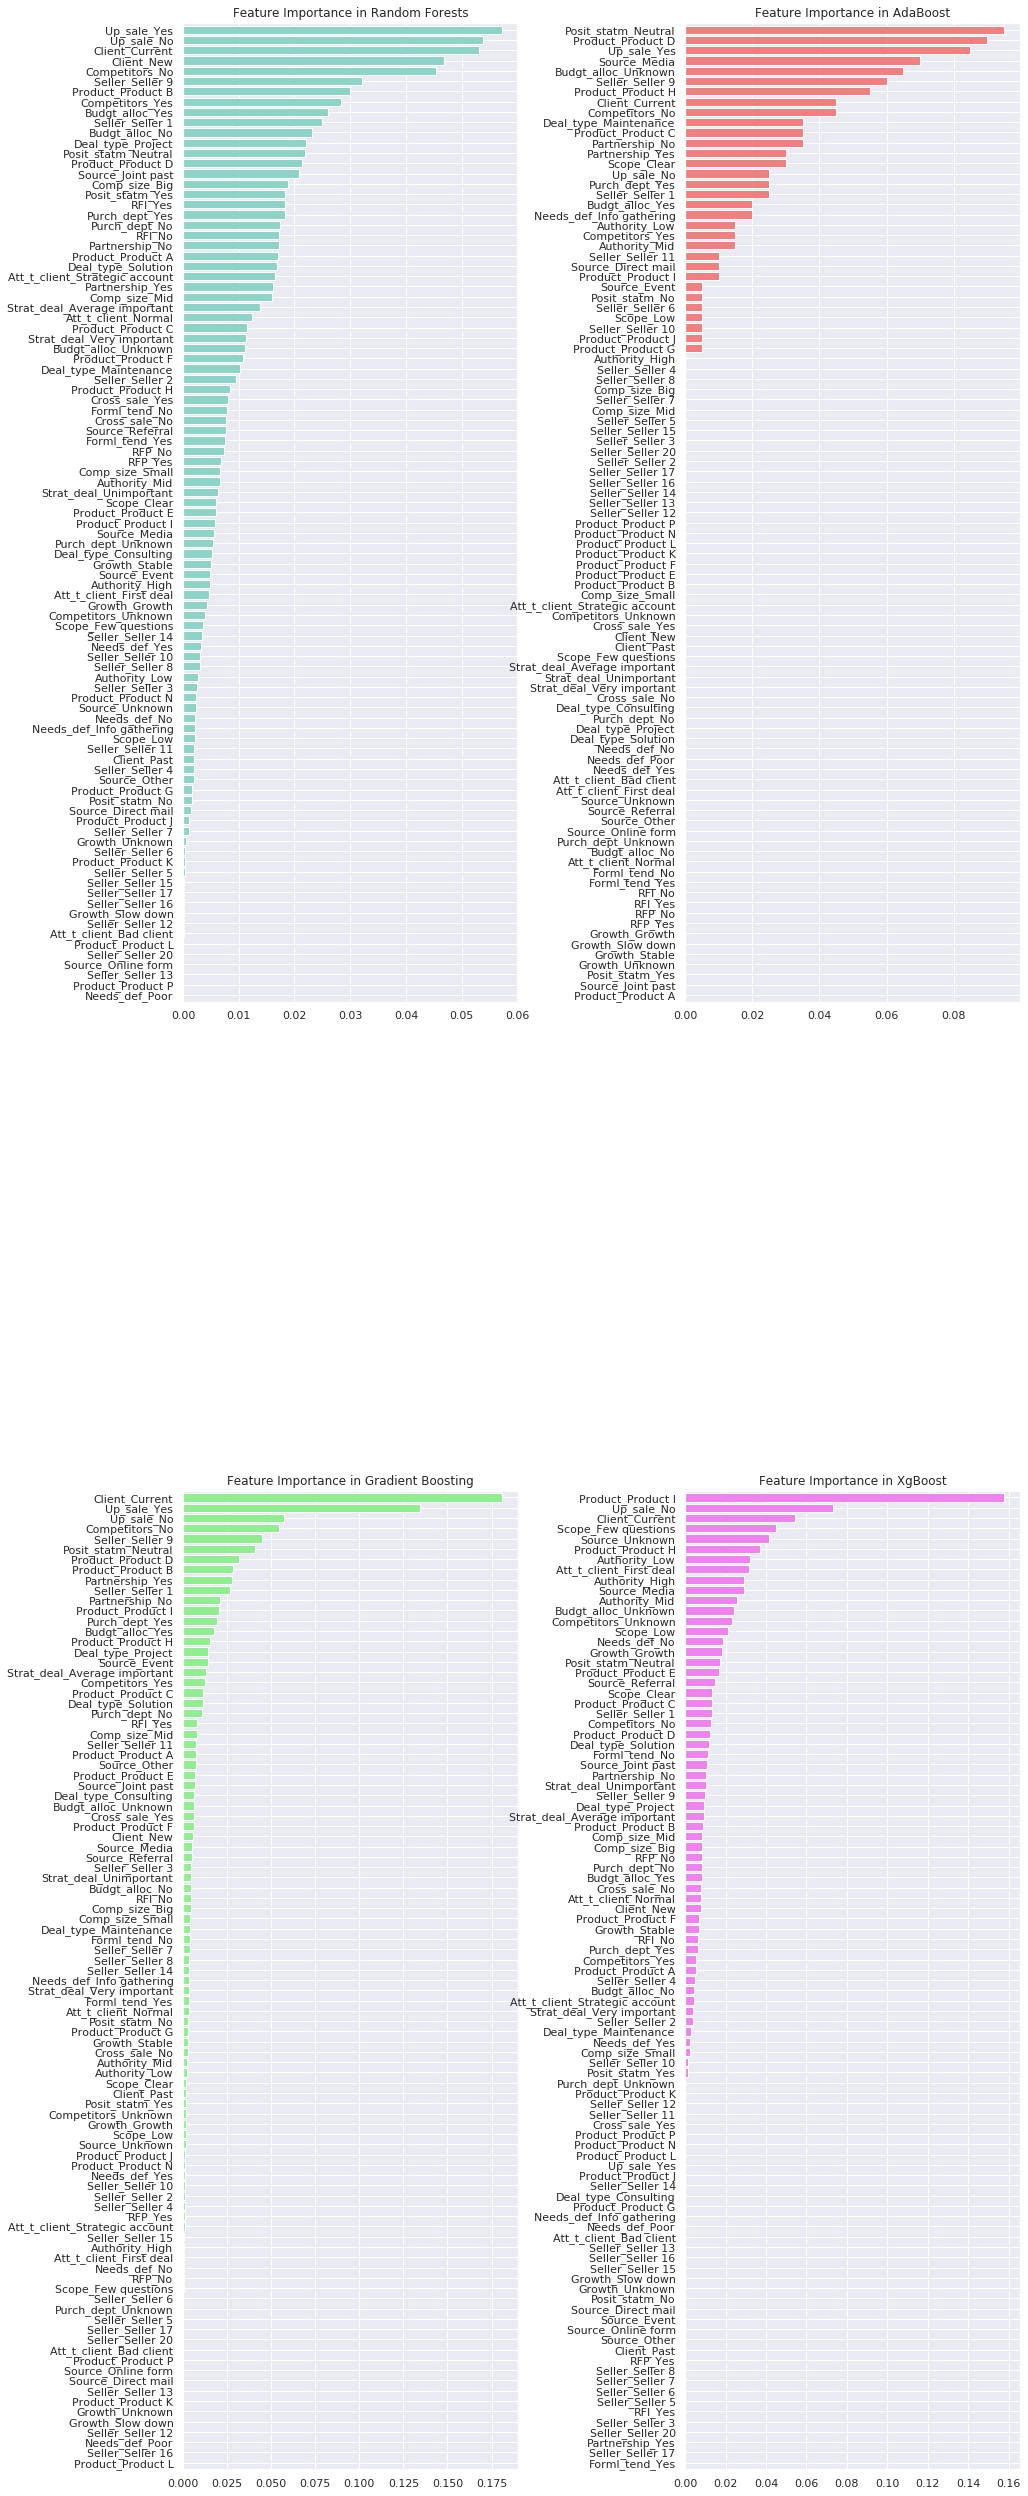

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg
f, ax = plt.subplots(2,2, figsize=(15,45))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0], cmap='Set3')
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='lightcoral')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],color='lightgreen')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='violet')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()